In [1]:
import pandas as pd
from StringIO import StringIO
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('legend', fontsize=15) 
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
%matplotlib inline

In [4]:
trip_database_2011 = StringIO("""
TripId	HVLINE	Trip TimeStamp	Trip RunNumber	Trip LB	Stable Zero	Ramp Up	Recovery TimeStamp	Recovery RunNumber	Recovery LB	Stable Beams	Fill Number	Num CollBunches	Solenoid	Toroid	Module	Channel	Det	Side	Phi Wedge	SubPhi Wedge	Eta Sector	Electrode Side	Map	Powered Electrodes	HVLINE Status
563	49001	2011-11-27 00:44:33	193825	196	-1	197	2011-11-27 00:50:47	193825	203	Y	2328	356	ON	ON	49	1	HEC	A	3	0	3	EST2	25>32-ID=CR16	8	current
562	158006	2011-11-11 08:38:31	193026	611	615	627	2011-11-11 09:13:36	193026	646	N	2287	0	ON	OFF	158	6	HEC	C	25	0	4	EST1	33>40-ID=CR21	8	current
561	317015	2011-11-10 13:31:49	192939	1	1	0	2011-11-10 17:41:01	0	0	N	2287	0	ON	OFF	317	15	EMECPS	C	31	0	1	H	---------------	0	current
560	74007	2011-10-30 07:23:52	191920	243	-1	243	2011-10-30 07:27:08	191920	246	N	2266	1331	ON	ON	74	7	HEC	A	25	0	2	PAD1	9>24-ID=CF20	16	current
559	69004	2011-10-29 03:05:22	0	0	-1	0	2011-10-29 03:16:28	0	0	N	2263	0	OFF	OFF	69	4	HEC	A	7	0	2	PAD2	9>24-ID=AF23	16	current
557	236013	2011-10-27 06:31:11	191676	834	-1	834	2011-10-27 06:47:08	191676	849	N	2259	0	ON	ON	236	13	EMB	C	3	-1	6	L	0>31	32	current
558	238013	2011-10-27 06:31:11	191676	834	-1	834	2011-10-27 06:32:46	191676	835	N	2259	0	ON	ON	238	13	EMB	C	3	-1	6	H	0>31	32	current
556	145014	2011-10-26 09:03:13	191635	723	-1	723	2011-10-26 09:18:32	191635	739	Y	2254	1331	ON	ON	145	14	EMEC	C	7	7	8	H	24>27	4	new
555	145014	2011-10-22 07:06:51	191425	239	244	-1	9999-12-31 23:00:00	0	0	Y	2239	1331	ON	ON	145	14	EMEC	C	7	7	8	H	24>27	4	new
554	69004	2011-10-22 06:43:53	191425	214	-1	214	2011-10-22 06:44:44	191425	215	N	2239	1331	ON	ON	69	4	HEC	A	7	0	2	PAD2	9>24-ID=AF23	16	current
551	173001	2011-10-16 23:50:12	191190	745	-1	746	2011-10-16 23:54:06	191190	749	Y	2219	1331	ON	ON	173	1	HEC	C	19	0	1	EST2	1>8-ID=CF14	8	current
553	214000	2011-10-16 18:50:39	191190	440	-1	441	2011-10-16 18:53:14	191190	444	Y	2219	1331	ON	ON	214	0	EMB	A	6	0	1	H	32>63	32	current
552	79005	2011-10-16 17:54:14	191190	379	419	-1	9999-12-31 23:00:00	0	0	Y	2219	1331	ON	ON	79	5	HEC	A	31	0	2	EST2	9>24-ID=CF19	16	current
550	134000	2011-10-16 16:19:42	191190	283	-1	284	2011-10-16 16:22:45	191190	287	Y	2219	1331	ON	ON	134	0	EMEC	C	0	1	7	L	0>3	4	new
548	338007	2011-10-15 03:50:02	191138	32	-1	-1	2011-10-15 03:50:13	191138	32	Y	2215	1318	ON	ON	338	7	EMEC	A	5	4	6	H	72>95	24	new
549	342007	2011-10-15 03:49:59	191138	32	-1	-1	2011-10-15 03:50:10	191138	32	Y	2215	1318	ON	ON	342	7	EMEC	A	5	4	6	L	72>95	24	new
547	315013	2011-10-14 04:32:27	190975	539	539	-1	9999-12-31 23:00:00	0	0	Y	2210	1318	ON	ON	315	13	EMECPS	A	29	0	1	L	---------------	0	current
546	142011	2011-10-10 07:20:53	190689	199	-1	200	2011-10-10 07:30:14	190689	209	Y	2200	1318	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
545	294002	2011-10-09 11:04:22	190643	133	145	136	9999-12-31 23:00:00	0	0	N	2197	1318	ON	ON	294	2	EMBPS	C	24	0	3	H	---------------	0	current
542	146004	2011-10-09 04:33:47	190618	797	-1	798	2011-10-09 04:40:01	190618	804	Y	2195	1318	ON	ON	146	4	EMEC	C	4	5	8	L	16>19	4	new
541	146004	2011-10-08 12:24:49	190611	333	-1	334	2011-10-08 12:31:45	190611	342	Y	2195	1318	ON	ON	146	4	EMEC	C	4	5	8	L	16>19	4	new
540	102001	2011-10-08 12:06:10	190611	315	-1	316	2011-10-08 12:17:54	190611	327	Y	2195	1318	ON	ON	102	1	EMEC	C	0	2	0	L	24>47	24	current
539	102001	2011-10-08 11:39:31	190611	282	-1	283	2011-10-08 11:51:46	190611	300	N	2195	1318	ON	ON	102	1	EMEC	C	0	2	0	L	24>47	24	current
543	324000	2011-10-08 11:39:07	190611	281	282	-1	9999-12-31 23:00:00	0	0	N	2195	1318	ON	ON	324	0	EMEC	C	1	3	0	L	48>71	24	current
544	102004	2011-10-08 11:39:05	190611	281	-1	-1	2011-10-08 11:39:35	190611	282	N	2195	1318	ON	ON	102	4	EMEC	C	1	1	0	L	0>23-1-23	22	current
536	102004	2011-10-08 05:07:54	190608	566	-1	-1	2011-10-08 05:08:23	190608	567	Y	2194	1318	ON	ON	102	4	EMEC	C	1	1	0	L	0>23-1-23	22	current
535	324000	2011-10-08 05:07:53	190608	566	567	-1	9999-12-31 23:00:00	0	0	Y	2194	1318	ON	ON	324	0	EMEC	C	1	3	0	L	48>71	24	current
538	102001	2011-10-08 05:07:53	190608	566	-1	567	2011-10-08 05:21:26	190608	581	Y	2194	1318	ON	ON	102	1	EMEC	C	0	2	0	L	24>47	24	current
537	229014	2011-10-07 10:15:05	190510	1	-1	1	2011-10-07 10:20:59	190510	1	N	2187	1	ON	ON	229	14	EMB	A	0	-1	7	L	0>31	32	current
534	61007	2011-10-06 10:23:07	0	0	-1	-1	2011-10-06 11:07:46	0	0	N	2184	0	OFF	RAMP	61	7	HEC	A	23	0	4	PAD1	33>40-ID=AR17	8	current
533	150009	2011-10-06 08:33:28	190449	580	-1	-1	2011-10-06 09:10:43	0	0	N	2184	0	OFF	RAMP	150	9	HEC	C	10	0	3	EST2	25>32-ID=AR06	8	current
532	61007	2011-10-05 19:31:28	190445	1	-1	1	2011-10-05 20:08:35	190446	21	N	2183	0	ON	ON	61	7	HEC	A	23	0	4	PAD1	33>40-ID=AR17	8	current
530	241006	2011-10-03 20:36:01	190295	175	-1	176	2011-10-03 20:37:48	190295	177	Y	2180	1318	ON	ON	241	6	EMB	C	5	0	7	L	32>63	32	current
531	243006	2011-10-03 20:36:01	190295	175	-1	176	2011-10-03 20:53:41	190296	10	Y	2180	1318	ON	ON	243	6	EMB	C	5	0	7	H	32>63	32	current
526	240001	2011-10-03 04:17:33	190256	832	-1	833	2011-10-03 04:27:02	190256	842	Y	2178	1318	ON	ON	240	1	EMB	C	4	0	2	L	32>63	32	current
528	242001	2011-10-03 04:17:33	190256	832	-1	833	2011-10-03 04:19:31	190256	835	Y	2178	1318	ON	ON	242	1	EMB	C	4	0	2	H	32>63	32	current
527	287013	2011-10-03 00:18:33	190256	597	607	-1	9999-12-31 23:00:00	0	0	Y	2178	1318	ON	ON	287	13	EMBPS	C	15	0	2	H	---------------	0	current
529	285013	2011-10-03 00:18:33	190256	597	607	-1	9999-12-31 23:00:00	0	0	Y	2178	1318	ON	ON	285	13	EMBPS	C	15	0	2	L	---------------	0	current
525	159013	2011-10-02 07:06:43	190236	941	-1	941	2011-10-02 07:09:10	190236	943	Y	2177	1318	ON	ON	159	13	HEC	C	28	0	4	EST2	33>40-ID=CR14	8	current
524	266012	2011-09-30 01:26:32	190116	410	411	-1	9999-12-31 23:00:00	0	0	Y	2171	1318	ON	ON	266	12	EMBPS	A	3	0	1	H	---------------	0	current
523	29007	2011-09-29 02:51:57	190046	67	92	-1	9999-12-31 23:00:00	0	0	Y	2168	1318	ON	ON	29	7	EMEC	A	6	4	6	H	86	1	new
522	266012	2011-09-28 05:02:28	189963	580	580	-1	9999-12-31 23:00:00	0	0	Y	2165	1317	ON	ON	266	12	EMBPS	A	3	0	1	H	---------------	0	current
520	304004	2011-09-25 23:27:11	189822	381	384	-1	9999-12-31 23:00:00	0	0	Y	2156	1318	ON	ON	304	4	EMB	C	7	-1	7	L	16>31	16	current
521	304005	2011-09-25 23:27:11	189822	381	385	-1	9999-12-31 23:00:00	0	0	Y	2156	1318	ON	ON	304	5	EMB	C	7	-1	7	H	16>31	16	current
519	10004	2011-09-24 17:19:31	189751	270	-1	270	2011-09-24 17:20:24	189751	271	Y	2150	1318	ON	ON	10	4	EMEC	A	1	1	2	L	0>23	24	current
517	36006	2011-09-23 17:46:09	189719	197	-1	198	2011-09-23 17:49:40	189719	201	N	2147	1318	ON	ON	36	6	EMEC	A	4	7	7	H	24>27	4	new
518	333007	2011-09-23 09:39:23	189693	344	-1	-1	2011-09-23 09:39:34	189693	345	Y	2144	1318	ON	ON	333	7	EMEC	A	5	8	8	L	28>31	4	new
516	62006	2011-09-23 03:18:46	189692	188	-1	188	2011-09-23 03:20:20	189692	190	N	2143	1318	ON	ON	62	6	HEC	A	29	0	4	EST1	33>40-ID=AR29	8	current
514	31004	2011-09-22 19:38:05	189660	25	-1	25	2011-09-22 19:43:20	189660	30	Y	2140	1318	ON	ON	31	4	EMEC	A	4	8	8	L	30	1	new
515	62006	2011-09-22 07:57:13	189610	463	-1	463	2011-09-22 08:00:55	189610	467	Y	2138	1318	ON	ON	62	6	HEC	A	29	0	4	EST1	33>40-ID=AR29	8	current
513	340004	2011-09-21 15:35:19	189598	375	-1	-1	2011-09-21 15:35:30	189598	375	Y	2135	1318	ON	ON	340	4	EMEC	A	1	1	6	L	0>23	24	new
512	38005	2011-09-20 12:04:59	189561	162	-1	163	2011-09-20 12:14:48	189561	172	Y	2129	1318	ON	ON	38	5	EMEC	A	4	6	7	L	20>23	4	new
510	67013	2011-09-16 22:08:15	189421	446	-1	446	2011-09-16 22:09:39	189421	447	Y	2117	1318	ON	ON	67	13	HEC	A	12	0	2	EST2	9>24-ID=AF15	16	current
511	3007	2011-09-16 20:14:04	189421	326	-1	326	2011-09-16 20:27:03	189421	339	Y	2117	1318	ON	ON	3	7	EMEC	A	5	4	0	L	72>95	24	current
509	118006	2011-09-15 20:19:29	189366	466	-1	467	2011-09-15 20:26:35	189366	473	Y	2110	1318	ON	ON	118	6	EMEC	C	1	3	4	L	48>71	24	current
508	206000	2011-09-14 03:13:13	189280	130	-1	130	2011-09-14 03:16:00	189280	133	Y	2105	1318	ON	ON	206	0	EMB	A	2	0	1	H	32>63	32	current
507	79007	2011-09-13 19:35:56	189242	144	-1	145	2011-09-13 19:40:37	189242	150	Y	2104	1318	ON	ON	79	7	HEC	A	31	0	2	PAD1	9>24-ID=CF19	16	current
506	79007	2011-09-13 18:19:04	189242	65	-1	66	2011-09-13 18:24:02	189242	71	Y	2104	1318	ON	ON	79	7	HEC	A	31	0	2	PAD1	9>24-ID=CF19	16	current
505	122008	2011-09-13 07:54:35	189207	367	-1	368	2011-09-13 07:56:21	189207	369	Y	2103	1318	ON	ON	122	8	EMEC	C	2	1	5	L	0>23	24	new
504	253005	2011-09-13 07:16:42	189207	328	-1	329	2011-09-13 07:18:53	189207	331	Y	2103	1318	ON	ON	253	5	EMB	C	11	0	6	L	32>63	32	current
503	41001	2011-09-13 01:13:31	189205	369	-1	370	2011-09-13 01:22:31	189205	379	Y	2103	1318	ON	ON	41	1	EMEC	A	2	2	8	H	4>7	4	new
502	102005	2011-09-13 01:00:14	189205	355	-1	-1	2011-09-13 01:00:39	189205	356	Y	2103	1318	ON	ON	102	5	EMEC	C	1	2	0	L	24>35	12	current
501	36006	2011-09-10 17:14:30	189090	65	-1	66	2011-09-10 17:21:19	189090	74	Y	2094	1318	ON	ON	36	6	EMEC	A	4	7	7	H	24>27	4	new
499	73013	2011-09-09 21:38:23	189049	278	286	-1	9999-12-31 23:00:00	0	0	Y	2092	1318	ON	ON	73	13	HEC	A	20	0	2	EST2	9>24-ID=CF21	16	current
500	38005	2011-09-09 21:28:42	189049	268	-1	269	2011-09-09 21:39:18	189049	279	Y	2092	1318	ON	ON	38	5	EMEC	A	4	6	7	L	20>23	4	new
498	73013	2011-09-09 13:10:47	189027	56	-1	57	2011-09-09 13:12:28	189027	58	Y	2091	1318	ON	ON	73	13	HEC	A	20	0	2	EST2	9>24-ID=CF21	16	current
494	320004	2011-09-08 19:18:13	0	0	0	-1	2011-09-08 19:33:45	0	0	N	2086	0	ON	ON	320	4	EMEC	A	5	3	6	H	48>71	24	current
496	338007	2011-09-08 19:18:03	0	0	-1	-1	9999-12-31 23:00:00	0	0	N	2086	0	ON	ON	338	7	EMEC	A	5	4	6	H	72>95	24	new
495	338005	2011-09-08 19:17:59	0	0	-1	-1	9999-12-31 23:00:00	0	0	N	2086	0	ON	ON	338	5	EMEC	A	5	2	6	H	24>47	24	new
497	283001	2011-09-08 12:18:57	188951	70	104	108	2011-09-08 13:10:01	188951	126	Y	2086	874	ON	RAMP	283	1	EMBPS	C	4	0	2	H	---------------	0	current
487	31005	2011-09-08 05:51:31	188921	482	-1	483	2011-09-08 05:59:39	188921	493	Y	2085	424	ON	ON	31	5	EMEC	A	5	5	7	H	16	1	new
492	31006	2011-09-08 05:51:31	188921	482	-1	484	2011-09-08 06:00:05	188921	493	Y	2085	424	ON	ON	31	6	EMEC	A	5	5	7	L	16	1	new
486	31005	2011-09-08 03:14:56	188921	328	-1	329	2011-09-08 03:21:58	188921	336	Y	2085	424	ON	ON	31	5	EMEC	A	5	5	7	H	16	1	new
491	31006	2011-09-08 03:14:56	188921	328	-1	329	2011-09-08 03:22:24	188921	336	Y	2085	424	ON	ON	31	6	EMEC	A	5	5	7	L	16	1	new
493	315000	2011-09-08 01:27:31	188921	222	223	-1	9999-12-31 23:00:00	0	0	Y	2085	424	ON	ON	315	0	EMECPS	A	16	0	1	L	---------------	0	current
490	31006	2011-09-08 00:37:52	188921	169	-1	170	2011-09-08 00:45:19	188921	178	Y	2085	424	ON	ON	31	6	EMEC	A	5	5	7	L	16	1	new
485	31005	2011-09-08 00:37:51	188921	169	-1	170	2011-09-08 00:45:06	188921	178	Y	2085	424	ON	ON	31	5	EMEC	A	5	5	7	H	16	1	new
489	31006	2011-09-08 00:02:46	188921	131	-1	132	2011-09-08 00:12:13	188921	143	Y	2085	424	ON	ON	31	6	EMEC	A	5	5	7	L	16	1	new
484	31005	2011-09-08 00:02:45	188921	131	-1	132	2011-09-08 00:09:47	188921	140	Y	2085	424	ON	ON	31	5	EMEC	A	5	5	7	H	16	1	new
483	31005	2011-09-07 20:37:57	188911	1	-1	1	2011-09-07 20:45:51	0	0	N	2083	0	ON	OFF	31	5	EMEC	A	5	5	7	H	16	1	new
488	31006	2011-09-07 20:37:53	188911	1	-1	1	2011-09-07 20:46:18	0	0	N	2083	0	ON	OFF	31	6	EMEC	A	5	5	7	L	16	1	new
482	253005	2011-08-26 21:17:13	188156	206	-1	206	2011-08-26 21:19:02	188156	208	N	2058	1	OFF	OFF	253	5	EMB	C	11	0	6	L	32>63	32	current
481	283001	2011-08-23 20:26:17	187951	44	44	64	2011-08-23 21:13:47	187951	90	N	2047	2	ON	ON	283	1	EMBPS	C	4	0	2	H	---------------	0	current
480	281001	2011-08-23 20:26:04	187951	43	71	-1	9999-12-31 23:00:00	0	0	N	2047	2	ON	ON	281	1	EMBPS	C	4	0	2	L	---------------	0	current
478	73013	2011-08-22 14:27:58	187815	247	-1	247	2011-08-22 14:28:34	187815	248	Y	2040	1318	ON	ON	73	13	HEC	A	20	0	2	EST2	9>24-ID=CF21	16	current
479	66013	2011-08-22 10:58:32	187815	37	-1	38	2011-08-22 11:01:53	187815	41	Y	2040	1318	ON	ON	66	13	HEC	A	10	0	2	EST2	9>24-ID=CF23	16	current
477	66013	2011-08-22 06:35:04	187812	22	-1	22	2011-08-22 06:37:35	187812	24	Y	2040	1318	ON	ON	66	13	HEC	A	10	0	2	EST2	9>24-ID=CF23	16	current
474	143015	2011-08-22 03:59:04	187811	408	-1	408	2011-08-22 04:09:47	187811	418	Y	2040	1318	ON	ON	143	15	EMEC	C	3	8	8	L	28>31	4	new
470	179015	2011-08-22 03:09:44	187811	359	-1	360	2011-08-22 03:11:18	187811	361	Y	2040	1318	ON	ON	179	15	HEC	C	32	0	2	PAD1	9>24-ID=CF11	16	current
476	74006	2011-08-22 00:24:07	187811	193	-1	194	2011-08-22 00:29:23	187811	199	N	2040	1318	ON	ON	74	6	HEC	A	25	0	2	EST1	9>24-ID=CF20	16	current
473	143015	2011-08-21 23:03:12	187811	111	-1	111	2011-08-21 23:14:38	187811	122	N	2039	10	ON	ON	143	15	EMEC	C	3	8	8	L	28>31	4	new
475	161013	2011-08-21 15:39:04	187763	670	-1	670	2011-08-21 15:40:25	187763	672	N	2037	1318	ON	ON	161	13	HEC	C	24	0	4	EST2	33>40-ID=CR08	8	current
471	25003	2011-08-21 12:21:13	187763	472	-1	473	2011-08-21 12:26:21	187763	478	Y	2037	1318	ON	ON	25	3	EMEC	A	4	4	6	H	72>95	24	replaced
472	143015	2011-08-21 07:45:06	187763	189	-1	189	2011-08-21 07:49:39	187763	193	Y	2037	1318	ON	ON	143	15	EMEC	C	3	8	8	L	28>31	4	new
468	152001	2011-08-21 07:29:27	187763	173	-1	173	2011-08-21 07:34:29	187763	178	Y	2037	1318	ON	ON	152	1	HEC	C	5	0	3	EST2	25>32-ID=AR02	8	current
469	73013	2011-08-21 06:45:37	187763	130	-1	130	2011-08-21 06:46:45	187763	131	Y	2037	1318	ON	ON	73	13	HEC	A	20	0	2	EST2	9>24-ID=CF21	16	current
467	152001	2011-08-21 06:38:19	187763	121	-1	121	2011-08-21 06:45:03	187763	129	N	2037	1318	ON	ON	152	1	HEC	C	5	0	3	EST2	25>32-ID=AR02	8	current
466	147015	2011-08-17 14:44:19	187501	25	-1	26	2011-08-17 14:47:50	187501	29	Y	2030	1318	ON	ON	147	15	EMEC	C	7	8	8	L	28>31	4	new
465	31004	2011-08-17 09:02:01	187457	339	-1	340	2011-08-17 09:07:31	187457	345	Y	2029	1318	ON	ON	31	4	EMEC	A	4	8	8	L	30	1	new
464	79015	2011-08-17 07:08:38	187457	226	227	-1	9999-12-31 23:00:00	0	0	Y	2029	1318	ON	ON	79	15	HEC	A	32	0	2	PAD1	9>24-ID=CF26	16	current
463	234006	2011-08-17 06:49:09	187457	204	-1	205	2011-08-17 07:08:02	187457	226	Y	2029	1318	ON	ON	234	6	EMB	C	0	0	7	H	32>63	32	current
462	132001	2011-08-17 02:20:20	187453	621	-1	622	2011-08-17 02:23:31	187453	625	Y	2028	1318	ON	ON	132	1	EMEC	C	0	2	7	H	4>7	4	new
461	170010	2011-08-15 10:22:48	0	0	-1	0	2011-08-15 10:23:48	0	0	N	2026	0	RAMP	ON	170	10	HEC	C	14	0	1	EST1	1>8-ID=CF12	8	current
460	151005	2011-08-14 22:53:51	0	0	0	0	2011-08-14 23:03:42	0	0	N	2026	0	RAMP	ON	151	5	HEC	C	11	0	4	EST2	33>40-ID=AR10	8	current
456	208008	2011-08-13 03:15:47	187219	596	-1	-1	2011-08-13 03:17:33	187219	599	Y	2025	1318	ON	ON	208	8	EMB	A	5	-1	1	L	0>31	32	current
457	210008	2011-08-13 03:15:43	187219	596	-1	597	2011-08-13 03:26:11	187219	608	Y	2025	1318	ON	ON	210	8	EMB	A	5	-1	1	H	0>31	32	current
458	210005	2011-08-12 09:48:23	187196	205	-1	-1	2011-08-12 09:50:14	187196	207	Y	2022	1317	ON	ON	210	5	EMB	A	4	0	6	H	32>63	32	current
459	44006	2011-08-12 07:45:17	187196	81	-1	82	2011-08-12 07:50:51	187196	88	Y	2022	1317	ON	ON	44	6	EMEC	A	4	7	8	H	24>25	2	replaced
455	146004	2011-08-10 08:14:16	187014	631	-1	631	2011-08-10 08:21:31	187014	639	Y	2011	1318	ON	ON	146	4	EMEC	C	4	5	8	L	16>19	4	new
453	44006	2011-08-10 06:16:01	187014	513	-1	513	2011-08-10 06:21:48	187014	519	Y	2011	1318	ON	ON	44	6	EMEC	A	4	7	8	H	24>25	2	replaced
454	275015	2011-08-09 18:22:58	186965	1279	1281	-1	2011-08-09 18:56:46	186981	0	N	2010	0	ON	ON	275	15	EMBPS	A	23	0	4	H	---------------	0	current
452	40015	2011-08-09 12:22:35	186965	922	-1	922	2011-08-09 12:27:55	186965	928	Y	2010	1318	ON	ON	40	15	EMEC	A	1	8	8	H	28>31	4	new
450	68011	2011-08-08 23:28:27	186965	150	152	-1	9999-12-31 23:00:00	0	0	N	2010	1318	ON	ON	68	11	HEC	A	6	0	1	PAD1	1>8-ID=AF24	8	current
449	256009	2011-08-08 18:05:40	186934	1285	1287	-1	2011-08-08 18:21:08	0	0	N	2009	1318	ON	ON	256	9	EMB	C	13	-1	2	L	0>31	32	replaced
448	102000	2011-08-08 15:27:08	186934	1128	-1	1128	2011-08-08 15:36:58	186934	1137	Y	2009	1318	ON	ON	102	0	EMEC	C	0	1	0	L	0>23	24	current
451	210005	2011-08-08 13:31:52	186934	1010	-1	1011	2011-08-08 13:33:18	186934	1012	Y	2009	1318	ON	ON	210	5	EMB	A	4	0	6	H	32>63	32	current
445	31004	2011-08-07 04:53:57	186923	924	-1	924	2011-08-07 05:00:26	186923	930	Y	2007	1318	ON	ON	31	4	EMEC	A	4	8	8	L	30	1	new
446	241013	2011-08-06 18:30:57	186923	309	-1	309	2011-08-06 18:44:56	186923	323	Y	2007	1318	ON	ON	241	13	EMB	C	6	-1	6	L	0>31	32	current
447	243013	2011-08-06 18:30:57	186923	309	-1	309	2011-08-06 18:32:47	186923	311	Y	2007	1318	ON	ON	243	13	EMB	C	6	-1	6	H	0>31	32	current
441	4004	2011-08-06 04:31:23	186877	1463	-1	1463	2011-08-06 04:33:00	186877	1464	Y	2006	1318	ON	ON	4	4	EMEC	A	1	1	1	H	0>23	24	current
442	8004	2011-08-06 04:31:23	186877	1463	-1	1463	2011-08-06 04:33:00	186877	1464	Y	2006	1318	ON	ON	8	4	EMEC	A	1	1	2	H	0>23	24	current
440	125015	2011-08-05 20:01:50	186877	910	-1	910	2011-08-05 20:06:03	186877	914	Y	2006	1318	ON	ON	125	15	EMEC	C	7	4	6	H	72>95-75	23	new
439	154009	2011-08-05 15:56:27	186877	658	-1	658	2011-08-05 15:57:26	186877	659	Y	2006	1318	ON	ON	154	9	HEC	C	14	0	3	EST2	25>32-ID=AR05	8	current
443	137005	2011-08-05 11:35:15	186877	392	-1	392	2011-08-05 11:38:18	186877	395	Y	2006	1318	ON	ON	137	5	EMEC	C	6	6	7	H	20>23	4	new
444	275015	2011-08-05 09:06:35	186877	240	251	-1	9999-12-31 23:00:00	0	0	Y	2006	1318	ON	ON	275	15	EMBPS	A	23	0	4	H	---------------	0	current
438	324004	2011-08-04 12:15:32	0	0	0	-1	9999-12-31 23:00:00	0	0	N	2002	0	ON	ON	324	4	EMEC	C	1	1	6	H	0>23	24	current
437	242006	2011-08-03 14:40:31	186729	401	-1	401	2011-08-03 14:59:16	186729	419	Y	2000	1318	ON	ON	242	6	EMB	C	4	0	7	H	32>63	32	current
436	240006	2011-08-03 14:40:30	186729	401	-1	401	2011-08-03 14:58:51	186729	419	Y	2000	1318	ON	ON	240	6	EMB	C	4	0	7	L	32>63	32	current
435	31004	2011-08-03 06:57:00	0	0	-1	0	2011-08-03 07:04:28	0	0	N	2000	0	ON	ON	31	4	EMEC	A	4	8	8	L	30	1	new
434	31004	2011-08-02 12:44:41	186673	478	-1	478	2011-08-02 12:53:20	186673	486	Y	1998	1318	ON	ON	31	4	EMEC	A	4	8	8	L	30	1	new
433	78007	2011-07-30 23:21:06	186532	218	-1	218	2011-07-30 23:26:56	186532	224	Y	1993	1318	ON	ON	78	7	HEC	A	29	0	2	PAD1	9>24-ID=AF22	16	current
431	317004	2011-07-30 22:54:02	186532	188	188	-1	2011-07-31 00:56:05	186533	6	N	1994	0	ON	ON	317	4	EMECPS	C	20	0	1	H	---------------	0	current
432	20005	2011-07-30 12:11:19	186516	69	-1	69	2011-07-30 12:12:07	186516	69	Y	1992	1318	ON	ON	20	5	EMEC	A	1	2	5	H	24>47	24	new
430	78007	2011-07-29 21:19:06	186493	433	-1	433	2011-07-29 21:23:23	186493	437	Y	1991	1318	ON	ON	78	7	HEC	A	29	0	2	PAD1	9>24-ID=AF22	16	current
421	250004	2011-07-28 11:33:29	186399	374	387	381	9999-12-31 23:00:00	0	0	Y	1986	1318	ON	ON	250	4	EMB	C	8	0	5	H	32>63	32	current
422	250006	2011-07-28 11:33:29	186399	374	383	381	9999-12-31 23:00:00	0	0	Y	1986	1318	ON	ON	250	6	EMB	C	8	0	7	H	32>63	32	current
418	250001	2011-07-28 11:33:28	186399	374	386	380	9999-12-31 23:00:00	0	0	Y	1986	1318	ON	ON	250	1	EMB	C	8	0	2	H	32>63	32	current
419	250002	2011-07-28 11:33:28	186399	374	386	381	9999-12-31 23:00:00	0	0	Y	1986	1318	ON	ON	250	2	EMB	C	8	0	3	H	32>63	32	current
420	250003	2011-07-28 11:33:28	186399	374	-1	381	2011-07-28 11:52:03	186399	393	Y	1986	1318	ON	ON	250	3	EMB	C	8	0	4	H	32>63	32	current
424	250009	2011-07-28 11:33:27	186399	374	389	381	9999-12-31 23:00:00	0	0	Y	1986	1318	ON	ON	250	9	EMB	C	9	-1	2	H	0>31	32	current
425	250010	2011-07-28 11:33:18	186399	374	395	382	9999-12-31 23:00:00	0	0	Y	1986	1318	ON	ON	250	10	EMB	C	9	-1	3	H	0>31	32	current
426	250011	2011-07-28 11:33:18	186399	374	394	382	9999-12-31 23:00:00	0	0	Y	1986	1318	ON	ON	250	11	EMB	C	9	-1	4	H	0>31	32	current
427	250012	2011-07-28 11:33:18	186399	374	392	382	9999-12-31 23:00:00	0	0	Y	1986	1318	ON	ON	250	12	EMB	C	9	-1	5	H	0>31	32	current
428	250013	2011-07-28 11:33:16	186399	374	389	382	9999-12-31 23:00:00	0	0	Y	1986	1318	ON	ON	250	13	EMB	C	9	-1	6	H	0>31	32	current
429	250014	2011-07-28 11:33:16	186399	374	385	382	9999-12-31 23:00:00	0	0	Y	1986	1318	ON	ON	250	14	EMB	C	9	-1	7	H	0>31	32	current
417	248008	2011-07-28 11:32:52	186399	374	-1	374	2011-07-28 11:48:56	186399	390	Y	1986	1318	ON	ON	248	8	EMB	C	9	-1	1	L	0>31	32	current
423	250008	2011-07-28 11:32:41	186399	374	376	-1	2011-07-28 11:35:00	0	-1	Y	1986	1318	ON	ON	250	8	EMB	C	9	-1	1	H	0>31	32	current
416	112007	2011-07-28 04:32:24	186396	750	-1	751	2011-07-28 04:36:19	186396	754	Y	1985	1318	ON	ON	112	7	EMEC	C	1	4	3	H	72>95	24	current
415	31004	2011-07-26 04:28:49	186275	467	-1	468	2011-07-26 04:29:10	186276	-1	Y	1979	1318	ON	ON	31	4	EMEC	A	4	8	8	L	30	1	new
414	31004	2011-07-26 04:14:13	186275	451	-1	451	2011-07-26 04:14:14	186275	466	Y	1979	1318	ON	ON	31	4	EMEC	A	4	8	8	L	30	1	new
413	31004	2011-07-26 04:04:09	186275	439	-1	439	2011-07-26 04:04:10	186275	450	Y	1979	1318	ON	ON	31	4	EMEC	A	4	8	8	L	30	1	new
412	66013	2011-07-26 03:26:45	186275	399	-1	399	2011-07-26 03:30:20	186275	403	Y	1979	1318	ON	ON	66	13	HEC	A	10	0	2	EST2	9>24-ID=CF23	16	current
411	146004	2011-07-25 08:48:43	186217	95	-1	95	2011-07-25 08:55:41	186217	102	Y	1975	1318	ON	ON	146	4	EMEC	C	4	5	8	L	16>19	4	new
410	271008	2011-07-25 04:39:58	186216	209	210	-1	2011-07-25 04:40:00	0	0	Y	1974	1318	ON	ON	271	8	EMBPS	A	14	0	1	H	---------------	0	current
409	177003	2011-07-24 12:24:20	186182	83	-1	83	2011-07-24 12:26:03	186182	85	N	1972	0	ON	ON	177	3	HEC	C	23	0	1	PAD1	1>8-ID=CF09	8	current
408	44006	2011-07-24 01:48:46	186179	392	-1	392	2011-07-24 01:52:18	186179	395	Y	1970	1318	ON	ON	44	6	EMEC	A	4	7	8	H	24>25	2	replaced
407	66013	2011-07-23 13:20:36	186169	815	-1	815	2011-07-23 13:22:38	186169	817	Y	1967	1318	ON	ON	66	13	HEC	A	10	0	2	EST2	9>24-ID=CF23	16	current
406	146004	2011-07-23 09:24:24	186169	574	-1	575	2011-07-23 09:32:30	186169	582	Y	1967	1318	ON	ON	146	4	EMEC	C	4	5	8	L	16>19	4	new
404	21010	2011-07-22 23:07:41	186156	552	561	-1	9999-12-31 23:00:00	0	0	N	1966	0	ON	ON	21	10	EMEC	A	6	3	5	H	48>71	24	new
403	21010	2011-07-22 22:04:53	186156	490	-1	490	2011-07-22 22:10:49	186156	496	Y	1966	1318	ON	ON	21	10	EMEC	A	6	3	5	H	48>71	24	new
402	21010	2011-07-22 21:47:14	186156	472	-1	-1	2011-07-22 21:52:59	186156	478	Y	1966	1318	ON	ON	21	10	EMEC	A	6	3	5	H	48>71	24	new
401	21010	2011-07-22 21:41:10	186156	466	-1	466	2011-07-22 21:46:49	186156	472	Y	1966	1318	ON	ON	21	10	EMEC	A	6	3	5	H	48>71	24	new
405	24005	2011-07-22 15:24:59	186156	96	-1	96	2011-07-22 15:29:08	186156	100	Y	1966	1318	ON	ON	24	5	EMEC	A	1	2	6	H	24>47	24	replaced
400	21010	2011-07-22 14:57:56	186156	69	-1	69	2011-07-22 15:03:26	186156	74	Y	1966	1318	ON	ON	21	10	EMEC	A	6	3	5	H	48>71	24	new
399	73013	2011-07-21 14:17:37	186049	1104	-1	1104	2011-07-21 14:19:17	186049	1106	N	1963	0	ON	ON	73	13	HEC	A	20	0	2	EST2	9>24-ID=CF21	16	current
398	73013	2011-07-21 10:34:11	186049	873	-1	874	2011-07-21 10:35:16	186049	875	Y	1962	1318	ON	ON	73	13	HEC	A	20	0	2	EST2	9>24-ID=CF21	16	current
397	73013	2011-07-21 08:34:05	186049	749	-1	750	2011-07-21 08:35:21	186049	751	Y	1962	1318	ON	ON	73	13	HEC	A	20	0	2	EST2	9>24-ID=CF21	16	current
393	208000	2011-07-21 01:18:53	186049	304	-1	305	2011-07-21 01:20:41	186049	306	Y	1962	1318	ON	ON	208	0	EMB	A	4	0	1	L	32>63	32	current
394	210000	2011-07-21 01:18:53	186049	304	-1	305	2011-07-21 01:29:44	186049	315	Y	1962	1318	ON	ON	210	0	EMB	A	4	0	1	H	32>63	32	current
395	54013	2011-07-20 22:56:39	186049	160	-1	160	2011-07-20 22:58:34	186049	162	Y	1962	1318	ON	ON	54	13	HEC	A	14	0	4	EST2	33>40-ID=AR20	8	current
396	216007	2011-07-20 13:28:01	185998	29	34	-1	9999-12-31 23:00:00	0	0	Y	1961	1331	ON	ON	216	7	EMB	A	8	0	5	L	62	1	current
392	44001	2011-07-20 05:22:41	185976	417	-1	417	2011-07-20 05:27:35	185976	422	Y	1960	1331	ON	ON	44	1	EMEC	A	4	2	8	H	4>7	4	replaced
391	21010	2011-07-18 07:29:52	185761	403	-1	403	2011-07-18 07:31:24	185761	405	Y	1955	1042	ON	ON	21	10	EMEC	A	6	3	5	H	48>71	24	new
390	31004	2011-07-18 04:39:38	185761	229	-1	229	2011-07-18 04:45:44	185761	235	Y	1955	1042	ON	ON	31	4	EMEC	A	4	8	8	L	30	1	new
389	20005	2011-07-18 04:18:17	185761	208	-1	208	2011-07-18 04:19:28	185761	209	Y	1955	1042	ON	ON	20	5	EMEC	A	1	2	5	H	24>47	24	new
386	315000	2011-07-18 03:43:41	185761	170	171	-1	9999-12-31 23:00:00	0	0	Y	1955	1042	ON	ON	315	0	EMECPS	A	16	0	1	L	---------------	0	current
388	79015	2011-07-18 03:37:54	185761	163	-1	163	2011-07-18 03:42:27	185761	168	N	1955	1042	ON	ON	79	15	HEC	A	32	0	2	PAD1	9>24-ID=CF26	16	current
387	75013	2011-07-17 21:30:19	185747	18	-1	18	2011-07-17 21:45:22	185747	34	Y	1954	1042	ON	ON	75	13	HEC	A	28	0	2	EST2	9>24-ID=SMF02	16	current
384	112007	2011-07-17 20:09:02	185731	244	-1	244	2011-07-17 20:18:59	185731	255	Y	1954	1042	ON	ON	112	7	EMEC	C	1	4	3	H	72>95	24	current
383	142011	2011-07-17 11:10:57	0	0	-1	0	2011-07-17 11:13:28	0	0	N	1953	0	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
382	142011	2011-07-17 08:10:29	185649	262	-1	263	2011-07-17 08:21:29	185649	274	Y	1953	807	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
385	315000	2011-07-17 08:02:30	185649	254	-1	254	2011-07-17 08:10:07	185649	263	Y	1953	807	ON	ON	315	0	EMECPS	A	16	0	1	L	---------------	0	current
381	142011	2011-07-17 07:47:29	185649	239	-1	239	2011-07-17 07:56:36	185649	248	Y	1953	807	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
380	142011	2011-07-17 07:10:26	185649	202	-1	202	2011-07-17 07:22:02	185649	214	Y	1953	807	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
374	176012	2011-07-17 04:48:10	185649	60	-1	60	2011-07-17 04:50:07	185649	62	Y	1953	807	ON	ON	176	12	HEC	C	22	0	2	PAD2	9>24-ID=AF02	16	current
373	52002	2011-07-17 00:48:34	185644	303	-1	304	2011-07-17 00:51:41	185644	307	Y	1952	807	ON	ON	52	2	HEC	A	5	0	3	EST1	25>32-ID=AR21	8	current
371	124000	2011-07-17 00:30:06	185644	285	-1	285	2011-07-17 00:30:42	185644	286	Y	1952	807	ON	ON	124	0	EMEC	C	0	1	6	H	0>23	24	new
379	142011	2011-07-16 23:56:31	185644	251	-1	251	2011-07-17 00:18:33	185644	274	Y	1952	807	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
378	142011	2011-07-16 23:19:00	185644	213	-1	214	2011-07-16 23:29:28	185644	225	Y	1952	807	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
377	142011	2011-07-16 21:38:55	185644	114	-1	114	2011-07-16 21:49:39	185644	124	Y	1952	807	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
369	4008	2011-07-16 21:19:23	185644	94	-1	95	2011-07-16 21:38:58	185644	114	Y	1952	807	ON	ON	4	8	EMEC	A	2	1	1	H	0>23	24	current
368	4008	2011-07-16 20:58:12	185644	74	-1	74	2011-07-16 21:01:09	185644	76	Y	1952	807	ON	ON	4	8	EMEC	A	2	1	1	H	0>23	24	current
372	116007	2011-07-16 20:27:54	185644	38	-1	38	2011-07-16 20:41:47	185644	55	Y	1952	807	ON	ON	116	7	EMEC	C	1	4	4	H	72>95	24	current
376	142011	2011-07-16 20:14:59	185644	25	-1	25	2011-07-16 20:26:14	185644	36	Y	1952	807	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
375	142011	2011-07-16 19:51:39	185644	0	-1	0	2011-07-16 20:12:06	185644	22	Y	1952	807	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
370	132002	2011-07-16 19:28:42	185644	0	-1	0	2011-07-16 19:52:05	185644	0	Y	1952	807	ON	ON	132	2	EMEC	C	0	3	7	H	8>11	4	new
367	142011	2011-07-15 03:28:30	185536	335	-1	336	2011-07-15 03:37:04	185536	344	Y	1945	249	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
366	144006	2011-07-15 02:42:03	185536	283	-1	284	2011-07-15 02:44:31	185536	286	Y	1945	249	ON	ON	144	6	EMEC	C	4	7	8	H	24>27	4	new
365	226008	2011-07-15 01:34:16	185536	214	-1	214	2011-07-15 01:37:37	185536	218	Y	1945	249	ON	ON	226	8	EMB	A	13	-1	1	H	0>31	32	current
364	224008	2011-07-15 01:34:15	185536	214	-1	214	2011-07-15 01:44:29	185536	225	Y	1945	249	ON	ON	224	8	EMB	A	13	-1	1	L	0>31	32	current
363	317002	2011-07-14 19:04:55	185518	285	285	-1	2011-07-14 19:59:24	0	0	Y	1944	10	ON	ON	317	2	EMECPS	C	18	0	1	H	---------------	0	current
362	319001	2011-07-14 19:04:54	185518	285	285	-1	2011-07-14 20:23:40	0	0	Y	1944	10	ON	ON	319	1	EMECPS	C	17	0	1	L	---------------	0	current
361	58000	2011-07-12 19:47:45	185344	0	-1	0	2011-07-12 19:49:19	0	0	N	1933	1	RAMP	OFF	58	0	HEC	A	25	0	3	PAD2	25>32-ID=AR09	8	current
360	27006	2011-07-09 18:49:35	185141	1	-1	1	2011-07-09 19:00:47	185141	1	N	1928	1	ON	ON	27	6	EMEC	A	5	3	6	L	48>71	24	replaced
359	66013	2011-07-08 18:06:51	185065	37	-1	37	2011-07-08 18:11:10	185065	42	N	1928	0	RAMP	RAMP	66	13	HEC	A	10	0	2	EST2	9>24-ID=CF23	16	current
358	126009	2011-07-08 17:44:37	185065	15	-1	15	2011-07-08 17:46:19	185065	16	N	1928	0	RAMP	RAMP	126	9	EMEC	C	2	2	6	L	24>47	24	new
357	116015	2011-07-01 20:24:32	184418	41	47	-1	9999-12-31 23:00:00	0	0	N	1916	36	OFF	OFF	116	15	EMEC	C	3	4	4	H	72>95	24	current
354	116012	2011-07-01 20:24:31	184418	41	47	-1	9999-12-31 23:00:00	0	0	N	1916	36	OFF	OFF	116	12	EMEC	C	3	1	4	H	0>23	24	current
352	116009	2011-07-01 20:22:24	184418	39	42	-1	9999-12-31 23:00:00	0	0	N	1916	36	OFF	OFF	116	9	EMEC	C	2	2	4	H	24>47	24	current
346	116000	2011-07-01 20:19:42	184418	36	43	-1	9999-12-31 23:00:00	0	0	N	1916	0	OFF	OFF	116	0	EMEC	C	0	1	4	H	0>23	24	current
351	116008	2011-07-01 20:16:37	184418	33	41	-1	9999-12-31 23:00:00	0	0	N	1916	0	OFF	OFF	116	8	EMEC	C	2	1	4	H	0>23	24	current
347	116001	2011-07-01 20:05:19	184418	22	28	-1	9999-12-31 23:00:00	0	0	N	1916	0	OFF	OFF	116	1	EMEC	C	0	2	4	H	24>47	24	current
350	116007	2011-07-01 20:05:10	184418	22	32	-1	9999-12-31 23:00:00	0	0	N	1916	0	OFF	OFF	116	7	EMEC	C	1	4	4	H	72>95	24	current
355	116013	2011-07-01 20:05:08	184418	22	28	-1	9999-12-31 23:00:00	0	0	N	1916	0	OFF	OFF	116	13	EMEC	C	3	2	4	H	24>47	24	current
356	116014	2011-07-01 20:05:02	184418	22	32	-1	9999-12-31 23:00:00	0	0	N	1916	0	OFF	OFF	116	14	EMEC	C	3	3	4	H	48>71	24	current
349	116006	2011-07-01 20:05:01	184418	22	29	-1	9999-12-31 23:00:00	0	0	N	1916	0	OFF	OFF	116	6	EMEC	C	1	3	4	H	48>71	24	current
353	116011	2011-07-01 20:04:53	184418	22	29	-1	9999-12-31 23:00:00	0	0	N	1916	0	OFF	OFF	116	11	EMEC	C	2	4	4	H	72>95	24	current
348	116003	2011-07-01 20:03:59	184418	21	24	-1	9999-12-31 23:00:00	0	0	N	1916	0	OFF	OFF	116	3	EMEC	C	0	4	4	H	72>95	24	current
345	146004	2011-06-28 15:17:55	184169	859	-1	860	2011-06-28 15:25:57	184169	867	Y	1901	1318	ON	ON	146	4	EMEC	C	4	5	8	L	16>19	4	new
315	37006	2011-06-28 04:27:10	184169	209	-1	209	2011-06-28 04:28:15	184169	210	Y	1901	1318	ON	ON	37	6	EMEC	A	6	7	7	H	24>27	4	new
297	37002	2011-06-28 04:05:15	184169	187	187	-1	9999-12-31 23:00:00	0	0	Y	1901	1318	ON	ON	37	2	EMEC	A	6	3	7	H	8>11	4	new
320	37008	2011-06-28 04:00:31	184169	182	182	-1	9999-12-31 23:00:00	0	0	Y	1901	1318	ON	ON	37	8	EMEC	A	7	1	7	H	0>3	4	new
295	37001	2011-06-28 04:00:29	184169	182	192	-1	9999-12-31 23:00:00	0	0	Y	1901	1318	ON	ON	37	1	EMEC	A	6	2	7	H	4>7	4	new
293	37000	2011-06-28 03:59:27	184169	181	190	-1	9999-12-31 23:00:00	0	0	Y	1901	1318	ON	ON	37	0	EMEC	A	6	1	7	H	0>3	4	new
314	37006	2011-06-28 03:02:48	184169	124	-1	124	2011-06-28 03:04:05	184169	125	Y	1901	1318	ON	ON	37	6	EMEC	A	6	7	7	H	24>27	4	new
309	37005	2011-06-28 02:06:55	184169	67	-1	67	2011-06-28 02:07:48	184169	67	N	1901	1318	ON	ON	37	5	EMEC	A	6	6	7	H	20>23	4	new
302	37003	2011-06-28 00:20:49	184168	1	0	-1	9999-12-31 23:00:00	0	0	N	1901	10	ON	ON	37	3	EMEC	A	6	4	7	H	12>15	4	new
301	37003	2011-06-28 00:19:24	184168	1	-1	1	2011-06-28 00:20:12	184168	1	N	1901	10	ON	ON	37	3	EMEC	A	6	4	7	H	12>15	4	new
336	37013	2011-06-28 00:11:48	184168	1	1	-1	9999-12-31 23:00:00	0	0	N	1901	1	ON	ON	37	13	EMEC	A	7	6	7	H	20>23	4	new
335	37013	2011-06-28 00:08:53	184168	1	-1	1	2011-06-28 00:09:46	184168	1	N	1901	1	ON	ON	37	13	EMEC	A	7	6	7	H	20>23	4	new
340	37014	2011-06-28 00:08:53	184168	1	1	-1	9999-12-31 23:00:00	0	0	N	1901	1	ON	ON	37	14	EMEC	A	7	7	7	H	24>27	4	new
339	37014	2011-06-28 00:05:31	184168	1	-1	1	2011-06-28 00:07:03	184168	1	N	1901	1	ON	ON	37	14	EMEC	A	7	7	7	H	24>27	4	new
292	37000	2011-06-28 00:05:27	184168	1	-1	1	2011-06-28 00:06:48	184168	1	N	1901	1	ON	ON	37	0	EMEC	A	6	1	7	H	0>3	4	new
300	37003	2011-06-27 23:48:44	184168	1	-1	1	2011-06-27 23:49:32	184168	1	N	1901	0	ON	ON	37	3	EMEC	A	6	4	7	H	12>15	4	new
327	37011	2011-06-27 23:48:41	184168	1	1	-1	9999-12-31 23:00:00	0	0	N	1901	0	ON	ON	37	11	EMEC	A	7	4	7	H	12>15	4	new
313	37006	2011-06-27 23:48:40	184168	1	-1	1	2011-06-27 23:49:33	184168	1	N	1901	0	ON	ON	37	6	EMEC	A	6	7	7	H	24>27	4	new
342	37015	2011-06-27 23:46:20	184168	1	-1	1	2011-06-27 23:47:16	184168	1	N	1901	0	ON	ON	37	15	EMEC	A	7	8	7	H	28>31	4	new
326	37011	2011-06-27 23:46:19	184168	1	-1	1	2011-06-27 23:47:15	184168	1	N	1901	0	ON	ON	37	11	EMEC	A	7	4	7	H	12>15	4	new
333	37012	2011-06-27 22:50:43	0	0	0	0	2011-06-27 23:15:00	184166	1	N	1901	0	ON	ON	37	12	EMEC	A	7	5	7	H	16>19	4	new
325	37011	2011-06-27 22:50:42	0	0	0	0	2011-06-27 23:15:00	184166	1	N	1901	0	ON	ON	37	11	EMEC	A	7	4	7	H	12>15	4	new
299	37003	2011-06-27 22:32:37	0	0	-1	0	2011-06-27 23:14:46	184166	1	N	1901	0	ON	ON	37	3	EMEC	A	6	4	7	H	12>15	4	new
294	37001	2011-06-27 22:32:36	0	0	0	0	2011-06-27 23:14:45	184166	1	N	1900	0	ON	ON	37	1	EMEC	A	6	2	7	H	4>7	4	new
334	37013	2011-06-27 22:32:33	0	0	0	0	2011-06-27 23:15:01	184166	1	N	1900	0	ON	ON	37	13	EMEC	A	7	6	7	H	20>23	4	new
332	37012	2011-06-27 22:32:27	0	0	-1	0	2011-06-27 22:35:38	0	0	N	1900	0	ON	ON	37	12	EMEC	A	7	5	7	H	16>19	4	new
324	37011	2011-06-27 22:32:26	0	0	-1	0	2011-06-27 22:48:38	0	0	N	1900	0	ON	ON	37	11	EMEC	A	7	4	7	H	12>15	4	new
321	37009	2011-06-27 22:32:24	0	0	0	0	2011-06-27 23:15:00	184166	1	N	1900	0	ON	ON	37	9	EMEC	A	7	2	7	H	4>7	4	new
317	37007	2011-06-27 22:32:23	0	0	-1	0	2011-06-27 23:14:59	184166	1	N	1901	0	ON	ON	37	7	EMEC	A	6	8	7	H	28>31	4	new
319	37008	2011-06-27 22:32:23	0	0	0	0	2011-06-27 23:15:00	184166	1	N	1900	0	ON	ON	37	8	EMEC	A	7	1	7	H	0>3	4	new
343	318004	2011-06-27 21:35:59	184130	1364	1374	-1	2011-06-27 23:42:56	184166	1	Y	1901	1	ON	ON	318	4	EMECPS	C	4	0	1	L	---------------	0	current
291	37000	2011-06-27 21:33:06	184130	1362	-1	1362	2011-06-27 21:35:29	184130	1364	Y	1900	1180	ON	ON	37	0	EMEC	A	6	1	7	H	0>3	4	new
338	37014	2011-06-27 20:04:45	184130	1272	1287	-1	2011-06-27 23:15:01	184166	1	Y	1900	1180	ON	ON	37	14	EMEC	A	7	7	7	H	24>27	4	new
296	37002	2011-06-27 19:35:19	184130	1243	1310	-1	2011-06-27 23:14:45	184166	1	Y	1900	1180	ON	ON	37	2	EMEC	A	6	3	7	H	8>11	4	new
312	37006	2011-06-27 19:30:00	184130	1238	1274	-1	2011-06-27 23:14:59	184166	1	Y	1900	1180	ON	ON	37	6	EMEC	A	6	7	7	H	24>27	4	new
289	108005	2011-06-27 19:24:19	184130	1232	-1	1233	2011-06-27 19:25:39	184130	1234	Y	1900	1180	ON	ON	108	5	EMEC	C	1	2	2	H	24>47	24	current
308	37005	2011-06-27 19:23:06	184130	1231	1231	-1	2011-06-27 23:14:59	184166	1	Y	1900	1180	ON	ON	37	5	EMEC	A	6	6	7	H	20>23	4	new
311	37006	2011-06-27 19:21:46	184130	1229	-1	1230	2011-06-27 19:27:57	184130	1236	Y	1900	1180	ON	ON	37	6	EMEC	A	6	7	7	H	24>27	4	new
307	37005	2011-06-27 18:56:14	184130	1204	-1	1205	2011-06-27 19:03:14	184130	1211	Y	1900	1180	ON	ON	37	5	EMEC	A	6	6	7	H	20>23	4	new
331	37012	2011-06-27 18:52:42	184130	1201	-1	1201	2011-06-27 19:04:53	184130	1213	Y	1900	1180	ON	ON	37	12	EMEC	A	7	5	7	H	16>19	4	new
305	37004	2011-06-27 17:44:53	184130	1134	1135	-1	2011-06-27 23:14:46	184166	1	Y	1900	1180	ON	ON	37	4	EMEC	A	6	5	7	H	16>19	4	new
330	37012	2011-06-27 17:44:50	184130	1134	-1	1142	2011-06-27 17:54:11	184130	1143	Y	1900	1180	ON	ON	37	12	EMEC	A	7	5	7	H	16>19	4	new
304	37004	2011-06-27 17:38:51	184130	1128	-1	1128	2011-06-27 17:43:55	184130	1133	Y	1900	1180	ON	ON	37	4	EMEC	A	6	5	7	H	16>19	4	new
323	37011	2011-06-27 17:36:55	184130	1126	-1	1138	2011-06-27 17:50:54	184130	1140	Y	1900	1180	ON	ON	37	11	EMEC	A	7	4	7	H	12>15	4	new
310	37006	2011-06-27 17:36:53	184130	1126	-1	1141	2011-06-27 17:53:45	184130	1143	Y	1900	1180	ON	ON	37	6	EMEC	A	6	7	7	H	24>27	4	new
306	37005	2011-06-27 17:36:16	184130	1125	-1	1132	2011-06-27 17:44:48	184130	1134	Y	1900	1180	ON	ON	37	5	EMEC	A	6	6	7	H	20>23	4	new
318	37008	2011-06-27 17:33:03	184130	1122	-1	1123	2011-06-27 17:34:08	184130	1123	Y	1900	1180	ON	ON	37	8	EMEC	A	7	1	7	H	0>3	4	new
329	37012	2011-06-27 17:28:29	184130	1118	-1	-1	2011-06-27 17:32:19	184130	1122	Y	1900	1180	ON	ON	37	12	EMEC	A	7	5	7	H	16>19	4	new
298	37003	2011-06-27 17:28:27	184130	1118	1135	-1	2011-06-27 17:47:35	184130	1137	Y	1900	1180	ON	ON	37	3	EMEC	A	6	4	7	H	12>15	4	new
322	37010	2011-06-27 17:23:39	184130	1113	1114	-1	2011-06-27 23:15:00	184166	1	Y	1900	1180	ON	ON	37	10	EMEC	A	7	3	7	H	8>11	4	new
328	37012	2011-06-27 17:23:39	184130	1113	-1	1113	2011-06-27 17:26:05	184130	1115	Y	1900	1180	ON	ON	37	12	EMEC	A	7	5	7	H	16>19	4	new
316	37007	2011-06-27 17:23:38	184130	1113	-1	1121	2011-06-27 17:32:04	184130	1121	Y	1900	1180	ON	ON	37	7	EMEC	A	6	8	7	H	28>31	4	new
290	37000	2011-06-27 17:23:36	184130	1113	-1	1120	2011-06-27 17:51:57	184130	1141	Y	1900	1180	ON	ON	37	0	EMEC	A	6	1	7	H	0>3	4	new
337	37014	2011-06-27 17:22:10	184130	1111	-1	1122	2011-06-27 17:45:39	184130	1135	Y	1900	1180	ON	ON	37	14	EMEC	A	7	7	7	H	24>27	4	new
303	37004	2011-06-27 17:22:07	184130	1111	-1	1121	2011-06-27 17:31:51	184130	1121	Y	1900	1180	ON	ON	37	4	EMEC	A	6	5	7	H	16>19	4	new
341	37015	2011-06-27 17:16:51	184130	1106	1107	-1	2011-06-27 23:15:01	184166	1	Y	1900	1180	ON	ON	37	15	EMEC	A	7	8	7	H	28>31	4	new
287	116000	2011-06-27 13:54:59	184130	902	-1	903	2011-06-27 13:55:29	184130	903	Y	1900	1180	ON	ON	116	0	EMEC	C	0	1	4	H	0>23	24	current
288	116003	2011-06-27 12:36:39	184130	824	824	826	2011-06-27 12:48:54	184130	836	Y	1900	1180	ON	ON	116	3	EMEC	C	0	4	4	H	72>95	24	current
344	116009	2011-06-27 12:36:39	184130	824	826	836	2011-06-27 12:48:59	184130	836	Y	1900	1180	ON	ON	116	9	EMEC	C	2	2	4	H	24>47	24	current
282	124009	2011-06-27 05:33:14	184130	401	405	-1	9999-12-31 23:00:00	0	0	Y	1900	1180	ON	ON	124	9	EMEC	C	2	2	6	H	24>47	24	new
284	74006	2011-06-27 04:46:52	184130	355	-1	356	2011-06-27 04:51:35	184130	360	Y	1900	1180	ON	ON	74	6	HEC	A	25	0	2	EST1	9>24-ID=CF20	16	current
286	162009	2011-06-26 17:07:44	184089	1	-1	1	2011-06-26 17:15:06	184089	1	N	1899	0	ON	ON	162	9	HEC	C	30	0	3	EST2	25>32-ID=CR02	8	current
285	162009	2011-06-26 16:03:51	184088	229	-1	229	2011-06-26 16:08:24	184088	234	Y	1898	1180	ON	ON	162	9	HEC	C	30	0	3	EST2	25>32-ID=CR02	8	current
283	166011	2011-06-26 12:22:08	184088	1	-1	1	2011-06-26 12:31:25	184088	14	N	1897	1	ON	ON	166	11	HEC	C	10	0	1	PAD1	1>8-ID=AF03	8	current
281	162007	2011-06-26 06:28:34	184072	157	-1	157	2011-06-26 06:31:33	184072	160	Y	1894	1180	ON	ON	162	7	HEC	C	29	0	4	PAD1	33>40-ID=AR13	8	current
274	227001	2011-06-25 06:33:36	184022	688	-1	688	2011-06-25 06:52:13	184022	707	Y	1890	1180	ON	ON	227	1	EMB	A	13	0	2	H	32>63	32	current
273	227001	2011-06-25 05:09:55	184022	601	-1	602	2011-06-25 05:33:00	184022	624	Y	1890	1180	ON	ON	227	1	EMB	A	13	0	2	H	32>63	32	current
263	227015	2011-06-25 02:54:18	184022	465	483	-1	2011-06-25 03:11:45	184022	483	Y	1890	1180	ON	ON	227	15	EMB	A	14	-1	5	H	0>15	16	current
264	227015	2011-06-25 01:51:57	184022	402	-1	403	2011-06-25 01:55:12	184022	405	Y	1890	1180	ON	ON	227	15	EMB	A	14	-1	5	H	0>15	16	current
280	20005	2011-06-25 00:55:50	184022	346	-1	347	2011-06-25 00:58:33	184022	349	Y	1890	1180	ON	ON	20	5	EMEC	A	1	2	5	H	24>47	24	new
259	291013	2011-06-24 23:27:16	184022	257	257	-1	9999-01-01 23:00:00	0	0	Y	1890	1180	ON	ON	291	13	EMBPS	C	23	0	2	H	---------------	0	current
266	279013	2011-06-24 23:02:00	184022	229	230	-1	2011-06-25 14:29:00	0	0	Y	1890	1180	ON	ON	279	13	EMBPS	A	31	0	2	H	---------------	0	current
268	318004	2011-06-24 22:55:37	184022	221	222	-1	2011-06-25 14:04:00	0	0	Y	1890	1180	ON	ON	318	4	EMECPS	C	4	0	1	L	---------------	0	current
260	227014	2011-06-24 22:01:42	184022	165	181	210	2011-06-24 23:04:27	184022	232	N	1890	1180	ON	ON	227	14	EMB	A	14	-1	7	H	0>31	32	current
267	227013	2011-06-24 22:01:42	184022	165	181	222	2011-06-24 23:04:27	184022	232	N	1890	1180	ON	ON	227	13	EMB	A	14	-1	6	H	0>31	32	current
255	227008	2011-06-24 22:01:41	184022	165	183	222	2011-06-24 23:05:50	184022	234	N	1890	1180	ON	ON	227	8	EMB	A	14	-1	1	H	0>31	32	current
256	227009	2011-06-24 22:01:41	184022	165	177	222	2011-06-24 23:02:13	184022	229	N	1890	1180	ON	ON	227	9	EMB	A	14	-1	2	H	0>31	32	current
257	227011	2011-06-24 22:01:41	184022	165	178	222	2011-06-24 23:03:14	184022	231	N	1890	1180	ON	ON	227	11	EMB	A	14	-1	4	H	0>31	32	current
258	227012	2011-06-24 22:01:41	184022	165	187	222	2011-06-24 23:07:40	184022	235	N	1890	1180	ON	ON	227	12	EMB	A	14	-1	5	H	16>31	16	current
275	227002	2011-06-24 22:01:40	184022	165	191	222	2011-06-24 23:09:27	184022	238	N	1890	1180	ON	ON	227	2	EMB	A	13	0	3	H	32>63	32	current
276	227003	2011-06-24 22:01:40	184022	165	194	222	2011-06-24 23:10:37	184022	239	N	1890	1180	ON	ON	227	3	EMB	A	13	0	4	H	32>63	32	current
277	227004	2011-06-24 22:01:40	184022	165	195	222	2011-06-24 23:11:04	184022	239	N	1890	1180	ON	ON	227	4	EMB	A	13	0	5	H	32>63	32	current
278	227005	2011-06-24 22:01:40	184022	165	201	222	2011-06-24 23:13:17	184022	242	N	1890	1180	ON	ON	227	5	EMB	A	13	0	6	H	32>63	32	current
279	227006	2011-06-24 22:01:40	184022	165	199	222	2011-06-24 23:12:26	184022	241	N	1890	1180	ON	ON	227	6	EMB	A	13	0	7	H	32>63	32	current
272	227001	2011-06-24 22:01:39	184022	165	190	222	2011-06-24 23:09:15	184022	238	N	1890	1180	ON	ON	227	1	EMB	A	13	0	2	H	32>63	32	current
262	227015	2011-06-24 21:54:27	184022	157	202	222	2011-06-24 23:09:53	184022	238	N	1890	1180	ON	ON	227	15	EMB	A	14	-1	5	H	0>15	16	current
261	227015	2011-06-24 20:15:37	184022	53	-1	82	2011-06-24 21:29:20	184022	131	N	1890	1	ON	ON	227	15	EMB	A	14	-1	5	H	0>15	16	current
271	75013	2011-06-24 13:21:49	183963	341	349	0	2011-06-24 14:50:09	0	0	Y	1889	1180	ON	ON	75	13	HEC	A	28	0	2	EST2	9>24-ID=SMF02	16	current
265	279013	2011-06-24 12:40:29	183963	300	301	-1	2011-06-24 15:29:35	0	0	Y	1889	1180	ON	ON	279	13	EMBPS	A	31	0	2	H	---------------	0	current
270	75013	2011-06-24 11:17:15	183963	217	-1	217	2011-06-24 11:20:26	183963	220	Y	1889	1180	ON	ON	75	13	HEC	A	28	0	2	EST2	9>24-ID=SMF02	16	current
269	74006	2011-06-24 11:12:35	183963	212	-1	212	2011-06-24 11:19:20	183963	219	Y	1889	1180	ON	ON	74	6	HEC	A	25	0	2	EST1	9>24-ID=CF20	16	current
254	52002	2011-06-23 19:52:56	183961	41	49	64	2011-06-23 20:27:51	183961	78	N	1888	0	ON	ON	52	2	HEC	A	5	0	3	EST1	25>32-ID=AR21	8	current
253	318004	2011-06-23 14:55:02	183941	10	10	0	2011-06-23 16:46:37	0	0	N	1885	0	ON	RAMP	318	4	EMECPS	C	4	0	1	L	---------------	0	current
252	61002	2011-06-22 16:18:18	0	0	0	-1	2011-06-23 16:27:52	0	0	N	1885	0	RAMP	RAMP	61	2	HEC	A	23	0	3	EST1	25>32-ID=AR17	8	current
248	227015	2011-06-21 05:15:47	183780	693	-1	693	2011-06-21 05:18:30	183780	696	Y	1883	1042	ON	ON	227	15	EMB	A	14	-1	5	H	0>15	16	current
250	170010	2011-06-21 02:06:04	183780	505	-1	505	2011-06-21 02:07:20	183780	506	Y	1883	1042	ON	ON	170	10	HEC	C	14	0	1	EST1	1>8-ID=CF12	8	current
249	239009	2011-06-21 00:26:57	183780	406	-1	407	2011-06-21 00:28:46	183780	408	Y	1883	1042	ON	ON	239	9	EMB	C	4	-1	2	H	0>31-18	31	current
247	177009	2011-06-18 10:02:51	0	0	-1	0	2011-06-18 10:05:09	0	0	N	1881	0	ON	ON	177	9	HEC	C	24	0	1	EST2	1>8-ID=AF25	8	current
246	320007	2011-06-17 01:43:33	183580	330	331	-1	9999-12-31 23:00:00	0	0	Y	1873	1042	ON	ON	320	7	EMEC	A	1	1	5	H	0>23	24	current
245	124006	2011-06-16 11:08:12	183544	502	-1	503	2011-06-16 11:09:11	183544	503	Y	1871	1042	ON	ON	124	6	EMEC	C	1	3	6	H	48>71	24	new
244	102005	2011-06-14 13:41:10	183462	779	-1	779	2011-06-14 13:41:49	183462	779	Y	1868	1042	ON	ON	102	5	EMEC	C	1	2	0	L	24>35	12	current
242	241006	2011-06-13 22:57:25	0	0	-1	0	2011-06-13 23:15:08	0	0	N	1868	0	ON	ON	241	6	EMB	C	5	0	7	L	32>63	32	current
243	243006	2011-06-13 22:57:23	0	0	-1	0	2011-06-13 22:58:40	0	0	N	1868	0	ON	ON	243	6	EMB	C	5	0	7	H	32>63	32	current
241	214009	2011-06-13 16:10:48	183426	232	-1	233	2011-06-13 16:13:32	183426	235	Y	1867	1042	ON	ON	214	9	EMB	A	7	-1	2	H	0>31	32	current
240	56008	2011-06-13 10:49:51	183412	415	-1	415	2011-06-13 10:51:07	183412	416	Y	1866	1042	ON	ON	56	8	HEC	A	18	0	3	PAD2	25>32-ID=AR28	8	current
238	233014	2011-06-13 00:05:39	183407	770	-1	770	2011-06-13 00:07:08	183407	771	Y	1865	1042	ON	ON	233	14	EMB	C	2	-1	7	L	0>31	32	current
239	235014	2011-06-13 00:05:39	183407	770	-1	770	2011-06-13 00:06:55	183407	771	Y	1865	1042	ON	ON	235	14	EMB	C	2	-1	7	H	0>31	32	current
237	78006	2011-06-11 05:02:47	183347	833	845	-1	9999-12-31 23:00:00	0	0	Y	1863	1042	ON	ON	78	6	HEC	A	29	0	2	EST1	9>24-ID=AF22	16	current
236	20005	2011-06-09 20:40:37	183286	378	-1	378	2011-06-09 20:42:43	183286	380	Y	1862	1042	ON	ON	20	5	EMEC	A	1	2	5	H	24>47	24	new
235	75009	2011-06-09 02:20:11	183272	486	-1	486	2011-06-09 02:21:11	183272	487	Y	1858	1041	ON	ON	75	9	HEC	A	28	0	1	EST2	1>8-ID=SMF02	8	current
233	154009	2011-06-08 07:14:36	183216	572	-1	572	2011-06-08 07:15:54	183216	574	Y	1856	1041	ON	ON	154	9	HEC	C	14	0	3	EST2	25>32-ID=AR05	8	current
234	75009	2011-06-08 01:37:32	183216	238	241	-1	9999-12-31 23:00:00	0	0	Y	1856	1041	ON	ON	75	9	HEC	A	28	0	1	EST2	1>8-ID=SMF02	8	current
232	110007	2011-06-07 03:44:53	183130	267	-1	268	2011-06-07 03:45:23	183130	268	Y	1855	1042	ON	ON	110	7	EMEC	C	1	4	2	L	72>95	24	current
231	40015	2011-06-06 22:03:55	183129	124	-1	125	2011-06-06 22:06:33	183129	128	Y	1855	1042	ON	ON	40	15	EMEC	A	1	8	8	H	28>31	4	new
230	141001	2011-06-06 17:44:08	183127	197	-1	198	2011-06-06 17:46:39	183127	201	Y	1855	1042	ON	ON	141	1	EMEC	C	2	2	8	H	4>7	4	new
229	74007	2011-06-05 22:01:01	183081	832	-1	832	2011-06-05 22:04:37	183081	835	Y	1852	1042	ON	ON	74	7	HEC	A	25	0	2	PAD1	9>24-ID=CF20	16	current
228	177010	2011-06-04 23:28:14	183078	2	-1	2	2011-06-04 23:37:00	183078	14	N	1848	1042	ON	ON	177	10	HEC	C	24	0	1	EST1	1>8-ID=AF25	8	current
227	70001	2011-06-04 16:41:00	183055	1	-1	1	2011-06-04 16:44:58	183055	1	N	1847	0	ON	ON	70	1	HEC	A	13	0	1	EST2	1>8-ID=CF18	8	current
224	58008	2011-06-04 03:14:37	183045	234	-1	234	2011-06-04 03:16:25	183045	236	Y	1845	1042	ON	ON	58	8	HEC	A	26	0	3	PAD2	25>32-ID=CR20	8	current
223	58008	2011-06-04 02:25:41	183045	185	-1	186	2011-06-04 02:27:22	183045	187	Y	1845	1042	ON	ON	58	8	HEC	A	26	0	3	PAD2	25>32-ID=CR20	8	current
226	281001	2011-06-03 15:18:08	183036	4	5	0	2011-06-03 18:58:53	183037	87	N	1842	1	ON	ON	281	1	EMBPS	C	4	0	2	L	---------------	0	current
225	281001	2011-06-03 10:01:49	183021	801	801	-1	2011-06-03 14:54:06	183036	1	Y	1841	1042	ON	ON	281	1	EMBPS	C	4	0	2	L	---------------	0	current
222	58008	2011-06-03 09:51:25	183021	790	-1	791	2011-06-03 09:53:00	183021	792	Y	1841	1042	ON	ON	58	8	HEC	A	26	0	3	PAD2	25>32-ID=CR20	8	current
220	320006	2011-06-02 22:16:29	183021	86	88	-1	2011-06-03 14:19:00	0	0	N	1840	0	ON	ON	320	6	EMEC	A	6	4	6	L	72>95	24	current
219	31009	2011-06-02 21:43:43	183021	50	87	-1	2011-06-03 14:29:00	0	0	N	1839	1042	ON	ON	31	9	EMEC	A	6	7	7	L	26	1	new
221	124009	2011-06-02 12:29:36	183003	809	-1	809	2011-06-02 12:30:15	183003	809	Y	1836	1042	ON	ON	124	9	EMEC	C	2	2	6	H	24>47	24	new
217	215008	2011-06-02 11:52:59	183003	770	-1	771	2011-06-02 11:54:51	183003	772	Y	1836	1042	ON	ON	215	8	EMB	A	8	-1	1	H	0>31	32	current
218	31009	2011-06-02 08:10:04	183003	541	552	-1	2011-06-02 18:54:52	0	0	Y	1836	1042	ON	ON	31	9	EMEC	A	6	7	7	L	26	1	new
216	65014	2011-06-02 02:52:56	183003	221	225	-1	2011-06-02 18:00:00	0	0	Y	1836	1042	ON	ON	65	14	HEC	A	4	0	2	EST1	9>24-ID=AF19	16	current
215	241012	2011-05-31 10:37:15	182886	116	-1	117	2011-05-31 10:47:08	0	0	Y	1823	1042	ON	ON	241	12	EMB	C	6	-1	5	L	0>31	32	current
214	74009	2011-05-31 10:01:53	182886	81	88	0	2011-05-31 11:25:06	0	0	Y	1823	1042	ON	ON	74	9	HEC	A	26	0	1	EST2	1>8-ID=AF32	8	current
211	287001	2011-05-31 05:42:30	182879	371	372	-1	2011-05-31 07:57:42	0	0	Y	1822	1042	ON	ON	287	1	EMBPS	C	12	0	2	H	---------------	0	current
207	275015	2011-05-30 11:07:59	182796	603	604	610	2011-05-30 11:20:21	182796	618	Y	1816	1042	ON	ON	275	15	EMBPS	A	23	0	4	H	---------------	0	current
210	273015	2011-05-30 11:07:59	182796	603	614	-1	9999-12-31 23:00:00	0	0	Y	1816	1042	ON	ON	273	15	EMBPS	A	23	0	4	L	---------------	0	current
209	27005	2011-05-30 10:38:15	182796	574	-1	574	2011-05-30 10:40:25	182796	576	Y	1816	1042	ON	ON	27	5	EMEC	A	5	2	6	L	24>47	24	replaced
213	159005	2011-05-30 09:24:36	182796	502	-1	502	2011-05-30 09:27:20	182796	504	Y	1816	1042	ON	ON	159	5	HEC	C	27	0	4	EST2	33>40-ID=CR22	8	current
208	240011	2011-05-30 08:27:36	182796	446	-1	446	2011-05-30 08:41:53	182796	460	Y	1816	1042	ON	ON	240	11	EMB	C	5	-1	4	L	0>31	32	current
212	242011	2011-05-30 08:27:36	182796	446	-1	446	2011-05-30 08:29:04	182796	447	Y	1816	1042	ON	ON	242	11	EMB	C	5	-1	4	H	0>31	32	current
205	73006	2011-05-30 05:43:15	182796	283	-1	283	2011-05-30 05:44:20	182796	284	Y	1816	1042	ON	ON	73	6	HEC	A	19	0	2	EST1	9>24-ID=AF18	16	current
206	317005	2011-05-29 19:21:07	182787	627	627	-1	9999-12-31 23:00:00	0	0	Y	1815	1042	ON	ON	317	5	EMECPS	C	21	0	1	H	---------------	0	current
203	46015	2011-05-29 17:15:55	182787	503	532	-1	2011-05-29 21:42:22	0	0	Y	1815	1042	ON	ON	46	15	EMEC	A	5	8	8	L	28>31	4	replaced
204	114005	2011-05-29 12:00:02	182787	186	-1	186	2011-05-29 12:03:55	182787	190	Y	1815	1042	ON	ON	114	5	EMEC	C	1	2	3	L	24>47	24	current
199	125000	2011-05-29 07:12:33	0	0	-1	-1	2011-05-29 07:15:31	0	0	N	1814	1	ON	ON	125	0	EMEC	C	4	1	6	H	0>23	24	new
201	74006	2011-05-29 03:59:10	182766	230	-1	230	2011-05-29 04:03:57	182766	234	Y	1813	874	ON	ON	74	6	HEC	A	25	0	2	EST1	9>24-ID=CF20	16	current
200	27005	2011-05-29 03:46:01	182766	217	-1	217	2011-05-29 03:47:19	182766	218	Y	1813	874	ON	ON	27	5	EMEC	A	5	2	6	L	24>47	24	replaced
202	40015	2011-05-28 21:58:55	0	0	-1	-1	2011-05-28 22:05:19	0	0	N	1813	0	ON	ON	40	15	EMEC	A	1	8	8	H	28>31	4	new
198	77001	2011-05-26 16:16:23	182667	62	-1	-1	2011-05-26 16:16:30	182667	62	N	1807	0	ON	ON	77	1	HEC	A	23	0	1	EST2	1>8-ID=AF31	8	current
197	179005	2011-05-25 11:11:08	182519	93	105	-1	2011-05-25 12:31:55	182527	1	Y	1806	874	ON	ON	179	5	HEC	C	31	0	2	EST2	9>24-ID=CF15	16	current
196	228006	2011-05-25 01:31:16	182516	404	-1	405	2011-05-25 01:32:19	182516	405	Y	1805	873	ON	ON	228	6	EMB	A	14	0	7	L	32>63	32	current
195	51014	2011-05-25 00:35:12	182516	348	357	-1	9999-12-31 23:00:00	0	0	Y	1805	873	ON	ON	51	14	HEC	A	12	0	4	EST1	33>40-ID=AR26	8	current
193	168001	2011-05-24 12:48:45	0	0	-1	-1	2011-05-24 16:09:02	0	0	N	1805	0	ON	ON	168	1	HEC	C	5	0	1	EST2	1>8-ID=AF05	8	current
194	159012	2011-05-24 08:23:12	182486	521	-1	521	2011-05-24 08:24:31	182486	522	Y	1804	874	ON	ON	159	12	HEC	C	28	0	4	PAD2	33>40-ID=CR14	8	current
188	132001	2011-05-24 02:17:44	182486	152	-1	152	2011-05-24 02:20:53	182486	156	Y	1804	874	ON	ON	132	1	EMEC	C	0	2	7	H	4>7	4	new
192	146013	2011-05-23 18:25:39	182456	482	-1	482	2011-05-23 18:28:19	182456	485	Y	1803	874	ON	ON	146	13	EMEC	C	5	6	8	L	20>23	4	new
191	137011	2011-05-23 10:44:46	182456	23	-1	23	2011-05-23 10:52:57	182456	32	Y	1803	874	ON	ON	137	11	EMEC	C	7	4	7	H	12>15	4	new
190	137011	2011-05-23 09:49:07	182455	191	-1	191	2011-05-23 09:51:38	182455	193	Y	1803	874	ON	ON	137	11	EMEC	C	7	4	7	H	12>15	4	new
187	124001	2011-05-23 09:36:22	182455	176	-1	176	2011-05-23 09:36:31	182455	176	Y	1803	874	ON	ON	124	1	EMEC	C	0	2	6	H	24>47	24	new
189	124009	2011-05-23 09:35:27	182455	175	-1	175	2011-05-23 09:40:09	182455	182	Y	1803	874	ON	ON	124	9	EMEC	C	2	2	6	H	24>47	24	new
183	102004	2011-05-23 03:50:50	182454	287	-1	288	2011-05-23 04:01:39	182454	298	Y	1802	874	ON	ON	102	4	EMEC	C	1	1	0	L	0>23-1-23	22	current
185	318004	2011-05-23 03:50:49	182454	287	288	-1	2011-06-23 16:46:20	0	0	Y	1802	874	ON	ON	318	4	EMECPS	C	4	0	1	L	---------------	0	current
181	40015	2011-05-23 03:45:26	182454	281	288	-1	9999-12-31 23:00:00	0	0	Y	1802	874	ON	ON	40	15	EMEC	A	1	8	8	H	28>31	4	new
186	30010	2011-05-23 00:46:17	182454	94	-1	95	2011-05-23 00:49:01	182454	98	N	1802	1	ON	ON	30	10	EMEC	A	3	3	0	L	62	1	new
182	137011	2011-05-22 18:48:12	182450	25	-1	25	2011-05-22 18:50:32	182450	27	N	1801	0	ON	ON	137	11	EMEC	C	7	4	7	H	12>15	4	new
180	124009	2011-05-22 17:38:56	0	0	-1	-1	2011-05-22 17:43:28	0	0	N	1801	0	ON	ON	124	9	EMEC	C	2	2	6	H	24>47	24	new
184	218006	2011-05-22 14:21:25	182449	1	-1	2	2011-05-22 14:23:29	182449	4	Y	1800	874	ON	ON	218	6	EMB	A	8	0	7	H	32>63	32	current
179	37000	2011-05-22 13:23:35	182446	209	-1	209	2011-05-22 13:26:27	182446	212	N	1800	766	ON	ON	37	0	EMEC	A	6	1	7	H	0>3	4	new
178	76001	2011-05-22 10:15:18	182446	23	-1	23	2011-05-22 10:24:24	182446	33	N	1800	1	ON	ON	76	1	HEC	A	21	0	1	EST2	1>8-ID=CF17	8	current
171	51014	2011-05-22 02:49:38	182424	486	-1	486	2011-05-22 02:55:36	182424	492	Y	1799	874	ON	ON	51	14	HEC	A	12	0	4	EST1	33>40-ID=AR26	8	current
170	159012	2011-05-21 23:46:51	182424	301	-1	301	2011-05-21 23:48:22	182424	302	Y	1799	874	ON	ON	159	12	HEC	C	28	0	4	PAD2	33>40-ID=CR14	8	current
175	78006	2011-05-21 22:59:30	182424	254	259	-1	2011-05-22 08:35:45	0	0	Y	1799	874	ON	ON	78	6	HEC	A	29	0	2	EST1	9>24-ID=AF22	16	current
177	30010	2011-05-21 22:29:23	182424	224	-1	224	2011-05-21 22:32:49	182424	228	Y	1799	874	ON	ON	30	10	EMEC	A	3	3	0	L	62	1	new
174	286001	2011-05-21 12:53:22	0	0	-1	-1	2011-05-21 13:13:25	0	0	N	1798	700	ON	ON	286	1	EMBPS	C	8	0	2	H	---------------	0	current
173	40015	2011-05-21 11:09:49	182372	466	-1	466	2011-05-21 11:12:20	182372	468	Y	1798	700	ON	ON	40	15	EMEC	A	1	8	8	H	28>31	4	new
176	203000	2011-05-21 09:35:06	182372	369	-1	369	2011-05-21 09:44:10	182372	378	Y	1798	700	ON	ON	203	0	EMB	A	1	0	1	H	32>63	32	current
172	102001	2011-05-21 07:56:36	182372	272	-1	273	2011-05-21 08:09:27	182372	285	Y	1798	700	ON	ON	102	1	EMEC	C	0	2	0	L	24>47	24	current
167	100007	2011-05-21 07:11:42	182372	227	-1	-1	2011-05-21 07:12:16	182372	227	Y	1798	700	ON	ON	100	7	EMEC	C	1	4	0	H	72>95	24	current
166	102001	2011-05-21 05:04:47	182372	91	-1	92	2011-05-21 05:15:11	182372	102	Y	1798	700	ON	ON	102	1	EMEC	C	0	2	0	L	24>47	24	current
165	286001	2011-05-21 04:26:37	182372	51	53	67	2011-05-21 04:47:34	182372	74	Y	1798	700	ON	ON	286	1	EMBPS	C	8	0	2	H	---------------	0	current
164	284001	2011-05-21 04:26:33	182372	51	51	-1	9999-12-31 23:00:00	0	0	Y	1798	700	ON	ON	284	1	EMBPS	C	8	0	2	L	---------------	0	current
168	102001	2011-05-20 16:22:44	182346	135	-1	135	2011-05-20 16:33:06	182346	146	Y	1796	700	ON	ON	102	1	EMEC	C	0	2	0	L	24>47	24	current
169	170002	2011-05-20 16:22:38	182346	135	142	-1	2011-05-20 17:48:11	0	0	Y	1796	700	ON	ON	170	2	HEC	C	13	0	1	EST1	1>8-ID=AF10	8	current
158	320007	2011-05-20 04:37:26	182284	623	625	-1	2011-05-20 11:21:07	0	0	Y	1795	700	ON	ON	320	7	EMEC	A	1	1	5	H	0>23	24	current
161	30010	2011-05-20 02:44:28	182284	507	517	-1	2011-05-20 11:10:23	0	0	Y	1795	700	ON	ON	30	10	EMEC	A	3	3	0	L	62	1	new
163	314014	2011-05-20 02:44:28	182284	507	507	-1	2011-05-20 11:17:45	0	0	Y	1795	700	ON	ON	314	14	EMECPS	A	14	0	1	L	---------------	0	current
162	211004	2011-05-20 02:14:55	182284	475	487	506	2011-05-20 02:50:31	182284	515	Y	1795	700	ON	ON	211	4	EMB	A	5	0	5	H	32>63	32	current
159	209004	2011-05-20 02:14:54	182284	475	486	504	2011-05-20 02:54:08	182284	518	Y	1795	700	ON	ON	209	4	EMB	A	5	0	5	L	32>63	32	current
157	315010	2011-05-19 23:36:06	182284	312	312	-1	2011-05-20 11:28:46	0	0	Y	1795	700	ON	ON	315	10	EMECPS	A	26	0	1	L	---------------	0	current
160	313011	2011-05-19 23:36:06	182284	312	312	-1	2011-05-20 11:28:16	0	0	Y	1795	700	ON	ON	313	11	EMECPS	A	27	0	1	H	---------------	0	current
156	102001	2011-05-07 00:33:30	181220	293	-1	-1	2011-05-07 00:44:44	181220	304	N	1765	2	OFF	OFF	102	1	EMEC	C	0	2	0	L	24>47	24	current
154	15011	2011-05-06 01:23:48	181134	1	-1	-1	2011-05-06 10:15:51	0	0	N	1760	0	OFF	OFF	15	11	EMEC	A	6	4	3	L	72>95	24	current
155	124009	2011-05-06 01:18:43	181134	1	-1	-1	2011-05-06 10:30:49	0	0	N	1760	0	OFF	OFF	124	9	EMEC	C	2	2	6	H	24>47	24	new
153	66013	2011-05-04 13:51:31	180881	1	-1	-1	2011-05-04 13:55:45	180881	5	N	1757	0	RAMP	RAMP	66	13	HEC	A	10	0	2	EST2	9>24-ID=CF23	16	current
152	142011	2011-05-01 19:29:44	180664	521	-1	-1	2011-05-01 19:35:26	180664	527	Y	1750	700	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
145	11003	2011-05-01 06:26:38	0	0	-1	-1	2011-05-01 06:37:23	0	0	N	1750	0	ON	ON	11	3	EMEC	A	4	4	2	L	72>95	24	current
146	51015	2011-05-01 05:18:58	180636	1007	-1	-1	2011-05-01 06:04:29	0	0	N	1750	0	ON	ON	51	15	HEC	A	12	0	4	PAD1	33>40-ID=AR26	8	current
149	74006	2011-05-01 03:56:44	180636	926	930	1039	2011-05-01 06:02:58	0	0	Y	1749	598	ON	ON	74	6	HEC	A	25	0	2	EST1	9>24-ID=CF20	16	current
150	142011	2011-04-30 20:36:57	180636	485	-1	485	2011-05-01 06:04:12	0	0	N	1750	0	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
147	173003	2011-04-30 17:30:55	180636	299	-1	299	2011-04-30 17:32:05	180636	300	Y	1749	598	ON	ON	173	3	HEC	C	19	0	1	PAD1	1>8-ID=CF14	8	current
148	292014	2011-04-30 08:08:59	180614	125	-1	-1	2011-04-30 10:32:11	180624	67	N	1749	0	ON	ON	292	14	EMBPS	C	27	0	3	L	---------------	0	current
151	294014	2011-04-30 08:08:59	180614	125	-1	-1	9999-12-31 23:00:00	0	0	N	1749	0	ON	ON	294	14	EMBPS	C	27	0	3	H	---------------	0	current
143	142011	2011-04-30 07:07:28	180614	60	-1	60	2011-04-30 07:18:27	180614	71	Y	1748	598	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
142	142011	2011-04-30 06:27:10	180614	18	-1	18	2011-04-30 06:36:12	180614	27	N	1748	598	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
141	256012	2011-04-29 17:15:30	0	0	-1	-1	2011-04-29 23:48:49	180609	1	N	1747	0	ON	RAMP	256	12	EMB	C	13	-1	5	L	0>31	32	current
144	253004	2011-04-29 17:09:40	0	0	-1	-1	2011-04-29 23:48:59	180609	1	N	1746	1	RAMP	RAMP	253	4	EMB	C	11	0	5	L	32>63	32	current
139	30010	2011-04-29 05:55:50	180481	650	652	-1	9999-12-31 23:00:00	0	0	Y	1745	598	ON	ON	30	10	EMEC	A	3	3	0	L	62	1	new
140	314014	2011-04-29 05:25:29	180481	620	620	-1	9999-12-31 23:00:00	0	0	Y	1745	598	ON	ON	314	14	EMECPS	A	14	0	1	L	---------------	0	current
134	132006	2011-04-29 03:21:47	180481	499	-1	499	2011-04-29 03:25:10	180481	502	Y	1745	598	ON	ON	132	6	EMEC	C	0	7	7	H	24>27	4	new
138	38007	2011-04-28 08:47:21	180400	769	-1	769	2011-04-28 08:49:42	180400	771	Y	1743	598	ON	ON	38	7	EMEC	A	4	8	7	L	28>31	4	new
135	236014	2011-04-28 07:55:58	180400	718	736	-1	2011-04-28 08:13:23	180400	736	Y	1743	598	ON	ON	236	14	EMB	C	3	-1	7	L	0>31-22	31	current
136	236015	2011-04-28 07:55:58	180400	718	719	729	2011-04-28 08:14:23	180400	737	Y	1743	598	ON	ON	236	15	EMB	C	3	-1	7	L	22	1	current
137	238014	2011-04-28 07:55:58	180400	718	736	-1	2011-04-28 08:13:23	180400	736	Y	1743	598	ON	ON	238	14	EMB	C	3	-1	7	H	0>31-22	31	current
131	70001	2011-04-28 06:02:36	180400	607	-1	607	2011-04-28 06:10:06	180400	614	Y	1743	598	ON	ON	70	1	HEC	A	13	0	1	EST2	1>8-ID=CF18	8	current
133	38007	2011-04-28 04:19:56	180400	506	-1	506	2011-04-28 04:22:33	180400	509	Y	1743	598	ON	ON	38	7	EMEC	A	4	8	7	L	28>31	4	new
130	322000	2011-04-28 00:25:25	180400	273	274	-1	2011-04-28 09:46:07	0	0	Y	1743	598	ON	ON	322	0	EMEC	A	1	1	0	H	0>23	24	current
129	3	2011-04-28 00:25:19	180400	273	-1	-1	2011-04-28 00:53:35	180400	301	Y	1743	598	ON	ON	0	3	EMEC	A	0	4	0	H	72>95	24	current
132	2003	2011-04-28 00:25:19	180400	273	-1	274	2011-04-28 00:38:11	180400	286	Y	1743	598	ON	ON	2	3	EMEC	A	0	4	0	L	72>95	24	current
128	132001	2011-04-27 23:42:29	180400	230	-1	231	2011-04-27 23:45:43	180400	234	Y	1743	598	ON	ON	132	1	EMEC	C	0	2	7	H	4>7	4	new
126	144006	2011-04-27 06:23:43	180309	477	-1	477	2011-04-27 06:25:48	180309	479	Y	1739	423	ON	ON	144	6	EMEC	C	4	7	8	H	24>27	4	new
127	15011	2011-04-27 03:35:25	180309	311	320	-1	9999-12-31 23:00:00	0	0	Y	1739	423	ON	ON	15	11	EMEC	A	6	4	3	L	72>95	24	current
125	144006	2011-04-27 00:50:39	180309	149	-1	149	2011-04-27 00:52:36	180309	151	Y	1739	423	ON	ON	144	6	EMEC	C	4	7	8	H	24>27	4	new
122	15011	2011-04-26 03:09:30	180242	273	284	-1	9999-12-31 23:00:00	0	0	Y	1737	424	ON	ON	15	11	EMEC	A	6	4	3	L	72>95	24	current
121	21010	2011-04-26 01:39:32	180242	184	-1	185	2011-04-26 01:45:05	180242	190	Y	1737	424	ON	ON	21	10	EMEC	A	6	3	5	H	48>71	24	new
119	138012	2011-04-25 17:05:08	180241	132	-1	133	2011-04-25 17:07:17	180241	135	Y	1736	423	ON	ON	138	12	EMEC	C	5	5	7	L	16>19	4	new
120	21010	2011-04-25 16:27:19	180241	93	-1	93	2011-04-25 16:31:15	180241	97	Y	1736	423	ON	ON	21	10	EMEC	A	6	3	5	H	48>71	24	new
124	230012	2011-04-25 09:49:55	180225	756	760	766	2011-04-25 10:14:11	180225	780	Y	1735	424	ON	ON	230	12	EMB	A	15	-1	5	H	16>31	16	current
123	228012	2011-04-25 09:49:51	180225	756	760	767	2011-04-25 10:14:36	180225	780	Y	1735	424	ON	ON	228	12	EMB	A	15	-1	5	L	16>31	16	current
116	320004	2011-04-24 06:24:56	180164	1134	1134	-1	2011-04-24 10:19:18	0	0	N	1732	423	ON	ON	320	4	EMEC	A	5	3	6	H	48>71	24	current
115	287001	2011-04-24 06:18:57	180164	1126	1126	-1	2011-04-24 10:31:44	0	0	Y	1732	423	ON	ON	287	1	EMBPS	C	12	0	2	H	---------------	0	current
117	31005	2011-04-23 13:05:31	180164	103	-1	103	2011-04-23 13:12:29	180164	110	Y	1732	423	ON	ON	31	5	EMEC	A	5	5	7	H	16	1	new
118	31006	2011-04-23 13:05:31	180164	103	-1	103	2011-04-23 13:15:40	180164	114	Y	1732	423	ON	ON	31	6	EMEC	A	5	5	7	L	16	1	new
111	31005	2011-04-23 06:44:18	180153	483	-1	484	2011-04-23 06:51:12	180153	490	Y	1731	424	ON	ON	31	5	EMEC	A	5	5	7	H	16	1	new
113	31006	2011-04-23 06:44:18	180153	483	-1	484	2011-04-23 06:53:29	180153	492	Y	1731	424	ON	ON	31	6	EMEC	A	5	5	7	L	16	1	new
106	77001	2011-04-23 03:45:58	180153	308	-1	-1	2011-04-23 03:46:06	180153	308	Y	1731	424	ON	ON	77	1	HEC	A	23	0	1	EST2	1>8-ID=AF31	8	current
110	31005	2011-04-23 02:38:10	180153	241	-1	241	2011-04-23 02:46:20	180153	249	Y	1731	424	ON	ON	31	5	EMEC	A	5	5	7	H	16	1	new
112	31006	2011-04-23 02:38:10	180153	241	-1	241	2011-04-23 02:46:42	180153	249	Y	1731	424	ON	ON	31	6	EMEC	A	5	5	7	L	16	1	new
105	27014	2011-04-23 00:47:00	180153	132	-1	132	2011-04-23 00:48:17	180153	133	Y	1731	424	ON	ON	27	14	EMEC	A	7	3	6	L	48>71	24	replaced
109	74006	2011-04-22 23:22:39	180153	47	-1	47	2011-04-22 23:28:41	180153	52	Y	1731	424	ON	ON	74	6	HEC	A	25	0	2	EST1	9>24-ID=CF20	16	current
108	125012	2011-04-22 22:03:18	180149	247	-1	247	2011-04-22 22:04:01	180149	247	Y	1731	424	ON	ON	125	12	EMEC	C	7	1	6	H	0>23	24	new
104	144006	2011-04-22 21:38:12	180149	222	222	-1	9999-12-31 23:00:00	0	0	Y	1731	424	ON	ON	144	6	EMEC	C	4	7	8	H	24>27	4	new
103	144006	2011-04-22 21:32:38	180149	216	-1	217	2011-04-22 21:35:54	180149	220	Y	1731	424	ON	ON	144	6	EMEC	C	4	7	8	H	24>27	4	new
107	153005	2011-04-22 20:20:53	180149	146	-1	147	2011-04-22 20:26:41	180149	152	Y	1731	424	ON	ON	153	5	HEC	C	7	0	4	EST2	33>40-ID=CR28	8	current
102	144006	2011-04-22 19:49:20	180149	115	-1	115	2011-04-22 19:52:22	180149	118	Y	1731	424	ON	ON	144	6	EMEC	C	4	7	8	H	24>27	4	new
114	315000	2011-04-22 19:36:13	180149	102	102	-1	2011-04-23 08:44:20	180155	5	Y	1731	424	ON	ON	315	0	EMECPS	A	16	0	1	L	---------------	0	current
97	147015	2011-04-22 04:52:59	180139	418	418	-1	9999-12-31 23:00:00	0	0	Y	1729	424	ON	ON	147	15	EMEC	C	7	8	8	L	28>31	4	new
96	147015	2011-04-22 04:48:25	180139	413	-1	-1	2011-04-22 04:52:15	180139	417	Y	1729	424	ON	ON	147	15	EMEC	C	7	8	8	L	28>31	4	new
99	265010	2011-04-22 01:52:04	180139	240	251	-1	9999-12-31 23:00:00	0	0	Y	1729	424	ON	ON	265	10	EMBPS	A	6	0	3	L	---------------	0	current
101	315000	2011-04-21 18:10:59	180124	481	481	-1	2011-04-22 08:40:54	180143	7	Y	1728	424	ON	ON	315	0	EMECPS	A	16	0	1	L	---------------	0	current
100	25007	2011-04-21 15:31:08	180124	320	-1	320	2011-04-21 15:34:32	180124	324	Y	1728	424	ON	ON	25	7	EMEC	A	5	4	6	H	72>95	24	replaced
95	144006	2011-04-21 13:16:08	180124	184	-1	184	2011-04-21 13:19:04	180124	187	Y	1728	424	ON	ON	144	6	EMEC	C	4	7	8	H	24>27	4	new
98	124009	2011-04-21 12:12:27	180124	121	-1	121	2011-04-21 12:16:51	180124	125	Y	1728	424	ON	ON	124	9	EMEC	C	2	2	6	H	24>47	24	new
94	24004	2011-04-21 04:02:20	180122	450	-1	450	2011-04-21 04:04:43	180122	453	Y	1727	322	ON	ON	24	4	EMEC	A	1	1	6	H	0>23-22	23	replaced
93	48001	2011-04-19 11:13:12	0	0	-1	-1	2011-04-19 11:15:56	0	0	N	1722	0	ON	ON	48	1	HEC	A	1	0	3	EST2	25>32-ID=AR25	8	current
92	110013	2011-04-19 10:59:35	179940	17	-1	17	2011-04-19 11:13:14	0	0	Y	1722	322	ON	ON	110	13	EMEC	C	3	2	2	L	24>47	24	current
90	320000	2011-04-19 10:38:58	179940	1	1	-1	2011-04-19 12:13:17	0	0	Y	1722	322	ON	ON	320	0	EMEC	A	0	2	5	H	24>47	24	current
91	110013	2011-04-19 08:42:54	179939	440	-1	441	2011-04-19 08:56:07	179939	453	Y	1722	322	ON	ON	110	13	EMEC	C	3	2	2	L	24>47	24	current
89	110013	2011-04-19 06:48:30	179939	325	-1	325	2011-04-19 07:02:49	179939	340	Y	1722	322	ON	ON	110	13	EMEC	C	3	2	2	L	24>47	24	current
88	110013	2011-04-19 00:18:45	179938	147	-1	147	2011-04-19 00:32:35	179938	162	Y	1721	322	ON	ON	110	13	EMEC	C	3	2	2	L	24>47	24	current
87	110013	2011-04-18 23:25:20	179938	90	-1	90	2011-04-18 23:39:34	179938	104	Y	1721	322	ON	ON	110	13	EMEC	C	3	2	2	L	24>47	24	current
86	61008	2011-04-18 22:58:03	179938	59	63	-1	9999-12-31 23:00:00	0	0	Y	1721	322	ON	ON	61	8	HEC	A	24	0	3	PAD2	25>32-ID=CR27	8	current
84	110013	2011-04-17 10:22:28	179804	709	-1	710	2011-04-17 10:36:41	179804	724	Y	1718	322	ON	ON	110	13	EMEC	C	3	2	2	L	24>47	24	current
85	70006	2011-04-17 08:43:30	179804	608	621	-1	2011-04-17 13:29:41	0	0	Y	1718	322	ON	ON	70	6	HEC	A	13	0	2	EST1	9>24-ID=CF18	16	current
83	110013	2011-04-17 08:41:30	179804	606	-1	607	2011-04-17 08:55:18	179804	621	Y	1718	322	ON	ON	110	13	EMEC	C	3	2	2	L	24>47	24	current
78	124009	2011-04-17 06:50:17	179804	494	-1	494	2011-04-17 06:54:24	179804	498	Y	1718	322	ON	ON	124	9	EMEC	C	2	2	6	H	24>47	24	new
79	102001	2011-04-17 04:05:37	179804	330	-1	331	2011-04-17 04:15:57	179804	340	Y	1718	322	ON	ON	102	1	EMEC	C	0	2	0	L	24>47	24	current
80	102003	2011-04-17 04:05:09	179804	330	-1	330	2011-04-17 04:05:37	179804	330	Y	1718	322	ON	ON	102	3	EMEC	C	0	4	0	L	72>95	24	current
76	324000	2011-04-17 04:05:05	179804	330	330	-1	9999-12-31 23:00:00	0	0	Y	1718	322	ON	ON	324	0	EMEC	C	1	3	0	L	48>71	24	current
77	24004	2011-04-17 03:53:40	179804	318	-1	319	2011-04-17 04:02:15	179804	327	Y	1718	322	ON	ON	24	4	EMEC	A	1	1	6	H	0>23-22	23	replaced
81	161014	2011-04-17 03:36:04	179804	298	-1	298	2011-04-17 03:38:04	179804	301	Y	1718	322	ON	ON	161	14	HEC	C	24	0	4	EST1	33>40-ID=CR08	8	current
82	61008	2011-04-16 19:05:40	179771	173	180	-1	2011-04-16 21:17:51	179798	1	Y	1716	322	ON	ON	61	8	HEC	A	24	0	3	PAD2	25>32-ID=CR27	8	current
70	144001	2011-04-16 01:36:16	179739	233	-1	233	2011-04-16 01:47:48	179739	244	Y	1713	214	ON	ON	144	1	EMEC	C	4	2	8	H	4>7	4	new
72	294000	2011-04-16 00:48:46	179739	184	184	-1	2011-04-16 08:10:45	179749	17	Y	1713	214	ON	ON	294	0	EMBPS	C	24	0	1	H	---------------	0	current
71	294000	2011-04-15 21:18:02	0	0	-1	-1	2011-04-15 22:39:51	179739	49	N	1713	0	ON	ON	294	0	EMBPS	C	24	0	1	H	---------------	0	current
73	102001	2011-04-15 19:27:49	179725	241	-1	242	2011-04-15 19:39:06	179725	253	N	1712	0	ON	ON	102	1	EMEC	C	0	2	0	L	24>47	24	current
68	324000	2011-04-15 19:27:39	179725	241	-1	-1	2011-04-15 20:09:43	0	0	N	1712	0	ON	ON	324	0	EMEC	C	1	3	0	L	48>71	24	current
75	234015	2011-04-15 11:42:35	179710	865	865	-1	2011-04-15 13:18:28	179721	19	Y	1711	214	ON	ON	234	15	EMB	C	1	-1	7	H	30	1	current
69	61008	2011-04-15 09:08:34	179710	706	-1	707	2011-04-15 09:09:50	179710	708	Y	1711	214	ON	ON	61	8	HEC	A	24	0	3	PAD2	25>32-ID=CR27	8	current
74	177010	2011-04-15 07:38:32	179710	612	-1	612	2011-04-15 07:45:39	179710	620	Y	1711	214	ON	ON	177	10	HEC	C	24	0	1	EST1	1>8-ID=AF25	8	current
65	152001	2011-04-15 06:41:49	179710	556	574	-1	2011-04-16 10:27:15	179768	1	Y	1711	214	ON	ON	152	1	HEC	C	5	0	3	EST2	25>32-ID=AR02	8	current
66	32013	2011-04-15 05:05:04	179710	460	-1	460	2011-04-15 05:10:31	179710	465	Y	1711	214	ON	ON	32	13	EMEC	A	1	6	7	H	20>23	4	new
67	74006	2011-04-15 04:08:08	179710	403	408	-1	9999-12-31 23:00:00	0	0	Y	1711	214	ON	ON	74	6	HEC	A	25	0	2	EST1	9>24-ID=CF20	16	current
64	166008	2011-04-14 06:02:23	179603	173	-1	-1	2011-04-14 06:40:29	179603	211	N	1708	0	RAMP	OFF	166	8	HEC	C	10	0	1	PAD2	1>8-ID=AF03	8	current
61	145010	2011-04-13 16:11:26	179581	570	-1	570	2011-04-13 16:13:44	179581	577	Y	1704	229	OFF	OFF	145	10	EMEC	C	7	3	8	H	8>11	4	new
62	2004	2011-04-13 15:00:56	179581	498	-1	498	2011-04-13 15:23:55	179581	522	Y	1704	229	OFF	OFF	2	4	EMEC	A	1	1	0	L	0>23	24	current
60	322000	2011-04-13 15:00:40	179581	498	498	-1	2011-04-13 20:55:23	0	0	Y	1704	229	OFF	OFF	322	0	EMEC	A	1	1	0	H	0>23	24	current
63	286013	2011-04-13 14:11:54	179581	447	-1	-1	2011-04-13 21:38:55	179592	1	N	1704	229	OFF	OFF	286	13	EMBPS	C	11	0	2	H	---------------	0	current
58	19011	2011-04-10 18:52:14	179433	250	-1	-1	2011-04-10 18:52:41	179433	251	N	1692	805	OFF	OFF	19	11	EMEC	A	6	4	4	L	72>95	24	current
59	74006	2011-04-10 14:11:26	179432	1	-1	-1	2011-04-10 14:17:24	179432	1	N	1691	805	OFF	OFF	74	6	HEC	A	25	0	2	EST1	9>24-ID=CF20	16	current
57	125008	2011-04-10 12:51:40	0	0	-1	-1	2011-04-10 16:33:12	179433	111	N	1691	805	OFF	OFF	125	8	EMEC	C	6	1	6	H	0>23-3	23	new
55	167010	2011-04-08 20:39:37	179330	31	-1	-1	2011-04-08 20:41:47	179330	33	N	1677	0	OFF	OFF	167	10	HEC	C	12	0	1	EST1	1>8-ID=CF02	8	current
54	167010	2011-04-08 20:36:47	179330	28	-1	-1	2011-04-08 20:36:57	179330	28	N	1677	0	OFF	OFF	167	10	HEC	C	12	0	1	EST1	1>8-ID=CF02	8	current
56	213015	2011-04-08 14:35:52	179274	1	-1	-1	2011-04-08 14:37:39	179274	1	N	1677	0	OFF	OFF	213	15	EMB	A	8	-1	6	L	7	1	current
53	167001	2011-04-06 04:48:43	179007	73	-1	-1	2011-04-06 04:53:36	179007	78	N	1675	13	OFF	OFF	167	1	HEC	C	11	0	1	EST2	1>8-ID=AF04	8	current
50	100001	2011-03-25 12:10:54	0	0	-1	-1	2011-03-25 12:10:58	0	0	N	1651	1	ON	ON	100	1	EMEC	C	0	2	0	H	24>47	24	current
52	102004	2011-03-25 12:10:50	0	0	-1	-1	2011-03-25 12:10:59	0	0	N	1651	1	ON	ON	102	4	EMEC	C	1	1	0	L	0>23-1-23	22	current
51	102001	2011-03-25 12:10:49	0	0	-1	-1	2011-03-25 12:38:39	0	0	N	1651	1	ON	ON	102	1	EMEC	C	0	2	0	L	24>47	24	current
49	161014	2011-03-24 01:12:59	178109	321	-1	321	2011-03-24 01:14:35	178109	323	Y	1647	194	ON	ON	161	14	HEC	C	24	0	4	EST1	33>40-ID=CR08	8	current
44	61008	2011-03-23 22:56:05	178109	185	-1	186	2011-03-23 22:57:40	178109	187	Y	1647	194	ON	ON	61	8	HEC	A	24	0	3	PAD2	25>32-ID=CR27	8	current
41	147015	2011-03-23 22:16:41	178109	144	-1	144	2011-03-23 22:22:46	178109	153	N	1647	194	ON	ON	147	15	EMEC	C	7	8	8	L	28>31	4	new
48	318015	2011-03-23 06:14:13	0	0	-1	-1	2011-03-23 06:29:19	0	0	N	1646	0	ON	ON	318	15	EMECPS	C	15	0	1	L	---------------	0	current
45	117011	2011-03-23 05:45:23	178044	592	-1	592	2011-03-23 05:46:19	178044	593	Y	1645	194	ON	ON	117	11	EMEC	C	6	4	4	H	72>95	24	current
42	27015	2011-03-23 04:06:59	178044	495	-1	495	2011-03-23 04:09:12	178044	497	Y	1645	194	ON	ON	27	15	EMEC	A	7	4	6	L	72>95	24	replaced
40	147015	2011-03-23 03:59:25	178044	488	-1	488	2011-03-23 04:03:33	178044	492	Y	1645	194	ON	ON	147	15	EMEC	C	7	8	8	L	28>31	4	new
47	62014	2011-03-23 02:55:20	178044	425	429	-1	2011-03-23 06:53:24	0	0	Y	1645	194	ON	ON	62	14	HEC	A	30	0	4	EST1	33>40-ID=CR17	8	current
46	62014	2011-03-23 02:44:07	178044	413	-1	414	2011-03-23 02:45:02	178044	415	Y	1645	194	ON	ON	62	14	HEC	A	30	0	4	EST1	33>40-ID=CR17	8	current
38	79009	2011-03-23 01:04:26	178044	315	-1	315	2011-03-23 01:05:31	178044	317	Y	1645	194	ON	ON	79	9	HEC	A	32	0	1	EST2	1>8-ID=CF26	8	current
43	40015	2011-03-23 00:56:02	178044	307	-1	307	2011-03-23 01:01:22	178044	313	Y	1645	194	ON	ON	40	15	EMEC	A	1	8	8	H	28>31	4	new
39	320003	2011-03-23 00:16:44	178044	269	269	277	2011-03-23 00:32:28	178044	284	Y	1645	194	ON	ON	320	3	EMEC	A	4	3	6	H	48>71	24	current
33	61008	2011-03-22 23:15:41	178044	208	-1	208	2011-03-22 23:17:39	178044	210	Y	1645	194	ON	ON	61	8	HEC	A	24	0	3	PAD2	25>32-ID=CR27	8	current
37	59000	2011-03-22 18:35:43	0	0	-1	-1	2011-03-22 18:58:25	0	0	N	1645	0	ON	RAMP	59	0	HEC	A	27	0	3	PAD2	25>32-ID=AR27	8	current
36	59000	2011-03-22 18:19:03	0	0	-1	-1	2011-03-22 18:34:37	0	0	N	1645	0	ON	RAMP	59	0	HEC	A	27	0	3	PAD2	25>32-ID=AR27	8	current
35	59000	2011-03-22 14:23:01	178021	42	54	-1	2011-03-22 18:18:56	0	0	Y	1644	138	ON	OFF	59	0	HEC	A	27	0	3	PAD2	25>32-ID=AR27	8	current
32	27014	2011-03-22 12:09:36	178019	42	-1	-1	2011-03-22 12:10:35	178019	43	N	1644	138	ON	OFF	27	14	EMEC	A	7	3	6	L	48>71	24	replaced
34	114004	2011-03-22 06:40:53	177990	457	-1	-1	2011-03-22 06:41:49	177990	458	N	1644	19	ON	OFF	114	4	EMEC	C	1	1	3	L	0>23	24	current
31	277015	2011-03-21 22:04:47	0	0	-1	-1	2011-03-21 22:14:18	0	0	N	1643	0	ON	OFF	277	15	EMBPS	A	31	0	4	L	---------------	0	current
30	277015	2011-03-21 22:03:52	0	0	-1	-1	2011-03-21 22:04:14	0	0	N	1643	0	ON	OFF	277	15	EMBPS	A	31	0	4	L	---------------	0	current
25	59000	2011-03-21 18:42:47	177986	312	-1	312	2011-03-21 18:45:47	177986	315	Y	1642	138	ON	OFF	59	0	HEC	A	27	0	3	PAD2	25>32-ID=AR27	8	current
29	277015	2011-03-21 17:00:13	177986	210	225	-1	2011-03-21 22:03:39	0	0	Y	1642	138	ON	OFF	277	15	EMBPS	A	31	0	4	L	---------------	0	current
28	277015	2011-03-21 16:48:05	177986	198	-1	199	2011-03-21 16:57:47	177986	208	Y	1642	138	ON	OFF	277	15	EMBPS	A	31	0	4	L	---------------	0	current
27	161014	2011-03-21 16:04:45	177986	150	-1	150	2011-03-21 16:06:25	177986	152	Y	1642	138	ON	OFF	161	14	HEC	C	24	0	4	EST1	33>40-ID=CR08	8	current
24	24008	2011-03-21 04:06:34	177965	523	-1	523	2011-03-21 04:08:48	177965	525	Y	1640	138	OFF	OFF	24	8	EMEC	A	2	1	6	H	0>23	24	replaced
26	21010	2011-03-21 02:38:31	177965	436	-1	436	2011-03-21 02:43:13	177965	441	Y	1640	138	OFF	OFF	21	10	EMEC	A	6	3	5	H	48>71	24	new
23	110013	2011-03-20 23:07:09	177965	228	-1	228	2011-03-20 23:17:38	177965	238	Y	1640	138	OFF	OFF	110	13	EMEC	C	3	2	2	L	24>47	24	current
18	144006	2011-03-20 15:51:07	177960	273	-1	273	2011-03-20 15:58:30	177960	280	Y	1639	66	OFF	OFF	144	6	EMEC	C	4	7	8	H	24>27	4	new
22	277015	2011-03-20 14:34:31	177960	198	-1	198	2011-03-20 14:42:48	177960	206	Y	1639	66	OFF	OFF	277	15	EMBPS	A	31	0	4	L	---------------	0	current
17	24004	2011-03-20 08:58:19	0	0	-1	-1	2011-03-20 09:06:28	0	0	N	1639	0	OFF	OFF	24	4	EMEC	A	1	1	6	H	0>23-22	23	replaced
20	25008	2011-03-20 08:33:05	0	0	-1	-1	9999-12-31 23:00:00	0	0	N	1639	0	OFF	OFF	25	8	EMEC	A	6	1	6	H	0>23	24	replaced
16	24004	2011-03-20 07:43:26	0	0	-1	-1	2011-03-20 08:58:00	0	0	N	1639	0	OFF	OFF	24	4	EMEC	A	1	1	6	H	0>23-22	23	replaced
19	17001	2011-03-20 06:04:07	177929	523	-1	-1	2011-03-20 06:04:56	177929	523	N	1639	0	OFF	OFF	17	1	EMEC	A	4	2	4	H	24>47	24	current
21	277015	2011-03-20 05:32:16	177929	490	-1	490	2011-03-20 05:39:22	177929	497	Y	1638	66	OFF	OFF	277	15	EMBPS	A	31	0	4	L	---------------	0	current
13	265008	2011-03-19 15:51:49	177924	210	-1	210	2011-03-19 16:00:24	177924	218	Y	1637	66	OFF	OFF	265	8	EMBPS	A	6	0	1	L	---------------	0	current
15	144006	2011-03-19 15:12:04	177924	171	-1	171	2011-03-19 15:18:55	177924	177	Y	1637	66	OFF	OFF	144	6	EMEC	C	4	7	8	H	24>27	4	new
14	144006	2011-03-19 14:58:41	177924	158	-1	160	2011-03-19 15:06:27	177924	165	Y	1637	66	OFF	OFF	144	6	EMEC	C	4	7	8	H	24>27	4	new
8	294000	2011-03-18 19:55:14	177904	297	327	-1	2011-03-18 20:25:46	177904	327	Y	1634	34	OFF	OFF	294	0	EMBPS	C	24	0	1	H	---------------	0	current
7	294000	2011-03-18 19:30:52	177904	273	278	-1	2011-03-18 19:55:14	177904	297	Y	1634	34	OFF	OFF	294	0	EMBPS	C	24	0	1	H	---------------	0	current
10	270004	2011-03-18 16:59:22	177904	121	-1	-1	2011-03-18 17:19:55	177904	142	Y	1634	34	OFF	OFF	270	4	EMBPS	A	9	0	1	H	---------------	0	current
12	281015	2011-03-18 15:57:59	177904	60	-1	60	2011-03-18 16:08:20	177904	71	Y	1634	34	OFF	OFF	281	15	EMBPS	C	7	0	4	L	---------------	0	current
6	32013	2011-03-18 15:43:50	177904	46	-1	50	2011-03-18 15:55:51	177904	58	Y	1634	34	OFF	OFF	32	13	EMEC	A	1	6	7	H	20>23	4	new
5	27014	2011-03-18 15:16:22	177904	18	-1	18	2011-03-18 15:16:59	177904	19	Y	1634	34	OFF	OFF	27	14	EMEC	A	7	3	6	L	48>71	24	replaced
11	281015	2011-03-18 15:10:40	177904	12	-1	12	2011-03-18 15:35:19	177904	37	Y	1634	34	OFF	OFF	281	15	EMBPS	C	7	0	4	L	---------------	0	current
9	281011	2011-03-18 14:53:25	177904	1	-1	-1	2011-03-18 15:19:24	177904	21	N	1634	34	OFF	OFF	281	11	EMBPS	C	6	0	4	L	---------------	0	current
4	61008	2011-03-16 07:25:42	177682	823	-1	823	2011-03-16 07:27:29	177682	825	Y	1622	3	ON	ON	61	8	HEC	A	24	0	3	PAD2	25>32-ID=CR27	8	current
2	24004	2011-03-14 11:56:07	177540	155	-1	155	2011-03-14 12:04:33	177540	164	Y	1616	3	ON	ON	24	4	EMEC	A	1	1	6	H	0>23-22	23	replaced
3	132006	2011-03-14 07:12:53	177539	314	-1	332	2011-03-14 07:47:51	177539	351	Y	1615	3	ON	ON	132	6	EMEC	C	0	7	7	H	24>27	4	new
1	61008	2011-03-14 05:57:54	177539	234	-1	250	2011-03-14 06:20:42	177539	261	Y	1615	3	ON	ON	61	8	HEC	A	24	0	3	PAD2	25>32-ID=CR27	8	current
""")

trip_database_2015 = StringIO("""
TripId	HVLINE	Trip TimeStamp	Trip RunNumber	Trip LB	Stable Zero	Ramp Up	Recovery TimeStamp	Recovery RunNumber	Recovery LB	Stable Beams	Fill Number	Num CollBunches	Solenoid	Toroid	Module	Channel	Det	Side	Phi Wedge	SubPhi Wedge	Eta Sector	Electrode Side	Map	Powered Electrodes	HVLINE Status
37	124006	2015-09-20 16:48:06	279928	178	-1	-1	2015-09-20 16:48:22	279928	178	N	4395	1	ON	ON	124	6	EMEC	C	1	3	6	H	48>71	24	new
36	124006	2015-09-20 00:28:03	279867	201	-1	-1	2015-09-20 00:28:27	279867	201	Y	4393	1165	ON	ON	124	6	EMEC	C	1	3	6	H	48>71	24	new
33	48009	2015-09-19 13:58:55	279813	641	-1	641	2015-09-19 14:05:40	279813	648	Y	4391	1021	ON	ON	48	9	HEC	A	2	0	3	EST2	25>32-ID=CR31	8	current
34	273011	2015-09-19 12:28:20	279813	550	552	556	2015-09-19 12:49:33	279813	572	Y	4391	1021	ON	ON	273	11	EMBPS	A	22	0	4	L	---------------	0	current
35	275011	2015-09-19 12:28:18	279813	550	551	557	2015-09-19 12:50:49	279813	573	Y	4391	1021	ON	ON	275	11	EMBPS	A	22	0	4	H	---------------	0	current
32	124006	2015-09-18 20:22:56	0	0	-1	-1	2015-09-18 20:23:17	0	0	N	4387	0	ON	ON	124	6	EMEC	C	1	3	6	H	48>71	24	new
31	124006	2015-09-18 08:04:47	279685	831	-1	831	2015-09-18 08:05:10	279685	831	Y	4384	1021	ON	ON	124	6	EMEC	C	1	3	6	H	48>71	24	new
26	53014	2015-09-18 06:03:16	279685	707	-1	707	2015-09-18 06:04:19	279685	708	Y	0	0	ON	ON	53	14	HEC	A	8	0	4	EST1	33>40-ID=CR15	8	current
29	161014	2015-09-18 05:53:31	279685	697	-1	697	2015-09-18 05:57:18	279685	701	Y	0	0	ON	ON	161	14	HEC	C	24	0	4	EST1	33>40-ID=CR08	8	current
30	51002	2015-09-17 15:02:32	279598	1303	-1	1303	2015-09-17 15:03:48	279598	1304	Y	0	0	ON	ON	51	2	HEC	A	11	0	3	EST1	25>32-ID=SR01	8	current
28	74002	2015-09-17 09:00:44	279598	923	-1	923	2015-09-17 09:04:15	279598	927	Y	0	0	ON	ON	74	2	HEC	A	25	0	1	EST1	1>8-ID=CF20	8	current
27	48009	2015-09-17 08:44:59	279598	907	-1	908	2015-09-17 08:50:54	279598	913	Y	0	0	ON	ON	48	9	HEC	A	2	0	3	EST2	25>32-ID=CR31	8	current
25	53014	2015-09-17 06:28:39	279598	771	-1	771	2015-09-17 06:33:13	279598	776	Y	0	0	ON	ON	53	14	HEC	A	8	0	4	EST1	33>40-ID=CR15	8	current
24	167002	2015-09-17 06:25:44	279598	768	-1	768	2015-09-17 06:34:38	279598	777	Y	0	0	ON	ON	167	2	HEC	C	11	0	1	EST1	1>8-ID=AF04	8	current
23	53014	2015-09-15 00:58:16	279345	488	495	-1	2015-09-15 05:30:30	-1	-1	Y	-1	-1	ON	ON	53	14	HEC	A	8	0	4	EST1	33>40-ID=CR15	8	current
22	53014	2015-09-13 20:25:20	279279	395	403	-1	2015-09-13 23:43:15	-1	-1	Y	-1	-1	ON	ON	53	14	HEC	A	8	0	4	EST1	33>40-ID=CR15	8	current
21	66013	2015-09-08 13:12:32	278880	212	-1	212	2015-09-08 13:15:40	278880	215	Y	4332	447	ON	ON	66	13	HEC	A	10	0	2	EST2	9>24-ID=CF23	16	current
20	241007	2015-08-22 08:24:47	276731	622	-1	-1	2015-08-22 08:32:40	276731	630	Y	4246	254	ON	ON	241	7	EMB	C	6	-1	7	L	10	1	current
19	241007	2015-08-22 05:51:38	276731	469	-1	-1	2015-08-22 06:02:13	276731	480	Y	4246	254	ON	ON	241	7	EMB	C	6	-1	7	L	10	1	current
18	276009	2015-08-18 10:44:23	0	0	0	-1	2015-08-18 10:52:39	0	0	N	0	0	ON	ON	276	9	EMBPS	A	26	0	2	L	---------------	0	current
17	65004	2015-08-15 11:47:47	276189	140	-1	140	2015-08-15 11:49:08	276189	142	N	0	0	ON	OFF	65	4	HEC	A	3	0	2	PAD2	9>24-ID=AF33	16	current
16	148008	2015-07-25 13:42:12	273404	206	-1	206	2015-07-25 13:43:44	273404	207	N	0	0	RAMP	OFF	148	8	HEC	C	2	0	3	PAD2	25>32-ID=CR05	8	current
15	148008	2015-07-25 13:11:55	273404	176	-1	176	2015-07-25 13:13:17	273404	177	N	0	0	RAMP	OFF	148	8	HEC	C	2	0	3	PAD2	25>32-ID=CR05	8	current
14	162007	2015-07-11 01:21:58	271298	640	-1	640	2015-07-11 01:24:13	271298	643	Y	0	0	ON	ON	162	7	HEC	C	29	0	4	PAD1	33>40-ID=AR13	8	current
13	168005	2015-07-09 01:34:36	271048	473	483	-1	2015-07-09 04:40:35	-1	-1	Y	3976	110	ON	ON	168	5	HEC	C	5	0	2	EST2	9>24-ID=AF05	16	current
12	71013	2015-07-08 19:36:19	271048	111	-1	111	2015-07-08 19:36:59	271048	113	Y	3976	110	ON	ON	71	13	HEC	A	16	0	2	EST2	9>24-ID=AF09	16	current
11	54004	2015-07-08 02:37:25	270953	162	-1	162	2015-07-08 02:43:22	270953	169	Y	3974	110	ON	ON	54	4	HEC	A	13	0	4	PAD2	33>40-ID=CR33	8	current
10	53014	2015-07-07 23:01:36	270949	84	90	-1	2015-07-08 10:20:00	-1	-1	Y	3974	110	ON	ON	53	14	HEC	A	8	0	4	EST1	33>40-ID=CR15	8	current
9	126012	2015-06-24 22:17:03	268989	70	87	0	9999-12-31 23:00:00	0	0	N	0	0	OFF	OFF	126	12	EMEC	C	3	1	6	L	0>23	24	new
8	126012	2015-06-24 21:04:51	268989	1	16	47	2015-06-24 22:14:18	268989	67	N	0	0	OFF	OFF	126	12	EMEC	C	3	1	6	L	0>23	24	new
6	179005	2015-06-14 18:10:12	267660	1	-1	1	2015-06-14 18:10:53	267660	1	N	0	0	ON	ON	179	5	HEC	C	31	0	2	EST2	9>24-ID=CF15	16	current
5	54004	2015-06-14 09:59:09	267639	211	-1	211	2015-06-14 10:06:52	267639	220	Y	3858	38	ON	ON	54	4	HEC	A	13	0	4	PAD2	33>40-ID=CR33	8	current
4	168005	2015-06-14 09:46:44	267639	199	-1	19	2015-06-14 18:43:42	267660	20	Y	3858	38	ON	ON	168	5	HEC	C	5	0	2	EST2	9>24-ID=AF05	16	current
3	78001	2015-05-04 10:20:12	263896	834	834	852	2015-05-04 10:49:26	-1	-1	N	0	0	RAMP	OFF	78	1	HEC	A	29	0	1	EST2	1>8-ID=AF22	8	current
2	247002	2015-03-21 08:48:34	0	0	0	-1	2015-03-21 09:06:57	0	0	N	0	0	OFF	OFF	247	2	EMB	C	7	0	3	H	32>63	32	current
1	13008	2015-02-21 18:24:59	0	0	0	-1	2015-02-23 09:51:26	253042	0	N	0	0	RAMP	OFF	13	8	EMEC	A	6	1	3	H	0>23	24	current
""")

trip_database_2012 = StringIO(
"""
TripId	HVLINE	Trip TimeStamp	Trip RunNumber	Trip LB	Stable Zero	Ramp Up	Recovery TimeStamp	Recovery RunNumber	Recovery LB	Stable Beams	Fill Number	Num CollBunches	Solenoid	Toroid	Module	Channel	Det	Side	Phi Wedge	SubPhi Wedge	Eta Sector	Electrode Side	Map	Powered Electrodes	HVLINE Status
383	78007	2013-02-06 06:43:19	218898	184	-1	196	9999-12-31 23:00:00	0	0	Y	3533	296	ON	ON	78	7	HEC	A	29	0	2	PAD1	9>24-ID=AF22	16	current
382	78007	2013-02-06 04:22:53	218898	30	-1	31	2013-02-06 04:28:10	218898	37	N	3533	0	ON	ON	78	7	HEC	A	29	0	2	PAD1	9>24-ID=AF22	16	current
381	78007	2013-02-05 17:19:33	0	0	-1	0	2013-02-05 17:24:36	0	0	N	3530	0	ON	ON	78	7	HEC	A	29	0	2	PAD1	9>24-ID=AF22	16	current
380	240011	2013-01-24 10:31:38	218157	30	-1	30	2013-01-24 10:32:17	218157	30	N	3487	1	ON	ON	240	11	EMB	C	5	-1	4	L	0>31	32	current
379	224014	2013-01-23 12:27:22	218048	611	721	-1	2013-01-23 21:18:06	218086	5	Y	3485	296	ON	ON	224	14	EMB	A	13	-1	7	L	0>31	32	current
377	250006	2013-01-20 01:50:14	217907	380	-1	443	2013-01-20 02:49:50	217907	445	N	3470	5	ON	ON	250	6	EMB	C	8	0	7	H	32>63	32	current
378	248006	2013-01-20 01:50:14	217907	380	-1	466	2013-01-20 03:10:22	217907	468	N	3470	5	ON	ON	248	6	EMB	C	8	0	7	L	32>63	32	current
376	161003	2013-01-20 01:11:15	217907	341	-1	341	2013-01-20 01:12:09	217907	341	N	3470	5	ON	ON	161	3	HEC	C	23	0	3	PAD1	25>32-ID=CR26	8	current
375	64007	2013-01-19 11:20:11	217906	14	-1	15	2013-01-19 11:23:08	217906	17	N	3469	0	ON	ON	64	7	HEC	A	1	0	2	PAD1	9>24-ID=AF21	16	current
374	74002	2013-01-18 11:17:14	0	-1	-1	-1	2013-01-18 11:22:17	0	-1	N	3468	0	ON	ON	74	2	HEC	A	25	0	1	EST1	1>8-ID=CF20	8	current
369	307000	2013-01-12 20:13:08	217369	357	357	-1	9999-12-31 23:00:00	0	-1	N	3461	0	OFF	RAMP	307	0	EMB	A	12	0	1	L	32>63	32	current
370	307001	2013-01-12 20:13:08	217369	357	357	-1	9999-12-31 23:00:00	0	-1	N	3461	0	OFF	RAMP	307	1	EMB	A	12	0	1	H	32>63	32	current
371	308003	2013-01-12 20:13:08	217369	357	357	-1	9999-12-31 23:00:00	0	-1	N	3461	0	OFF	RAMP	308	3	EMB	C	5	0	5	B	32>63	32	current
372	309002	2013-01-12 20:13:08	217369	357	357	-1	9999-12-31 23:00:00	0	-1	N	3461	0	OFF	RAMP	309	2	EMB	C	12	0	1	L	32>63	32	current
373	309004	2013-01-12 20:13:08	217369	357	357	-1	9999-12-31 23:00:00	0	-1	N	3461	0	OFF	RAMP	309	4	EMB	C	12	0	1	H	32>63	32	current
368	78001	2013-01-12 19:36:35	217369	357	-1	357	2013-01-12 19:44:50	217369	357	N	3461	1	RAMP	RAMP	78	1	HEC	A	29	0	1	EST2	1>8-ID=AF22	8	current
367	100015	2013-01-10 06:50:49	217093	173	-1	183	2013-01-10 07:00:10	217093	184	N	3459	0	OFF	OFF	100	15	EMEC	C	3	4	0	H	72>95	24	current
366	276011	2013-01-09 11:32:12	0	-1	-1	-1	9999-12-31 23:00:00	0	-1	N	3459	0	OFF	OFF	276	11	EMBPS	A	26	0	4	L	---------------	0	current
365	178014	2013-01-08 18:03:36	216956	55	55	-1	2013-01-08 18:48:06	0	-1	N	3459	0	OFF	OFF	178	14	HEC	C	30	0	2	EST1	9>24-ID=CF06	16	current
364	203010	2012-12-15 21:28:24	216416	170	-1	170	2012-12-15 21:28:39	216416	170	Y	3442	186	ON	ON	203	10	EMB	A	2	-1	3	H	0>31	32	current
363	166008	2012-12-10 13:50:48	216004	19	-1	76	2012-12-10 14:54:49	216004	83	N	3408	3	RAMP	RAMP	166	8	HEC	C	10	0	1	PAD2	1>8-ID=AF03	8	current
362	150010	2012-12-04 21:13:43	215571	321	-1	0	2012-12-04 23:13:55	0	0	Y	3374	1368	ON	ON	150	10	HEC	C	10	0	3	EST1	25>32-ID=AR06	8	current
359	65014	2012-12-03 04:56:34	215473	732	-1	732	2012-12-03 05:19:10	215473	757	Y	3363	1368	ON	ON	65	14	HEC	A	4	0	2	EST1	9>24-ID=AF19	16	current
361	119007	2012-12-03 04:47:22	215473	722	-1	722	2012-12-03 04:55:55	215473	731	Y	3363	1368	ON	ON	119	7	EMEC	C	5	4	4	L	72>95	24	current
358	171001	2012-12-03 00:19:04	215473	430	-1	432	2012-12-03 00:21:47	215473	434	Y	3363	1368	ON	ON	171	1	HEC	C	15	0	1	EST2	1>8-ID=AF12	8	current
360	165006	2012-12-02 09:25:03	215464	1008	-1	1009	2012-12-02 09:30:31	215464	1014	Y	3360	1368	ON	ON	165	6	HEC	C	3	0	2	EST1	9>24-ID=CF33	16	current
357	50005	2012-12-01 00:34:34	215433	398	-1	398	2012-12-01 00:43:33	215433	407	Y	3350	1368	ON	ON	50	5	HEC	A	9	0	4	EST2	33>40-ID=AR31	8	current
356	3011	2012-11-30 05:04:15	215414	259	-1	260	2012-11-30 05:15:41	215414	275	Y	3347	1368	ON	ON	3	11	EMEC	A	6	4	0	L	72>95	24	current
355	256012	2012-11-26 09:25:24	0	0	-1	-1	9999-12-31 23:00:00	0	0	N	3324	0	OFF	OFF	256	12	EMB	C	13	-1	5	L	0>31	32	current
354	256012	2012-11-26 09:19:46	0	0	-1	0	2012-11-26 09:24:03	0	0	N	3324	0	RAMP	OFF	256	12	EMB	C	13	-1	5	L	0>31	32	current
351	48009	2012-11-26 04:03:01	215091	632	-1	633	2012-11-26 04:05:55	215091	635	Y	3323	1368	ON	ON	48	9	HEC	A	2	0	3	EST2	25>32-ID=CR31	8	current
353	169014	2012-11-25 23:24:07	215091	350	-1	351	2012-11-25 23:31:10	215091	358	Y	3323	1368	ON	ON	169	14	HEC	C	8	0	2	EST1	9>24-ID=CF16	16	current
352	240012	2012-11-25 22:51:58	215091	316	-1	317	2012-11-25 23:10:37	215091	337	Y	3323	1368	ON	ON	240	12	EMB	C	5	-1	5	L	0>31	32	current
350	120004	2012-11-17 17:15:24	214680	1110	-1	-1	2012-11-17 17:15:35	214680	1112	Y	3296	1368	ON	ON	120	4	EMEC	C	1	1	5	H	0>23	24	new
349	158013	2012-11-15 21:25:51	214602	1	-1	1	2012-11-15 22:00:43	214602	21	N	3289	0	ON	ON	158	13	HEC	C	26	0	4	EST2	33>40-ID=CR13	8	current
348	158013	2012-11-14 05:04:31	214523	205	-1	205	2012-11-14 05:39:00	214523	242	Y	3286	1368	ON	ON	158	13	HEC	C	26	0	4	EST2	33>40-ID=CR13	8	current
347	148006	2012-11-12 01:10:01	214390	192	-1	192	2012-11-12 01:11:28	214390	193	Y	3279	1368	ON	ON	148	6	HEC	C	1	0	4	EST1	33>40-ID=CR01	8	current
346	72011	2012-11-11 22:42:32	214390	32	-1	33	2012-11-11 22:46:50	214390	38	Y	3279	1368	ON	ON	72	11	HEC	A	18	0	1	PAD1	1>8-ID=AF28	8	current
344	132003	2012-11-07 23:59:54	214160	729	-1	-1	2012-11-08 00:00:05	214160	730	Y	3269	1368	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
345	4004	2012-11-07 19:05:34	214160	428	-1	431	2012-11-07 19:08:14	214160	431	Y	3269	1368	ON	ON	4	4	EMEC	A	1	1	1	H	0>23	24	current
343	147012	2012-11-06 03:03:58	214086	469	-1	-1	2012-11-06 03:04:12	214086	470	Y	3266	1368	ON	ON	147	12	EMEC	C	7	5	8	L	16>19	4	new
342	132003	2012-11-05 23:14:27	214086	231	-1	-1	2012-11-05 23:14:34	214086	232	Y	3266	1368	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
341	8004	2012-11-03 19:08:16	213951	252	-1	-1	2012-11-03 19:08:30	213951	252	N	3261	1368	ON	ON	8	4	EMEC	A	1	1	2	H	0>23	24	current
340	48009	2012-11-03 05:26:58	213900	667	-1	667	2012-11-03 05:30:46	213900	671	Y	3259	1368	ON	ON	48	9	HEC	A	2	0	3	EST2	25>32-ID=CR31	8	current
339	336005	2012-11-02 13:18:36	213821	1	1	-1	2012-11-02 13:23:00	0	0	N	3254	0	ON	ON	336	5	EMEC	A	1	2	6	H	24>47	24	new
337	132003	2012-11-02 10:27:24	213819	236	-1	-1	2012-11-02 10:27:35	213819	236	Y	3253	1368	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
338	336005	2012-11-02 09:04:42	213819	143	154	-1	2012-11-02 13:13:56	213821	1	Y	3253	1368	ON	ON	336	5	EMEC	A	1	2	6	H	24>47	24	new
336	154005	2012-11-01 19:45:16	213796	331	-1	331	2012-11-01 19:54:39	213796	342	Y	3250	1368	ON	ON	154	5	HEC	C	13	0	4	EST2	33>40-ID=CR09	8	current
335	79006	2012-10-30 10:50:52	213684	77	-1	77	2012-10-30 10:55:05	213684	81	N	3240	1	ON	ON	79	6	HEC	A	31	0	2	EST1	9>24-ID=CF19	16	current
334	122007	2012-10-30 01:18:12	213640	60	-1	60	2012-10-30 01:22:15	213640	64	Y	3238	1368	ON	ON	122	7	EMEC	C	1	4	5	L	72>95	24	new
333	103005	2012-10-28 19:38:56	213539	239	246	-1	9999-12-31 23:00:00	0	0	Y	3236	1368	ON	ON	103	5	EMEC	C	5	2	0	L	24>47	24	current
332	73005	2012-10-27 19:45:06	213486	143	-1	143	2012-10-27 19:46:25	213486	144	Y	3232	1368	ON	ON	73	5	HEC	A	19	0	2	EST2	9>24-ID=AF18	16	current
331	103005	2012-10-27 04:15:39	213431	222	-1	-1	2012-10-27 04:15:45	213431	222	Y	3229	1368	ON	ON	103	5	EMEC	C	5	2	0	L	24>47	24	current
330	333007	2012-10-24 05:00:40	213250	259	-1	-1	2012-10-24 05:00:52	213250	260	Y	3214	1368	ON	ON	333	7	EMEC	A	5	8	8	L	28>31	4	new
329	132003	2012-10-23 07:48:38	213157	157	-1	-1	2012-10-23 07:48:52	213157	158	Y	3210	1368	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
328	4004	2012-10-22 14:44:00	213130	241	-1	-1	2012-10-22 14:44:18	213130	245	Y	3208	1368	ON	ON	4	4	EMEC	A	1	1	1	H	0>23	24	current
327	8004	2012-10-22 01:50:43	213092	271	-1	-1	2012-10-22 01:50:52	213092	272	N	3207	1368	ON	ON	8	4	EMEC	A	1	1	2	H	0>23	24	current
326	146003	2012-10-21 18:47:52	213079	524	-1	-1	2012-10-21 18:47:57	213079	524	Y	3204	1368	ON	ON	146	3	EMEC	C	4	4	8	L	12>15	4	new
325	153015	2012-10-20 10:02:04	212993	725	-1	725	2012-10-20 10:08:22	212993	733	Y	3201	1368	ON	ON	153	15	HEC	C	8	0	4	PAD1	33>40-ID=CR24	8	current
324	171006	2012-10-20 05:36:55	212993	440	-1	-1	2012-10-20 05:37:02	212993	441	Y	3201	1368	ON	ON	171	6	HEC	C	15	0	2	EST1	9>24-ID=AF12	16	current
323	242005	2012-10-20 02:49:48	212993	260	-1	261	2012-10-20 03:07:11	212993	279	Y	3201	1368	ON	ON	242	5	EMB	C	4	0	6	H	32>63	32	current
322	142011	2012-10-20 01:47:40	212993	196	-1	-1	2012-10-20 01:47:51	212993	197	Y	3201	1368	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
321	158006	2012-10-19 19:40:44	0	0	-1	0	2012-10-19 19:47:18	0	0	N	3201	0	ON	ON	158	6	HEC	C	25	0	4	EST1	33>40-ID=CR21	8	current
320	163009	2012-10-19 16:03:36	212967	448	-1	449	2012-10-19 16:04:41	212967	450	Y	3200	1368	ON	ON	163	9	HEC	C	32	0	3	EST2	25>32-ID=CR32	8	current
319	171011	2012-10-15 10:33:01	212721	51	-1	52	2012-10-15 10:35:26	212721	54	N	3185	0	ON	ON	171	11	HEC	C	16	0	1	PAD1	1>8-ID=CF08	8	current
316	211000	2012-10-08 10:00:23	212293	1	-1	-1	2012-10-08 10:00:41	212293	1	N	3139	0	ON	ON	211	0	EMB	A	5	0	1	H	32>63	32	current
317	257000	2012-10-08 09:29:39	212291	1	-1	1	2012-10-08 09:43:44	212291	7	N	3139	0	ON	ON	257	0	EMB	C	13	0	1	L	32>47	16	current
318	223014	2012-10-08 09:25:15	212291	1	-1	1	2012-10-08 09:43:42	212291	7	N	3139	0	ON	ON	223	14	EMB	A	12	-1	7	H	0>31	32	current
315	48009	2012-10-06 01:06:57	212144	1142	-1	1143	2012-10-06 01:13:15	212144	1150	Y	3133	1368	ON	ON	48	9	HEC	A	2	0	3	EST2	25>32-ID=CR31	8	current
314	48009	2012-10-05 18:58:04	212144	723	-1	723	2012-10-05 19:05:11	212144	731	Y	3133	1368	ON	ON	48	9	HEC	A	2	0	3	EST2	25>32-ID=CR31	8	current
313	316015	2012-10-02 08:13:16	211867	978	980	-1	2012-10-02 14:15:34	211902	1	Y	3121	1224	ON	ON	316	15	EMECPS	C	15	0	1	H	---------------	0	current
255	284015	2012-09-26 14:50:45	211522	186	189	193	2012-09-26 15:03:51	211522	220	Y	3087	72	ON	ON	284	15	EMBPS	C	11	0	4	L	---------------	0	current
256	286015	2012-09-26 14:50:45	211522	186	189	192	2012-09-26 15:02:46	211522	216	Y	3087	72	ON	ON	286	15	EMBPS	C	11	0	4	H	---------------	0	current
254	65014	2012-09-16 20:00:54	210308	583	-1	-1	2012-09-16 20:17:49	210308	584	N	3071	1368	ON	ON	65	14	HEC	A	4	0	2	EST1	9>24-ID=AF19	16	current
253	316003	2012-09-15 20:51:05	210302	294	296	-1	9999-12-31 23:00:00	0	0	Y	3067	1368	ON	ON	316	3	EMECPS	C	3	0	1	H	---------------	0	current
251	132003	2012-09-15 20:13:36	210302	252	-1	-1	2012-09-15 20:13:49	210302	253	Y	3067	1368	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
249	4004	2012-09-15 19:41:30	210302	218	-1	219	2012-09-15 19:43:29	210302	220	N	3067	1368	ON	ON	4	4	EMEC	A	1	1	1	H	0>23	24	current
252	8004	2012-09-15 19:41:29	210302	218	-1	219	2012-09-15 19:42:48	210302	220	N	3067	1368	ON	ON	8	4	EMEC	A	1	1	2	H	0>23	24	current
250	318002	2012-09-15 19:29:46	210302	206	217	-1	9999-12-31 23:00:00	0	0	N	3067	1368	ON	ON	318	2	EMECPS	C	2	0	1	L	---------------	0	current
248	132003	2012-09-09 19:47:20	209994	447	-1	-1	2012-09-09 19:47:31	209994	448	Y	3047	1368	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
245	139014	2012-09-08 03:32:59	209937	39	46	-1	2012-09-08 03:43:12	209937	49	N	3040	0	ON	ON	139	14	EMEC	C	7	7	7	L	24>27	4	new
244	139014	2012-09-08 03:28:18	209937	35	36	35	2012-09-08 03:32:49	209937	39	N	3040	1	ON	ON	139	14	EMEC	C	7	7	7	L	24>27	4	new
243	139014	2012-09-08 03:25:00	209937	31	-1	-1	2012-09-08 03:27:59	209937	34	N	3040	1	ON	ON	139	14	EMEC	C	7	7	7	L	24>27	4	new
242	139014	2012-09-08 03:20:56	209937	24	26	24	2012-09-08 03:24:17	209937	28	N	3040	1	ON	ON	139	14	EMEC	C	7	7	7	L	24>27	4	new
241	139014	2012-09-08 03:05:31	209937	7	21	-1	2012-09-08 03:20:36	209937	23	N	3040	0	ON	ON	139	14	EMEC	C	7	7	7	L	24>27	4	new
247	318006	2012-09-07 15:07:53	0	0	-1	0	2012-09-07 15:14:44	0	0	N	3037	0	ON	ON	318	6	EMECPS	C	6	0	1	L	---------------	0	current
246	171014	2012-09-07 08:07:33	209899	270	-1	271	2012-09-07 08:08:47	209899	272	Y	3036	1368	ON	ON	171	14	HEC	C	16	0	2	EST1	9>24-ID=CF08	16	current
240	317012	2012-09-05 18:34:34	209812	527	528	-1	2012-09-06 07:45:33	209863	287	Y	3032	1368	ON	ON	317	12	EMECPS	C	28	0	1	H	---------------	0	current
239	317004	2012-09-05 16:33:32	209812	394	394	-1	9999-12-31 23:00:00	0	0	Y	3032	1368	ON	ON	317	4	EMECPS	C	20	0	1	H	---------------	0	current
237	79004	2012-09-05 02:53:00	209787	378	-1	379	2012-09-05 02:58:42	209787	388	Y	3029	1368	ON	ON	79	4	HEC	A	31	0	2	PAD2	9>24-ID=CF19	16	current
238	317004	2012-09-05 00:24:26	209787	207	217	-1	2012-09-05 07:11:11	0	0	Y	3029	1368	ON	ON	317	4	EMECPS	C	20	0	1	H	---------------	0	current
235	146004	2012-09-04 04:45:56	209736	723	-1	-1	2012-09-04 04:46:29	209736	724	Y	3025	1368	ON	ON	146	4	EMEC	C	4	5	8	L	16>19	4	new
236	132003	2012-09-04 04:16:19	209736	693	-1	-1	2012-09-04 04:16:32	209736	694	Y	3025	1368	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
228	154011	2012-09-02 12:51:44	209629	414	-1	415	2012-09-02 12:55:31	209629	419	Y	3021	1368	ON	ON	154	11	HEC	C	14	0	3	PAD1	25>32-ID=AR05	8	current
234	316010	2012-09-02 10:06:57	209629	237	255	240	9999-12-31 23:00:00	0	0	Y	3021	1368	ON	ON	316	10	EMECPS	C	10	0	1	H	---------------	0	current
230	318010	2012-09-02 09:42:51	209629	212	278	246	9999-12-31 23:00:00	0	0	Y	3021	1368	ON	ON	318	10	EMECPS	C	10	0	1	L	---------------	0	current
231	318011	2012-09-02 09:42:51	209629	212	213	-1	2012-09-02 23:51:25	209644	4	Y	3021	1368	ON	ON	318	11	EMECPS	C	11	0	1	L	---------------	0	current
229	318009	2012-09-02 09:42:50	209629	212	213	-1	2012-09-02 23:51:25	209644	4	Y	3021	1368	ON	ON	318	9	EMECPS	C	9	0	1	L	---------------	0	current
233	316004	2012-09-02 09:42:49	209629	212	213	-1	2012-09-02 23:37:40	209644	1	Y	3021	1368	ON	ON	316	4	EMECPS	C	4	0	1	H	---------------	0	current
232	318003	2012-09-02 09:42:48	209629	212	213	-1	2012-09-02 23:51:25	209644	4	Y	3021	1368	ON	ON	318	3	EMECPS	C	3	0	1	L	---------------	0	current
227	317005	2012-08-31 19:54:05	209580	499	500	-1	2012-09-01 08:23:55	0	0	Y	3016	1368	ON	ON	317	5	EMECPS	C	21	0	1	H	---------------	0	current
224	30011	2012-08-31 00:41:50	209550	340	-1	-1	2012-08-31 00:42:04	209550	341	Y	3016	1368	ON	ON	30	11	EMEC	A	3	3	0	L	66>71	6	new
226	317005	2012-08-31 00:13:02	209550	300	300	-1	9999-12-31 23:00:00	0	0	Y	3016	1368	ON	ON	317	5	EMECPS	C	21	0	1	H	---------------	0	current
225	317005	2012-08-31 00:10:21	209550	297	-1	298	2012-08-31 00:10:57	209550	298	Y	3016	1368	ON	ON	317	5	EMECPS	C	21	0	1	H	---------------	0	current
223	75014	2012-08-28 09:11:25	209381	585	-1	586	2012-08-28 09:26:31	209381	603	Y	3011	1368	ON	ON	75	14	HEC	A	28	0	2	EST1	9>24-ID=SMF02	16	current
222	10004	2012-08-28 08:00:13	209381	503	-1	504	2012-08-28 08:01:06	209381	504	Y	3011	1368	ON	ON	10	4	EMEC	A	1	1	2	L	0>23	24	current
221	206015	2012-08-27 20:55:12	209353	30	-1	-1	2012-08-27 20:55:42	209353	30	N	3009	0	ON	ON	206	15	EMB	A	3	-1	5	H	12	1	current
220	161003	2012-08-26 09:10:39	209254	48	55	-1	2012-08-26 17:43:55	0	0	Y	3005	1368	ON	ON	161	3	HEC	C	23	0	3	PAD1	25>32-ID=CR26	8	current
219	161003	2012-08-26 07:29:54	209252	1	-1	1	2012-08-26 07:38:54	209252	9	N	3005	0	ON	ON	161	3	HEC	C	23	0	3	PAD1	25>32-ID=CR26	8	current
218	161003	2012-08-26 01:58:13	209214	123	125	-1	2012-08-26 03:10:13	0	0	Y	3003	1368	ON	ON	161	3	HEC	C	23	0	3	PAD1	25>32-ID=CR26	8	current
217	161003	2012-08-26 01:49:48	209214	112	-1	112	2012-08-26 01:53:29	209214	116	Y	3003	1368	ON	ON	161	3	HEC	C	23	0	3	PAD1	25>32-ID=CR26	8	current
216	161003	2012-08-25 21:44:04	209183	1023	1027	-1	2012-08-25 22:42:08	209203	2	Y	3002	1368	ON	ON	161	3	HEC	C	23	0	3	PAD1	25>32-ID=CR26	8	current
215	161003	2012-08-25 21:27:53	209183	1007	-1	1007	2012-08-25 21:29:54	209183	1009	Y	3002	1368	ON	ON	161	3	HEC	C	23	0	3	PAD1	25>32-ID=CR26	8	current
214	161003	2012-08-25 21:13:46	209183	993	-1	994	2012-08-25 21:15:14	209183	995	Y	3002	1368	ON	ON	161	3	HEC	C	23	0	3	PAD1	25>32-ID=CR26	8	current
213	153015	2012-08-24 06:02:30	209109	33	-1	33	2012-08-24 06:10:51	209109	41	N	2998	0	ON	ON	153	15	HEC	C	8	0	4	PAD1	33>40-ID=CR24	8	current
212	168005	2012-08-23 18:13:44	209074	183	192	315	2012-08-23 20:34:31	209082	1	Y	2996	1368	ON	ON	168	5	HEC	C	5	0	2	EST2	9>24-ID=AF05	16	current
211	166006	2012-08-22 13:55:11	208982	800	-1	800	2012-08-22 14:02:49	208982	809	Y	2993	1368	ON	ON	166	6	HEC	C	9	0	2	EST1	9>24-ID=AF01	16	current
209	317004	2012-08-21 21:02:37	208970	545	546	0	2012-08-21 23:39:13	0	0	Y	2992	1368	ON	ON	317	4	EMECPS	C	20	0	1	H	---------------	0	current
208	170012	2012-08-21 17:19:25	208970	319	323	-1	2012-08-21 23:42:09	0	0	Y	2992	1368	ON	ON	170	12	HEC	C	14	0	2	PAD2	9>24-ID=CF12	16	current
210	64013	2012-08-21 08:21:18	208931	632	-1	632	2012-08-21 08:26:11	208931	636	N	2991	0	ON	ON	64	13	HEC	A	2	0	2	EST2	9>24-ID=AF14	16	current
206	64013	2012-08-21 05:32:12	208931	445	-1	446	2012-08-21 05:37:16	208931	453	Y	2991	1368	ON	ON	64	13	HEC	A	2	0	2	EST2	9>24-ID=AF14	16	current
204	102011	2012-08-21 00:53:49	208931	161	-1	162	2012-08-21 01:02:12	208931	170	Y	2991	1368	ON	ON	102	11	EMEC	C	2	4	0	L	72>95	24	current
205	132003	2012-08-20 20:53:58	208930	221	-1	-1	2012-08-20 20:54:09	208930	222	Y	2991	1368	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
207	317005	2012-08-20 19:04:12	208930	106	107	-1	9999-12-31 23:00:00	0	0	Y	2991	1368	ON	ON	317	5	EMECPS	C	21	0	1	H	---------------	0	current
203	208011	2012-08-18 13:22:15	208811	249	-1	250	2012-08-18 13:29:14	208811	260	Y	2984	1368	ON	ON	208	11	EMB	A	5	-1	4	L	0>31	32	current
200	4004	2012-08-16 00:35:34	208662	449	-1	449	2012-08-16 00:37:19	208662	450	Y	2976	1368	ON	ON	4	4	EMEC	A	1	1	1	H	0>23	24	current
202	8004	2012-08-16 00:35:32	208662	449	-1	449	2012-08-16 00:36:52	208662	450	Y	2976	1368	ON	ON	8	4	EMEC	A	1	1	2	H	0>23	24	current
201	142011	2012-08-15 16:29:37	208642	254	-1	-1	2012-08-15 16:29:47	208642	255	Y	2975	465	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
199	333007	2012-08-13 04:36:10	208485	261	-1	-1	2012-08-13 04:36:21	208485	262	Y	2957	1368	ON	ON	333	7	EMEC	A	5	8	8	L	28>31	4	new
198	166006	2012-08-08 21:47:30	208258	271	-1	272	2012-08-08 21:54:38	208258	279	Y	2929	1368	ON	ON	166	6	HEC	C	9	0	2	EST1	9>24-ID=AF01	16	current
197	163002	2012-08-08 13:55:57	208189	227	-1	228	2012-08-08 13:57:02	208189	229	Y	2928	1368	ON	ON	163	2	HEC	C	31	0	3	EST1	25>32-ID=CR29	8	current
196	161001	2012-08-06 22:41:44	208123	472	-1	473	2012-08-06 22:43:19	208123	474	Y	2918	1368	ON	ON	161	1	HEC	C	23	0	3	EST2	25>32-ID=CR26	8	current
193	4004	2012-08-04 16:44:05	207982	169	-1	170	2012-08-04 16:46:19	207982	173	Y	2912	1368	ON	ON	4	4	EMEC	A	1	1	1	H	0>23	24	current
192	8004	2012-08-04 16:44:03	207982	169	-1	170	2012-08-04 16:45:50	207982	172	Y	2912	1368	ON	ON	8	4	EMEC	A	1	1	2	H	0>23	24	current
194	61012	2012-08-04 10:29:58	207975	653	-1	654	2012-08-04 10:31:59	207975	656	Y	2911	1368	ON	ON	61	12	HEC	A	24	0	4	PAD2	33>40-ID=CR27	8	current
195	61013	2012-08-04 10:25:48	207975	649	-1	650	2012-08-04 10:26:45	207975	651	Y	2911	1368	ON	ON	61	13	HEC	A	24	0	4	EST2	33>40-ID=CR27	8	current
191	161013	2012-08-02 14:48:42	207884	82	-1	83	2012-08-02 14:51:22	207884	86	N	2904	1	ON	ON	161	13	HEC	C	24	0	4	EST2	33>40-ID=CR08	8	current
189	8004	2012-08-02 06:36:20	207865	179	-1	180	2012-08-02 06:39:00	207865	182	Y	2902	1368	ON	ON	8	4	EMEC	A	1	1	2	H	0>23	24	current
186	4004	2012-08-02 06:36:18	207865	179	-1	180	2012-08-02 06:48:58	207865	191	Y	2902	1368	ON	ON	4	4	EMEC	A	1	1	1	H	0>23	24	current
190	102011	2012-08-02 05:28:59	207865	108	-1	109	2012-08-02 05:29:42	207865	110	Y	2902	1368	ON	ON	102	11	EMEC	C	2	4	0	L	72>95	24	current
187	223013	2012-08-02 00:18:40	207864	212	-1	213	2012-08-02 00:29:44	207864	224	Y	2902	1368	ON	ON	223	13	EMB	A	12	-1	6	H	0>31	32	current
185	139009	2012-08-01 23:59:28	207864	188	215	-1	9999-12-31 23:00:00	0	0	Y	2902	1368	ON	ON	139	9	EMEC	C	7	2	7	L	4>7	4	new
188	171014	2012-08-01 08:57:56	207809	1140	-1	1141	2012-08-01 08:59:16	207809	1144	N	2898	1368	ON	ON	171	14	HEC	C	16	0	2	EST1	9>24-ID=CF08	16	current
184	158006	2012-08-01 03:51:14	207809	830	-1	831	2012-08-01 04:20:42	207809	861	Y	2898	1368	ON	ON	158	6	HEC	C	25	0	4	EST1	33>40-ID=CR21	8	current
183	132003	2012-07-31 19:45:02	207809	339	363	400	2012-07-31 21:01:28	207809	419	Y	2898	1368	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
182	132003	2012-07-29 22:13:49	207664	414	439	-1	9999-12-31 23:00:00	0	0	Y	2891	1368	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
181	62002	2012-07-27 07:56:27	207532	135	-1	135	2012-07-27 07:58:22	207532	137	Y	2884	1368	ON	ON	62	2	HEC	A	29	0	3	EST1	25>32-ID=AR29	8	current
180	54013	2012-07-26 07:44:17	207490	788	-1	788	2012-07-26 07:47:23	207490	791	Y	2880	1368	ON	ON	54	13	HEC	A	14	0	4	EST2	33>40-ID=AR20	8	current
179	163009	2012-07-25 09:45:13	0	0	-1	0	2012-07-25 09:47:53	0	0	N	2876	0	ON	ON	163	9	HEC	C	32	0	3	EST2	25>32-ID=CR32	8	current
177	158014	2012-07-24 02:43:04	207397	484	492	-1	9999-12-31 23:00:00	0	0	Y	2873	1368	ON	ON	158	14	HEC	C	26	0	4	EST1	33>40-ID=CR13	8	current
176	3	2012-07-23 07:45:52	207332	823	-1	824	2012-07-23 07:56:00	207332	834	Y	2872	1368	ON	ON	0	3	EMEC	A	0	4	0	H	72>95	24	current
178	322000	2012-07-23 07:45:49	207332	823	-1	-1	2012-07-23 07:45:50	207332	823	Y	2872	1368	ON	ON	322	0	EMEC	A	1	1	0	H	0>23	24	current
175	102011	2012-07-22 16:55:58	0	0	-1	0	2012-07-22 16:56:38	0	0	N	2872	0	ON	ON	102	11	EMEC	C	2	4	0	L	72>95	24	current
174	318000	2012-07-20 15:04:32	207221	835	835	0	2012-07-20 20:45:11	0	0	Y	2858	1368	ON	ON	318	0	EMECPS	C	0	0	1	L	---------------	0	current
172	102011	2012-07-16 03:14:38	207046	309	-1	309	2012-07-16 03:15:28	207046	309	Y	2848	1368	ON	ON	102	11	EMEC	C	2	4	0	L	72>95	24	current
171	163002	2012-07-16 00:41:00	207046	135	-1	136	2012-07-16 00:44:01	207046	140	Y	2848	1368	ON	ON	163	2	HEC	C	31	0	3	EST1	25>32-ID=CR29	8	current
173	228015	2012-07-15 19:22:21	207044	245	-1	246	2012-07-15 19:28:07	207044	254	Y	2847	1368	ON	ON	228	15	EMB	A	15	-1	7	L	0>15	16	current
170	169014	2012-07-15 01:09:18	206971	322	-1	323	2012-07-15 01:12:41	206971	326	Y	2843	1368	ON	ON	169	14	HEC	C	8	0	2	EST1	9>24-ID=CF16	16	current
167	237006	2012-07-08 02:52:24	206573	32	-1	33	2012-07-08 03:13:34	206573	54	Y	2816	1368	ON	RAMP	237	6	EMB	C	3	0	7	L	32>63	32	current
168	173010	2012-07-07 17:58:37	206564	135	-1	136	2012-07-07 17:59:45	206564	137	Y	2816	1368	ON	OFF	173	10	HEC	C	20	0	1	EST1	1>8-ID=CF03	8	current
169	10008	2012-07-07 13:04:37	206554	297	-1	298	2012-07-07 13:16:45	206554	310	N	2815	3	RAMP	OFF	10	8	EMEC	A	2	1	2	L	0>23	24	current
166	256012	2012-07-07 09:11:24	206554	58	-1	58	2012-07-07 09:14:07	206554	60	N	2815	3	OFF	RAMP	256	12	EMB	C	13	-1	5	L	0>31	32	current
165	66013	2012-07-04 11:18:53	206369	299	-1	300	2012-07-04 11:20:29	206369	301	Y	2806	1368	ON	ON	66	13	HEC	A	10	0	2	EST2	9>24-ID=CF23	16	current
164	154014	2012-07-03 21:38:53	206367	44	-1	45	2012-07-03 21:40:24	206367	47	Y	2805	807	RAMP	RAMP	154	14	HEC	C	14	0	4	EST1	33>40-ID=AR05	8	current
163	6008	2012-07-02 19:47:23	206299	70	72	-1	9999-12-31 23:00:00	0	0	Y	2798	807	ON	ON	6	8	EMEC	A	2	1	1	L	0>23	24	current
161	10008	2012-07-02 19:47:22	206299	70	-1	71	2012-07-02 20:00:54	206299	85	Y	2798	807	ON	ON	10	8	EMEC	A	2	1	2	L	0>23	24	current
162	165006	2012-07-02 08:16:37	206253	137	-1	138	2012-07-02 08:20:53	206253	142	Y	2797	471	ON	OFF	165	6	HEC	C	3	0	2	EST1	9>24-ID=CF33	16	current
160	313005	2012-07-02 06:45:09	206253	32	33	-1	9999-12-31 23:00:00	0	0	N	2797	471	ON	OFF	313	5	EMECPS	A	21	0	1	H	---------------	0	current
158	48009	2012-07-02 03:52:48	206248	494	-1	495	2012-07-02 03:55:21	206248	498	N	2795	0	ON	OFF	48	9	HEC	A	2	0	3	EST2	25>32-ID=CR31	8	current
159	313005	2012-07-02 01:27:37	206248	145	146	-1	9999-12-31 23:00:00	0	0	N	2795	72	ON	OFF	313	5	EMECPS	A	21	0	1	H	---------------	0	current
157	107013	2012-06-22 16:19:18	0	0	-1	0	2012-06-22 16:19:58	0	0	N	2756	1	OFF	OFF	107	13	EMEC	C	7	2	1	L	24>47	24	current
156	217004	2012-06-21 08:41:18	0	0	-1	0	2012-06-21 08:42:11	0	0	N	2751	3	RAMP	RAMP	217	4	EMB	A	9	0	5	L	32>63	32	current
155	0	2012-06-19 17:04:16	205263	28	-1	28	2012-06-19 17:04:42	205263	29	N	2743	2	ON	ON	0	0	EMEC	A	0	1	0	H	0>23-1	23	current
154	158002	2012-06-16 22:18:59	205071	354	-1	354	2012-06-16 22:20:20	205071	356	Y	2736	1368	ON	ON	158	2	HEC	C	25	0	3	EST1	25>32-ID=CR21	8	current
153	55009	2012-06-16 13:48:56	205055	1217	1227	-1	9999-12-13 23:00:00	0	0	Y	2734	1368	ON	ON	55	9	HEC	A	16	0	3	EST2	25>32-ID=AR12	8	current
152	132003	2012-06-16 01:05:15	205055	442	-1	-1	2012-06-16 01:05:20	205055	443	Y	2734	1368	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
151	73001	2012-06-14 22:12:17	205010	187	-1	188	2012-06-14 22:17:04	205010	192	Y	2732	1377	ON	ON	73	1	HEC	A	19	0	1	EST2	1>8-ID=AF18	8	current
147	333007	2012-06-13 05:10:06	204932	534	-1	-1	2012-06-13 05:10:17	204932	534	Y	2726	1377	ON	ON	333	7	EMEC	A	5	8	8	L	28>31	4	new
146	228015	2012-06-13 03:55:10	204932	456	-1	456	2012-06-13 04:02:28	204932	465	Y	2726	1377	ON	ON	228	15	EMB	A	15	-1	7	L	0>15	16	current
145	20005	2012-06-13 00:38:52	204932	246	-1	-1	2012-06-13 00:39:09	204932	246	Y	2726	1377	ON	ON	20	5	EMEC	A	1	2	5	H	24>47	24	new
150	241001	2012-06-12 14:03:05	204910	582	-1	582	2012-06-12 14:13:48	204910	593	Y	2725	1377	ON	ON	241	1	EMB	C	5	0	2	L	32>63	32	current
148	306006	2012-06-12 11:08:30	204910	383	383	1	2012-06-12 17:12:24	204913	4	Y	2725	1377	ON	ON	306	6	EMB	A	11	-1	5	H	0>31	32	current
149	103001	2012-06-12 10:10:02	204910	319	-1	320	2012-06-12 10:10:42	204910	320	Y	2725	1377	ON	ON	103	1	EMEC	C	4	2	0	L	24>47	24	current
143	158002	2012-06-10 18:58:39	204772	217	-1	218	2012-06-10 19:00:00	204772	219	Y	2718	1377	ON	ON	158	2	HEC	C	25	0	3	EST1	25>32-ID=CR21	8	current
144	132003	2012-06-10 16:21:55	204772	58	-1	-1	2012-06-10 16:22:08	204772	58	Y	2718	1377	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
141	161003	2012-06-09 15:00:55	204763	175	-1	176	2012-06-09 15:02:01	204763	177	Y	2717	1377	ON	ON	161	3	HEC	C	23	0	3	PAD1	25>32-ID=CR26	8	current
142	205010	2012-06-09 14:22:49	204763	136	-1	136	2012-06-09 14:33:06	204763	146	Y	2717	1377	ON	ON	205	10	EMB	A	4	-1	3	L	0>31	32	current
140	171014	2012-06-08 03:12:58	204668	309	-1	309	2012-06-08 03:14:12	204668	310	Y	2712	1377	ON	ON	171	14	HEC	C	16	0	2	EST1	9>24-ID=CF08	16	current
139	150009	2012-06-06 10:33:28	204564	13	-1	13	2012-06-06 10:33:35	204564	13	N	2705	0	ON	ON	150	9	HEC	C	10	0	3	EST2	25>32-ID=AR06	8	current
138	150009	2012-06-06 10:32:34	204564	12	-1	12	2012-06-06 10:32:42	204564	12	N	2705	0	ON	ON	150	9	HEC	C	10	0	3	EST2	25>32-ID=AR06	8	current
137	150009	2012-06-06 10:30:28	204564	10	-1	10	2012-06-06 10:30:57	204564	10	N	2705	0	ON	ON	150	9	HEC	C	10	0	3	EST2	25>32-ID=AR06	8	current
134	158002	2012-06-05 22:17:06	204474	776	-1	776	2012-06-05 22:24:43	204474	785	Y	2701	1377	ON	ON	158	2	HEC	C	25	0	3	EST1	25>32-ID=CR21	8	current
130	179009	2012-06-05 19:13:45	204474	582	-1	583	2012-06-05 19:15:42	204474	584	Y	2701	1377	ON	ON	179	9	HEC	C	32	0	1	EST2	1>8-ID=CF11	8	current
136	66013	2012-06-05 13:51:00	204474	249	-1	249	2012-06-05 13:53:31	204474	252	Y	2701	1377	ON	ON	66	13	HEC	A	10	0	2	EST2	9>24-ID=CF23	16	current
135	150009	2012-06-05 10:01:25	204474	0	14	15	2012-06-05 10:40:06	204474	27	N	2701	1377	RAMP	ON	150	9	HEC	C	10	0	3	EST2	25>32-ID=AR06	8	current
132	124013	2012-06-05 08:53:16	0	0	-1	-1	2012-06-05 08:53:27	0	0	N	2701	0	OFF	ON	124	13	EMEC	C	3	2	6	H	24>47	24	new
131	148006	2012-06-05 07:52:09	204442	246	-1	246	2012-06-05 07:53:36	204442	248	Y	2700	1380	RAMP	ON	148	6	HEC	C	1	0	4	EST1	33>40-ID=CR01	8	current
133	78001	2012-06-05 07:51:58	204442	246	259	0	2012-06-05 08:45:05	0	0	Y	2700	1380	RAMP	ON	78	1	HEC	A	29	0	1	EST2	1>8-ID=AF22	8	current
128	132003	2012-06-02 12:24:22	204265	456	-1	-1	2012-06-02 12:24:36	204265	456	Y	2692	1380	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
129	54004	2012-06-02 12:06:57	204265	438	-1	438	2012-06-02 12:11:07	204265	442	Y	2692	1380	ON	ON	54	4	HEC	A	13	0	4	PAD2	33>40-ID=CR33	8	current
126	158002	2012-06-01 15:38:13	204240	710	712	-1	9999-12-31 23:00:00	0	0	Y	2691	1380	ON	ON	158	2	HEC	C	25	0	3	EST1	25>32-ID=CR21	8	current
127	148013	2012-06-01 14:07:01	204240	613	-1	613	2012-06-01 14:12:57	204240	619	Y	2691	1380	ON	ON	148	13	HEC	C	2	0	4	EST2	33>40-ID=CR05	8	current
125	230007	2012-05-29 12:13:34	0	0	-1	-1	2012-05-29 12:14:10	-1	-1	N	2676	0	ON	ON	230	7	EMB	A	14	0	5	H	48>63-58	15	current
124	65004	2012-05-29 07:37:38	204073	218	227	218	2012-05-29 10:54:26	0	0	Y	2676	0	ON	ON	65	4	HEC	A	3	0	2	PAD2	9>24-ID=AF33	16	current
122	221008	2012-05-28 01:50:16	204025	162	-1	162	2012-05-28 01:59:09	204025	171	Y	2670	1380	ON	ON	221	8	EMB	A	12	-1	1	L	0>31	32	current
123	239006	2012-05-27 19:50:43	204024	376	-1	376	2012-05-27 20:08:01	204024	393	N	2670	0	ON	ON	239	6	EMB	C	3	0	7	H	32>63	32	current
119	211015	2012-05-26 22:48:04	203989	220	246	306	2012-05-27 00:53:46	203989	347	N	2670	0	ON	ON	211	15	EMB	A	6	-1	1	H	30	1	current
120	209015	2012-05-26 22:48:04	203989	220	251	258	2012-05-27 00:04:51	203989	299	N	2670	0	ON	ON	209	15	EMB	A	6	-1	1	L	30	1	current
121	310007	2012-05-26 08:59:55	203934	812	815	-1	9999-12-31 23:00:00	0	0	Y	2670	0	ON	ON	297	11	EMB	A	14	0	5	H	58	1	new
118	65014	2012-05-25 04:51:58	203876	528	534	-1	9999-12-31 23:00:00	0	0	Y	2663	1380	ON	ON	65	14	HEC	A	4	0	2	EST1	9>24-ID=AF19	16	current
116	132003	2012-05-23 22:37:34	203779	560	-1	-1	2012-05-23 22:37:44	203779	561	Y	2657	1377	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
115	132003	2012-05-23 22:26:25	203779	548	-1	-1	2012-05-23 22:26:36	203779	548	Y	2657	1377	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
117	178009	2012-05-23 18:55:23	203779	331	-1	331	2012-05-23 19:01:49	203779	338	Y	2657	1377	ON	ON	178	9	HEC	C	30	0	1	EST2	1>8-ID=CF06	8	current
113	263006	2012-05-23 09:34:30	203760	230	-1	230	2012-05-23 09:58:24	203765	1	N	2653	0	ON	ON	263	6	EMB	C	15	0	7	H	32>63	32	current
114	261006	2012-05-23 09:34:30	203760	230	-1	230	2012-05-23 09:58:24	203765	1	N	2653	0	ON	ON	261	6	EMB	C	15	0	7	L	32>63	32	current
111	170002	2012-05-22 18:37:44	203745	175	-1	176	2012-05-22 18:38:50	203745	177	Y	2651	1377	ON	ON	170	2	HEC	C	13	0	1	EST1	1>8-ID=AF10	8	current
112	237014	2012-05-22 18:17:47	203745	154	-1	154	2012-05-22 18:37:23	203745	174	Y	2651	1377	ON	ON	237	14	EMB	C	4	-1	7	L	0>31	32	current
110	245007	2012-05-21 16:33:28	203719	266	-1	266	2012-05-21 16:38:43	203719	271	Y	2649	1377	ON	ON	245	7	EMB	C	7	0	5	L	60	1	current
109	263006	2012-05-21 00:34:53	203681	39	-1	40	2012-05-21 00:36:28	203681	41	N	2649	0	ON	ON	263	6	EMB	C	15	0	7	H	32>63	32	current
106	132003	2012-05-20 05:07:03	203636	1043	-1	-1	2012-05-20 05:07:11	203636	1044	Y	2646	1377	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
105	132003	2012-05-20 04:03:48	203636	978	-1	-1	2012-05-20 04:03:59	203636	978	Y	2646	1377	ON	ON	132	3	EMEC	C	0	4	7	H	12>15	4	new
107	10004	2012-05-19 18:23:49	203636	386	-1	386	2012-05-19 18:26:13	203636	388	Y	2646	1377	ON	ON	10	4	EMEC	A	1	1	2	L	0>23	24	current
108	240014	2012-05-19 17:39:43	203636	340	-1	340	2012-05-19 17:57:01	203636	358	Y	2646	1377	ON	ON	240	14	EMB	C	5	-1	7	L	0>31	32	current
104	69002	2012-05-19 16:55:28	203636	293	-1	294	2012-05-19 16:57:13	203636	295	Y	2646	1377	ON	ON	69	2	HEC	A	7	0	1	EST1	1>8-ID=AF23	8	current
103	20005	2012-05-18 17:40:59	203602	258	-1	-1	2012-05-18 17:41:13	203602	258	Y	2644	1331	ON	ON	20	5	EMEC	A	1	2	5	H	24>47	24	new
101	281001	2012-05-17 10:07:57	203524	256	275	-1	9999-12-31 23:00:00	0	0	Y	2635	1331	ON	ON	281	1	EMBPS	C	4	0	2	L	---------------	0	current
102	283001	2012-05-17 07:57:07	203524	122	123	-1	9999-12-31 23:00:00	0	0	Y	2635	1331	ON	ON	283	1	EMBPS	C	4	0	2	H	---------------	0	current
100	65014	2012-05-15 23:22:19	203454	112	-1	-1	2012-05-15 23:22:23	203454	112	Y	2630	1331	ON	ON	65	14	HEC	A	4	0	2	EST1	9>24-ID=AF19	16	current
99	283001	2012-05-15 16:09:02	203432	229	229	-1	2012-05-15 20:45:44	0	0	Y	2629	1331	ON	ON	283	1	EMBPS	C	4	0	2	H	---------------	0	current
98	69002	2012-05-15 01:56:19	203353	489	-1	490	2012-05-15 01:58:36	203353	492	Y	2628	1331	ON	ON	69	2	HEC	A	7	0	1	EST1	1>8-ID=AF23	8	current
96	73001	2012-05-14 05:03:33	203336	273	-1	273	2012-05-14 05:06:55	203336	276	Y	2627	1331	ON	ON	73	1	HEC	A	19	0	1	EST2	1>8-ID=AF18	8	current
97	169005	2012-05-13 21:55:51	203335	220	-1	221	2012-05-13 22:01:40	203335	228	Y	2624	1331	ON	ON	169	5	HEC	C	7	0	2	EST2	9>24-ID=AF08	16	current
93	19006	2012-05-13 05:29:55	203277	212	-1	213	2012-05-13 05:30:49	203277	213	Y	2623	1331	ON	ON	19	6	EMEC	A	5	3	4	L	48>71	24	current
95	19011	2012-05-13 04:22:25	203277	140	-1	140	2012-05-13 04:23:16	203277	140	N	2623	1331	ON	ON	19	11	EMEC	A	6	4	4	L	72>95	24	current
94	19007	2012-05-13 03:50:40	203277	107	-1	109	2012-05-13 03:51:47	203277	109	N	2623	1331	ON	ON	19	7	EMEC	A	5	4	4	L	72>95	24	current
91	19003	2012-05-13 03:41:00	203277	98	-1	98	2012-05-13 03:41:22	203277	98	N	2623	1043	ON	ON	19	3	EMEC	A	4	4	4	L	72>95	24	current
92	19004	2012-05-13 03:40:44	203277	98	-1	98	2012-05-13 03:41:38	203277	99	N	2623	1043	ON	ON	19	4	EMEC	A	5	1	4	L	0>23	24	current
90	39005	2012-05-12 21:29:57	203258	813	824	-1	9999-12-31 23:00:00	0	0	Y	2621	1331	ON	ON	39	5	EMEC	A	6	6	7	L	20>23	4	new
89	39005	2012-05-12 09:39:36	203258	101	-1	-1	2012-05-12 09:39:55	203258	101	Y	2621	1331	ON	ON	39	5	EMEC	A	6	6	7	L	20>23	4	new
88	19004	2012-05-11 20:18:59	203256	54	-1	54	2012-05-11 20:19:26	203256	54	N	2617	0	ON	ON	19	4	EMEC	A	5	1	4	L	0>23	24	current
87	159013	2012-05-10 21:27:57	203195	127	-1	128	2012-05-10 21:30:08	203195	130	Y	2609	1331	ON	ON	159	13	HEC	C	28	0	4	EST2	33>40-ID=CR14	8	current
86	19004	2012-05-10 14:12:36	203184	1	-1	2	2012-05-10 14:13:00	203184	3	N	2607	24	ON	ON	19	4	EMEC	A	5	1	4	L	0>23	24	current
85	61007	2012-05-09 06:43:05	203088	357	373	411	2012-05-09 07:56:20	203088	430	N	2603	0	ON	ON	61	7	HEC	A	23	0	4	PAD1	33>40-ID=AR17	8	current
83	69002	2012-05-08 06:45:47	203027	931	-1	932	2012-05-08 06:47:57	203027	934	Y	2596	1051	ON	ON	69	2	HEC	A	7	0	1	EST1	1>8-ID=AF23	8	current
84	61007	2012-05-07 19:01:57	203027	204	-1	205	2012-05-07 19:02:23	203027	206	N	2596	0	ON	ON	61	7	HEC	A	23	0	4	PAD1	33>40-ID=AR17	8	current
82	58000	2012-05-07 09:09:34	202991	428	434	570	2012-05-07 11:41:06	0	0	Y	2593	0	ON	ON	58	0	HEC	A	25	0	3	PAD2	25>32-ID=AR09	8	current
81	240006	2012-05-07 06:56:05	202991	287	-1	288	2012-05-07 07:18:55	202991	313	Y	2593	1051	ON	ON	240	6	EMB	C	4	0	7	L	32>63	32	current
80	152002	2012-05-03 22:27:54	202798	559	570	-1	2012-05-03 22:45:32	202798	0	Y	2587	807	ON	ON	152	2	HEC	C	5	0	3	EST1	25>32-ID=AR02	8	current
79	110007	2012-05-03 05:42:13	202740	101	-1	102	2012-05-03 05:43:52	202740	103	Y	2584	807	ON	ON	110	7	EMEC	C	1	4	2	L	72>95	24	current
78	110007	2012-05-03 05:28:34	202740	84	-1	85	2012-05-03 05:29:47	202740	86	Y	2584	807	ON	ON	110	7	EMEC	C	1	4	2	L	72>95	24	current
77	110007	2012-05-02 22:34:37	202712	300	-1	300	2012-05-02 22:37:32	202712	303	Y	2583	807	ON	ON	110	7	EMEC	C	1	4	2	L	72>95	24	current
74	13010	2012-05-02 10:44:33	202668	199	-1	199	2012-05-02 10:48:08	202668	202	Y	2580	471	ON	ON	13	10	EMEC	A	6	3	3	H	48>71	24	current
76	110007	2012-05-02 09:48:21	202668	140	-1	140	2012-05-02 09:50:00	202668	141	Y	2580	471	ON	ON	110	7	EMEC	C	1	4	2	L	72>95	24	current
75	110007	2012-05-02 09:26:34	202668	114	-1	114	2012-05-02 09:29:22	202668	117	Y	2580	471	ON	ON	110	7	EMEC	C	1	4	2	L	72>95	24	current
73	1000	2012-05-01 20:58:02	202660	368	-1	368	2012-05-01 20:58:55	202660	369	Y	2576	75	ON	ON	1	0	EMEC	A	4	1	0	H	0>23	24	current
72	132002	2012-05-01 20:33:37	202660	340	-1	-1	2012-05-01 20:33:44	202660	340	Y	2576	75	ON	ON	132	2	EMEC	C	0	3	7	H	8>11	4	new
69	78001	2012-05-01 06:26:20	202609	306	319	-1	9999-12-31 23:00:00	0	0	N	2575	0	RAMP	RAMP	78	1	HEC	A	29	0	1	EST2	1>8-ID=AF22	8	current
70	51005	2012-05-01 05:56:19	202609	256	-1	256	2012-05-01 05:58:27	202609	260	Y	2574	75	ON	ON	51	5	HEC	A	11	0	4	EST2	33>40-ID=SR01	8	current
71	343002	2012-05-01 05:43:06	202609	238	-1	-1	2012-05-01 05:43:18	202609	239	Y	2574	75	ON	ON	343	2	EMEC	A	6	3	6	L	48>71	24	new
67	30010	2012-04-20 11:15:36	201556	831	-1	832	2012-04-20 11:19:07	201556	836	Y	2536	1331	ON	ON	30	10	EMEC	A	3	3	0	L	62	1	new
68	65004	2012-04-20 10:00:00	201556	746	-1	747	2012-04-20 10:01:16	201556	748	Y	2536	1331	ON	ON	65	4	HEC	A	3	0	2	PAD2	9>24-ID=AF33	16	current
62	65004	2012-04-20 06:02:46	201556	492	-1	493	2012-04-20 06:04:03	201556	495	Y	2536	1331	ON	ON	65	4	HEC	A	3	0	2	PAD2	9>24-ID=AF33	16	current
63	30010	2012-04-20 05:33:09	201556	463	-1	464	2012-04-20 05:35:42	201556	466	Y	2536	1331	ON	ON	30	10	EMEC	A	3	3	0	L	62	1	new
66	62006	2012-04-19 21:17:01	201555	235	240	236	9999-12-31 23:00:00	0	0	N	2535	0	ON	ON	62	6	HEC	A	29	0	4	EST1	33>40-ID=AR29	8	current
65	62006	2012-04-19 20:00:04	201555	152	155	153	9999-12-31 23:00:00	0	0	Y	2535	1331	ON	ON	62	6	HEC	A	29	0	4	EST1	33>40-ID=AR29	8	current
64	100012	2012-04-19 09:19:44	201494	219	-1	220	2012-04-19 09:20:42	201494	221	Y	2534	1331	ON	ON	100	12	EMEC	C	3	1	0	H	0>23	24	current
60	145014	2012-04-19 06:39:12	201494	51	-1	52	2012-04-19 06:54:33	201494	68	Y	2534	1331	ON	ON	145	14	EMEC	C	7	7	8	H	24>27	4	new
59	61010	2012-04-19 01:53:09	201489	374	-1	-1	2012-04-19 02:17:44	0	0	Y	2533	1331	ON	ON	61	10	HEC	A	24	0	3	EST1	25>32-ID=CR27	8	current
61	294014	2012-04-18 22:13:31	201489	153	154	-1	9999-12-31 23:00:00	0	0	Y	2533	1331	ON	ON	294	14	EMBPS	C	27	0	3	H	---------------	0	current
58	76001	2012-04-18 20:54:18	201489	66	79	67	9999-12-31 23:00:00	0	0	Y	2533	1331	ON	ON	76	1	HEC	A	21	0	1	EST2	1>8-ID=CF17	8	current
57	102001	2012-04-16 23:15:49	201351	456	-1	457	2012-04-16 23:25:56	201351	467	Y	2520	35	ON	ON	102	1	EMEC	C	0	2	0	L	24>47	24	current
56	102001	2012-04-16 17:58:02	201351	131	-1	132	2012-04-16 18:08:18	201351	142	N	2520	35	ON	ON	102	1	EMEC	C	0	2	0	L	24>47	24	current
55	158006	2012-04-15 23:32:46	0	0	0	0	2012-04-16 00:13:31	0	0	N	2517	0	ON	ON	158	6	HEC	C	25	0	4	EST1	33>40-ID=CR21	8	current
54	154002	2012-04-15 21:32:04	201289	476	-1	477	2012-04-15 21:33:03	201289	478	Y	2516	1051	ON	ON	154	2	HEC	C	13	0	3	EST1	25>32-ID=CR09	8	current
51	30010	2012-04-15 19:16:47	201289	336	344	337	9999-12-31 23:00:00	0	0	Y	2516	1051	ON	ON	30	10	EMEC	A	3	3	0	L	62	1	new
50	30010	2012-04-15 18:29:34	201289	287	-1	288	2012-04-15 18:34:09	201289	292	Y	2516	1051	ON	ON	30	10	EMEC	A	3	3	0	L	62	1	new
52	105006	2012-04-15 17:35:11	201289	232	-1	233	2012-04-15 17:40:59	201289	239	Y	2516	1051	ON	ON	105	6	EMEC	C	5	3	1	H	48>71	24	current
53	31004	2012-04-15 11:23:52	201280	147	-1	148	2012-04-15 11:28:03	201280	153	Y	2515	1051	ON	ON	31	4	EMEC	A	4	8	8	L	30	1	new
49	30010	2012-04-15 01:19:52	0	0	-1	0	2012-04-15 01:20:26	0	0	N	-1	0	ON	ON	30	10	EMEC	A	3	3	0	L	62	1	new
46	76001	2012-04-14 04:48:24	201257	461	465	-1	9999-12-31 23:00:00	0	0	Y	2513	1054	ON	ON	76	1	HEC	A	21	0	1	EST2	1>8-ID=CF17	8	current
45	76001	2012-04-14 04:30:17	201257	442	454	443	9999-12-31 23:00:00	0	0	Y	2513	1054	ON	ON	76	1	HEC	A	21	0	1	EST2	1>8-ID=CF17	8	current
47	30010	2012-04-14 03:46:13	201257	395	421	-1	9999-12-31 23:00:00	0	0	Y	2513	1054	ON	ON	30	10	EMEC	A	3	3	0	L	62	1	new
48	145014	2012-04-14 03:36:44	201257	385	-1	386	2012-04-14 03:52:04	201257	401	Y	2513	1054	ON	ON	145	14	EMEC	C	7	7	8	H	24>27	4	new
44	76001	2012-04-14 03:15:14	201257	362	-1	363	2012-04-14 03:24:30	201257	373	Y	2513	1054	ON	ON	76	1	HEC	A	21	0	1	EST2	1>8-ID=CF17	8	current
43	76001	2012-04-13 22:05:11	201257	48	-1	49	2012-04-13 22:14:41	201257	58	N	2512	0	ON	ON	76	1	HEC	A	21	0	1	EST2	1>8-ID=CF17	8	current
42	267006	2012-04-12 18:06:37	201190	226	227	-1	9999-12-31 23:00:00	0	0	Y	2508	807	ON	ON	267	6	EMBPS	A	5	0	3	H	---------------	0	current
39	259012	2012-04-12 06:44:22	0	0	-1	-1	9999-12-31 23:00:00	0	0	N	2506	0	ON	ON	259	12	EMB	C	14	-1	5	H	0>31-28	31	current
41	261014	2012-04-12 00:29:08	201138	676	-1	677	2012-04-12 00:45:31	201138	692	Y	2505	618	ON	ON	261	14	EMB	C	0	-1	7	L	0>31	32	current
40	105006	2012-04-11 08:16:47	201120	306	324	-1	9999-12-31 23:00:00	0	0	Y	2501	618	ON	ON	105	6	EMEC	C	5	3	1	H	48>71	24	current
37	105006	2012-04-10 05:06:19	201052	201	-1	222	2012-04-10 05:26:03	201052	232	Y	2497	618	ON	ON	105	6	EMEC	C	5	3	1	H	48>71	24	current
38	145014	2012-04-09 12:05:15	201006	180	-1	181	2012-04-09 12:09:25	201006	185	Y	2493	618	ON	ON	145	14	EMEC	C	7	7	8	H	24>27	4	new
36	69004	2012-04-09 11:47:54	201006	161	-1	162	2012-04-09 12:02:58	201006	177	Y	2493	618	ON	ON	69	4	HEC	A	7	0	2	PAD2	9>24-ID=AF23	16	current
33	142011	2012-04-09 02:41:48	200987	571	-1	571	2012-04-09 02:50:36	200987	579	Y	2491	618	ON	ON	142	11	EMEC	C	1	4	8	L	12>15	4	new
32	73015	2012-04-09 01:26:27	200987	462	-1	463	2012-04-09 01:29:35	200987	467	Y	2491	618	ON	ON	73	15	HEC	A	20	0	2	PAD1	9>24-ID=CF21	16	current
28	313010	2012-04-08 18:46:40	200987	52	53	-1	9999-12-31 23:00:00	0	0	Y	2491	618	ON	ON	313	10	EMECPS	A	26	0	1	H	---------------	0	current
35	237014	2012-04-08 15:44:19	200982	132	-1	132	2012-04-08 16:13:00	0	0	Y	2490	249	ON	ON	237	14	EMB	C	4	-1	7	L	0>31	32	current
31	73015	2012-04-08 15:41:02	200982	129	-1	130	2012-04-08 15:44:15	200982	132	Y	2490	249	ON	ON	73	15	HEC	A	20	0	2	PAD1	9>24-ID=CF21	16	current
34	51002	2012-04-08 15:33:48	200982	122	-1	123	2012-04-08 15:35:14	200982	124	Y	2490	249	ON	ON	51	2	HEC	A	11	0	3	EST1	25>32-ID=SR01	8	current
30	178009	2012-04-08 13:04:49	0	0	-1	0	2012-04-08 13:10:06	0	0	N	2490	0	ON	ON	178	9	HEC	C	30	0	1	EST2	1>8-ID=CF06	8	current
29	170012	2012-04-08 12:37:21	0	0	0	0	9999-12-31 23:00:00	0	0	N	2490	0	ON	ON	170	12	HEC	C	14	0	2	PAD2	9>24-ID=CF12	16	current
27	22007	2012-04-08 09:37:42	200967	747	749	0	9999-12-31 23:00:00	0	0	Y	2489	249	ON	ON	22	7	EMEC	A	1	4	5	L	72>95-95	23	new
23	65004	2012-04-08 04:17:19	200967	410	-1	411	2012-04-08 04:19:11	200967	412	Y	2488	249	ON	ON	65	4	HEC	A	3	0	2	PAD2	9>24-ID=AF33	16	current
22	233013	2012-04-08 02:27:52	200967	295	-1	296	2012-04-08 02:41:15	200967	310	Y	2488	249	ON	ON	233	13	EMB	C	2	-1	6	L	0>31	32	current
24	276002	2012-04-07 20:21:17	200965	94	-1	-1	9999-12-31 23:00:00	0	0	Y	2486	72	ON	ON	276	2	EMBPS	A	24	0	3	L	---------------	0	current
25	41000	2012-04-07 17:44:38	0	0	-1	-1	2012-04-07 17:44:45	0	0	N	2486	0	ON	ON	41	0	EMEC	A	2	1	8	H	0>3	4	new
26	18004	2012-04-07 17:44:38	0	0	-1	-1	2012-04-07 17:44:46	0	0	N	2486	0	ON	ON	18	4	EMEC	A	1	1	4	L	0>23	24	current
20	110007	2012-04-07 04:49:45	200926	501	-1	502	2012-04-07 04:50:22	200926	503	Y	2482	249	ON	ON	110	7	EMEC	C	1	4	2	L	72>95	24	current
17	237006	2012-04-07 04:17:07	200926	468	-1	469	2012-04-07 04:40:03	200926	492	Y	2482	249	ON	ON	237	6	EMB	C	3	0	7	L	32>63	32	current
16	239006	2012-04-07 04:16:56	200926	467	-1	468	2012-04-07 04:36:20	200926	490	Y	2482	249	ON	ON	239	6	EMB	C	3	0	7	H	32>63	32	current
21	259012	2012-04-07 04:09:14	200926	459	515	460	9999-12-31 23:00:00	0	0	Y	2482	249	ON	ON	259	12	EMB	C	14	-1	5	H	0>31-28	31	current
15	267006	2012-04-07 02:09:26	200926	319	320	-1	9999-12-31 23:00:00	0	0	Y	2482	249	ON	ON	267	6	EMBPS	A	5	0	3	H	---------------	0	current
19	276002	2012-04-07 02:07:57	200926	317	318	-1	9999-12-31 23:00:00	0	0	Y	2482	249	ON	ON	276	2	EMBPS	A	24	0	3	L	---------------	0	current
14	267006	2012-04-06 17:49:38	200913	292	293	-1	9999-12-31 23:00:00	0	0	Y	2479	72	ON	ON	267	6	EMBPS	A	5	0	3	H	---------------	0	current
13	339003	2012-04-06 15:51:19	200913	161	170	-1	9999-12-31 23:00:00	0	0	Y	2479	72	ON	ON	339	3	EMEC	A	6	4	6	H	72>95-86	23	new
18	276002	2012-04-06 15:49:24	200913	159	160	-1	9999-12-31 23:00:00	0	0	Y	2479	72	ON	ON	276	2	EMBPS	A	24	0	3	L	---------------	0	current
11	65014	2012-04-06 03:05:57	200899	45	-1	-1	9999-12-31 23:00:00	0	0	N	2473	1	ON	ON	65	14	HEC	A	4	0	2	EST1	9>24-ID=AF19	16	current
12	73015	2012-04-05 23:52:07	200863	312	-1	312	2012-04-06 00:07:11	200863	327	Y	2472	72	ON	ON	73	15	HEC	A	20	0	2	PAD1	9>24-ID=CF21	16	current
6	36006	2012-04-05 22:02:46	200863	192	-1	193	2012-04-05 22:06:22	200863	197	Y	2472	72	ON	ON	36	6	EMEC	A	4	7	7	H	24>27	4	new
5	315008	2012-04-05 21:39:51	200863	166	166	351	2012-04-06 00:44:36	200863	367	Y	2472	72	ON	ON	315	8	EMECPS	A	24	0	1	L	---------------	0	current
10	110005	2012-04-05 21:30:59	200863	157	-1	157	2012-04-05 21:33:49	200863	159	Y	2472	72	ON	ON	110	5	EMEC	C	1	2	2	L	24>47	24	current
7	132006	2012-04-05 20:20:10	200863	84	-1	85	2012-04-05 20:22:44	200863	87	Y	2472	72	ON	ON	132	6	EMEC	C	0	7	7	H	24>27	4	new
8	237005	2012-04-05 20:12:24	200863	75	-1	75	2012-04-05 20:30:36	200863	96	Y	2472	72	ON	ON	237	5	EMB	C	3	0	6	L	32>63	32	current
9	18004	2012-04-05 17:06:07	200842	48	-1	48	2012-04-05 17:07:28	200842	50	Y	2471	28	ON	ON	18	4	EMEC	A	1	1	4	L	0>23	24	current
4	124000	2012-04-03 22:44:10	200768	240	247	257	2012-04-03 23:08:26	200768	266	N	2461	0	ON	ON	124	0	EMEC	C	0	1	6	H	0>23	24	new
3	73015	2012-04-02 21:57:25	200730	77	-1	77	2012-04-02 22:01:29	200730	81	N	2448	1	ON	ON	73	15	HEC	A	20	0	2	PAD1	9>24-ID=CF21	16	current
2	36006	2012-03-30 19:46:23	200498	435	-1	435	2012-03-30 19:49:59	200498	438	N	2428	1	ON	ON	36	6	EMEC	A	4	7	7	H	24>27	4	new
1	259012	2012-03-24 20:48:47	200156	181	-1	181	2012-03-24 20:49:16	200156	182	N	2401	0	ON	ON	259	12	EMB	C	14	-1	5	H	0>31-28	31	current
""")



data = pd.read_table(trip_database_2015, parse_dates=["Trip TimeStamp"], index_col=["TripId"], usecols=["TripId", "Trip TimeStamp", "Stable Beams", "Module", "Channel", "Det", "Side"])
data["channel_id"] = data.apply(lambda x: "M" + str(x["Module"]) + "C" + str(x["Channel"]), axis=1)
data.head()

,Trip TimeStamp,Stable Beams,Module,Channel,Det,Side,channel_id
TripId,,,,,,,
37,2015-09-20 16:48:06,N,124,6,EMEC,C,M124C6
36,2015-09-20 00:28:03,Y,124,6,EMEC,C,M124C6
33,2015-09-19 13:58:55,Y,48,9,HEC,A,M48C9
34,2015-09-19 12:28:20,Y,273,11,EMBPS,A,M273C11
35,2015-09-19 12:28:18,Y,275,11,EMBPS,A,M275C11


In [6]:
data["channel_id"].value_counts().head()

M53C14     5
M124C6     4
M48C9      2
M148C8     2
M126C12    2
dtype: int64

Det
EMB       3
EMBPS     3
EMEC      7
HEC      23
Name: Det, dtype: int64


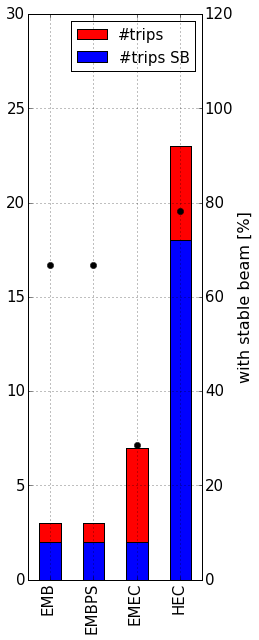

In [10]:
fig, ax = plt.subplots(figsize=(3.7, 9))
ax2 = ax.twinx()

trips_per_det = data.groupby("Det")["Det"].count()
print trips_per_det
trips_per_det_sb = data[data["Stable Beams"] == 'Y'].groupby("Det")['channel_id'].count()

j = pd.DataFrame(dict(trips_per_det = trips_per_det, trips_per_det_sb = trips_per_det_sb))
sb_fraction = j.trips_per_det_sb / j.trips_per_det * 100
sb_fraction.plot(marker = 'o', color='k', ls='', label='with stable beam [%]', ax=ax2)

j['trips_per_det'].plot(kind='bar', ax=ax, fc='r', label='#trips')
j['trips_per_det_sb'].plot(kind='bar', ax=ax, label='#trips SB')

ax2.grid(False)
ax2.set_ylim(0, 120)
ax2.set_ylabel('with stable beam [%]', fontsize=16)
ax.set_ylim(0, 30)

ax.set_xlabel('')
ax.legend()
plt.show()

fig.tight_layout()
fig.savefig('sb_2015.pdf')

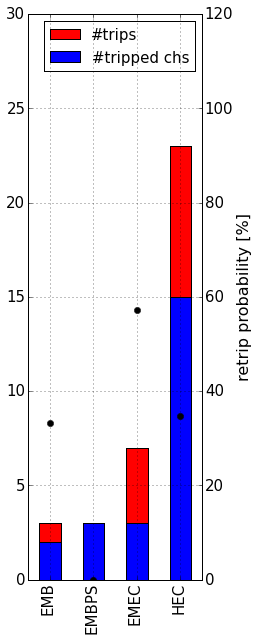

In [11]:
fig, ax = plt.subplots(figsize=(3.7, 9))
ax2 = ax.twinx()

trips_per_det = data.groupby("Det")["Det"].count()
tripped_per_det = data.groupby("Det")['channel_id'].unique().apply(len)

j = pd.DataFrame(dict(trips_per_det = trips_per_det, tripped_per_det = tripped_per_det))
retrip = (1. - j.tripped_per_det / j.trips_per_det) * 100

retrip.plot(marker = 'o', color='k', ls='', label='retrip [%]', ax=ax2, zorder=100)
j.trips_per_det.plot(kind='bar', ax=ax, fc='r', label='#trips')
j.tripped_per_det.plot(kind='bar', ax=ax, label='#tripped chs')
ax2.grid(False)
ax2.set_ylim(0, 120)
ax2.set_ylabel('retrip probability [%]', fontsize=16)
ax.set_ylim(0, 30)

ax.set_xlabel('')
ax.legend()
plt.show()

fig.tight_layout()
fig.savefig('summary_2015.pdf')

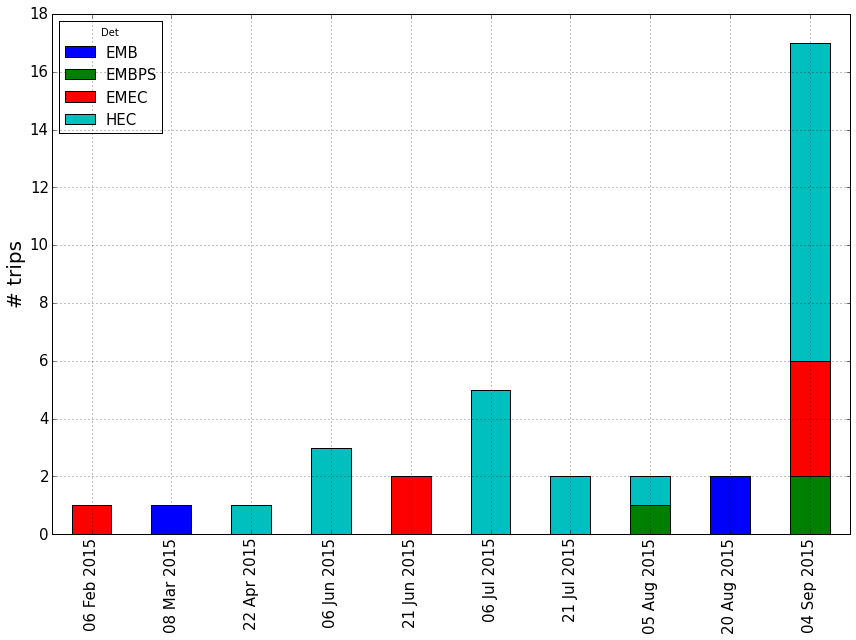

In [12]:
def plot_month(data):
    import matplotlib.dates as mdates

    import locale

    locale.setlocale(locale.LC_ALL, 'en_US')

    months = mdates.MonthLocator()  # every month
    monthsFmt = mdates.DateFormatter('%Y')

    fig, ax = plt.subplots(figsize=(12, 9))
    dg = data.groupby([pd.Grouper(freq='15D',key='Trip TimeStamp', closed='right'), "Det"])["Det"].count().unstack()
    dg.plot(kind='bar', ax=ax, stacked=True)
    ax.set_xticklabels([dt.strftime('%d %b %Y') for dt in dg.index])
    ax.set_ylabel("# trips")
    ax.set_xlabel("")
    fig.tight_layout()
    return fig

fig = plot_month(data)
plt.show()
fig.savefig('trips2015.pdf')

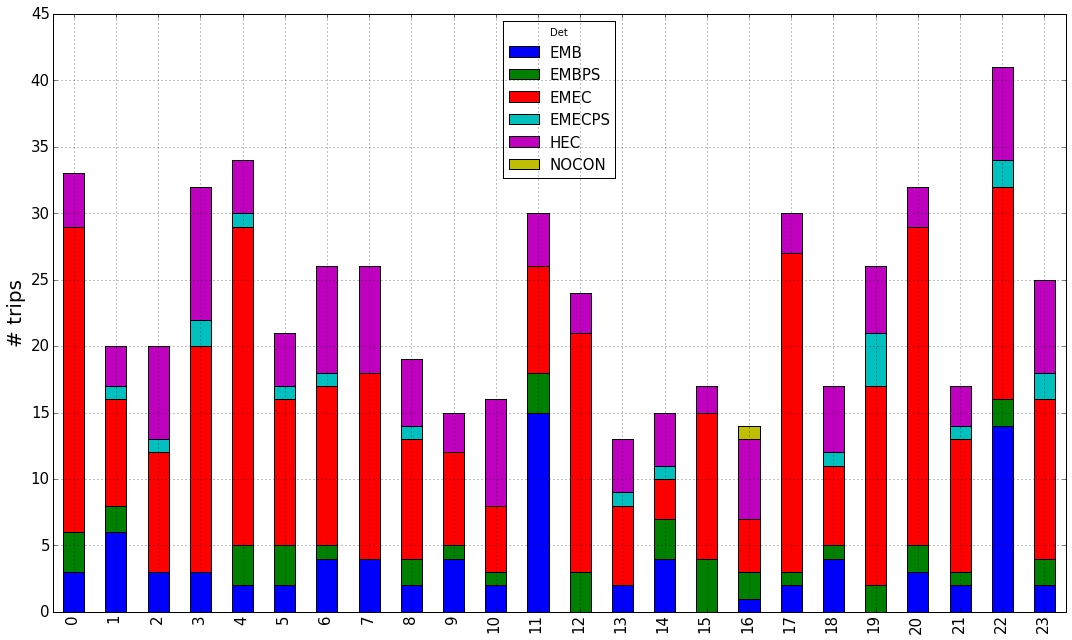

In [260]:
times = pd.DatetimeIndex(data["Trip TimeStamp"])
dg = data.groupby([times.hour, "Det"])["Det"].count().unstack()

import matplotlib.dates as mdates

import locale

locale.setlocale(locale.LC_ALL, 'en_US')

fig, ax = plt.subplots(figsize=(15, 9))
dg.plot(kind='bar', ax=ax, stacked=True)
#ax.set_xticklabels([dt.strftime('%d %b %Y') for dt in dg.index])
ax.set_ylabel("# trips")
ax.set_xlabel("")
fig.tight_layout()
plt.show()

In [5]:
import datetime
times = data["Trip TimeStamp"].astype(datetime.datetime)
days = (times.max() - times.min()).days
print "#trips = %d, trips / day = %.1f" % (len(data), len(data) / float(days))
trips_sb = (data['Stable Beams'] == 'Y').sum()
print "#trips with sb = %d (%.2f%%)" % (trips_sb, trips_sb / float(len(data)) * 100)

#trips = 36, trips / day = 0.2
#trips with sb = 24 (66.67%)
